Playlist names cluster
============
Work in progress notebook
__________

In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from tqdm import tqdm_notebook as tqdm

In [2]:
import os
import sys
sys.path.append('/Users/pasquale/git/recsys18_challenge')

In [3]:
from utils import dataset

In [4]:
_root = '../../'
_dataset_path = _root + 'dataset'
file = 'mpd'

emb_file = 'pl_embeddings.txt'
cluster_file = _root + 'models/clusters.txt'

Load data about playlists

In [5]:
df_playlist = pd.read_csv(_root + 'dataset/playlists_mpd.csv', index_col=0,
                          keep_default_na = False,
                          names=['title', 'collaborative','num_tracks','num_artists',
                                 'num_albums','num_followers','num_edits','modified_at','duration_ms']).sort_index()
df_playlist.head()

,title,collaborative,num_tracks,num_artists,num_albums,num_followers,num_edits,modified_at,duration_ms
0,Throwbacks,False,52,37,47,1,6,1493424000,11532414
1,Awesome Playlist,False,39,21,23,1,5,1506556800,11656470
2,korean,False,64,31,51,1,18,1505692800,14039958
3,mat,False,126,86,107,1,4,1501027200,28926058
4,90s,False,17,16,16,2,7,1401667200,4335282


## Generate playlist embeddings

In [99]:
df_tracks = pd.read_csv(_root + 'dataset/items_mpd.csv',
                        names=['pid','pos','track_uri'],
                        dtype={'pid': np.uint32, 'pos' : np.uint8, 'track_uri': 'category'})

df_tracks.head()

,pid,pos,track_uri
0,549000,0,spotify:track:6QHYEZlm9wyfXfEM1vSu1P
1,549000,1,spotify:track:3RkQ3UwOyPqpIiIvGVewuU
2,549000,2,spotify:track:0ju1jP0cSPJ8tmojYBEI89
3,549000,3,spotify:track:7ny2ATvjtKszCpLpfsGnVQ
4,549000,4,spotify:track:18GiV1BaXzPVYpp9rmOg0E


In [7]:
# dataset = dataset.Dataset(_dataset_path)
# dataset.reader('playlists_%s.csv' %file, 'items_%s.csv' %file)

In [8]:
# df_tracks['track_id'] = df_tracks['track_uri'].apply(lambda uri: dataset.tracks_uri2id[uri]).astype(np.uint32)

In [9]:
# df_tracks[df_tracks['pid']==549803].head() #disney

Playlist to vec

In [10]:
# model = Word2Vec.load(_root + 'models/training_validation.w2v')
# word_vectors = model.wv

In [11]:
# def get_vector(pid):
#     return df_tracks[df_tracks['pid']==pid]['track_id'].apply(lambda id: word_vectors[str(id)]).mean(axis=0)

# %time get_vector(549805)

In [12]:
# embeddings = [get_vector(pid) for pid in tqdm(df_playlist.index.values)]

In [14]:
# np.savetxt(emb_file, embeddings)

In [15]:
# load embeddings
embeddings = np.loadtxt(emb_file)

In [16]:
# a = embeddings[0][0]

## Clustering

In [ ]:
X = embeddings
Y = df_playlist['title'].values

In [10]:
num_clusters = 500

In [312]:
# from scipy.cluster.hierarchy import linkage, fcluster
# import matplotlib.pyplot as plt
# import sys
# sys.setrecursionlimit(10000)

# Z = linkage(X, 'ward')

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

In [19]:
# cluster = fcluster(Z, 40, criterion='maxclust')
# # cluster = fcluster(Z, 22, criterion='distance')
# print(len(np.unique(cluster)))

In [70]:
# clusters =  kmeans.predict(X)
# np.savetxt(cluster_file, clusters, fmt="%u")

clusters = np.loadtxt(cluster_file)
len(clusters)

1000000

In [71]:
df_playlist['cluster'] = clusters.astype(np.uint32)
clusterized = df_playlist[['title', 'cluster']].sort_values(['cluster'], ascending=False)

Printing some results

In [315]:
from IPython.core.display import Markdown, display

biggest_cluster = -1
biggest_cluster_dim = -1

for i in np.arange(num_clusters):
    _involved = clusterized.loc[clusterized['cluster']==i]
    
    popular_titles = _involved['title'].str.lower().str.strip().value_counts().sort_values(ascending=False)[0:5]
    
    _dim = _involved.shape[0]
    if _dim > biggest_cluster_dim:
        biggest_cluster_dim = _dim
        biggest_cluster = i
    
    display(Markdown('#### CLUSTER %d' % i))
    display(Markdown('%d playlists' % _dim))
    display(popular_titles)
    display(Markdown('`%s`' % '` `'.join(_involved['title'][0:30])))

#### CLUSTER 0

1529 playlists

bachata    71
rap        21
spanish    15
workout    14
dance      12
Name: title, dtype: int64

`Pump` `kim` `Warriors` `Finals Week ` `cd` `Teenage Angst` `Wings` `Spring 2016` `peru` `The Crew` `Hey girl` `bachata` `Bachata` `Georgia` `Power Up` `bachata` `Bachata` `Work out` `Emo` `Drive` `Run` `Shower Time` `tere` `Rap` `<3` `summer 2012` `Batchata` `hype` `Good Morning` `Bachata`

#### CLUSTER 1

3845 playlists

christmas    109
edm           66
worship       50
chill         37
rock          37
Name: title, dtype: int64

`22` `DECEMBER` `golf` `The Civil Wars ` `lol` `New Ish` `acoustic covers ` `Lent` `reggeaton` `country rap` `hunger games` `Hurt` `hi` `Rock` `Christmas` `December 2014` `Punk` `Ghetto` `Lauren's playlist` `Chill` `pumped` `Trap` `edm` `Worship` `2017` `12` `sing along songs` `22` `CHRISTMAS!!` `jackie`

#### CLUSTER 2

1858 playlists

country      59
throwback    44
oldies       26
wedding      22
disney       20
Name: title, dtype: int64

`all time favorites` `mom` `Sad.` `country music` `good` `Dance` `Y2K` `fav country` `Beachin` `disney jams` `Love Songs` `Acoustic` `calm!!` `sleepy` `be happy` `Jess` `dance songs` `rock` `us` `Feelin good` `UPBEAT` `TØP` `All Time Favorites` `island` `wavy` `Wanderlust` `Old school` `90s Dance` `tb` `THROWBACKS `

#### CLUSTER 3

996 playlists

party    16
2017     15
pop      15
rap      12
jams     11
Name: title, dtype: int64

`DECEMBER 2016` `kid cudi` `stuff` `better songs` `Drake` `Morning mix` `summer` `Get Pumped` `Run it` `running` `SUMMER FUN` `POP` `2016 summer` `Workout Mix` `top hits` `Sweet 16` `Another One` `Mix` `Summer '15` `Hypeee ` `New Songs` `Rock` `Rolex` `good time` `Jams` `that good good` `running` `alexis` `feel good` `bus`

#### CLUSTER 4

4202 playlists

chill          98
rock           89
alternative    68
feels          57
summer         43
Name: title, dtype: int64

`Sunday` `Indie` `lovely` `Summer Party` `Under The Bridge` `claire` `party` `90s` `Blaze` `Feel It` `SUMMER 16` `my tunes` `Random` `chill` `Songs I like` `I dont know` `Jams` `cool` `Jenny` `Party` `Songs for the soul` `phoebe` `Jams` `the feels` `Back in MY Day` `chill` `black widow` `shower` `dang` `music`

#### CLUSTER 5

4527 playlists

workout    61
rap        55
r&b        48
chill      45
edm        39
Name: title, dtype: int64

`Poker` `august` `June 2017` `Chil` `Baby Making Music` `October 2017` `Best of 2012` `old school rap` `ski` `fall 17 ` `Love Songs` `good` `staind` `Wedding Reception` `son` `Turn up` `V I B E S .` `Soundtracks` `August` `Americana` `R&B` `chill` `Indie Rock` `Work Playlist` `SETH!!` `British Invasion` `bangers` `FAMILY` `Musica ` `HUMBLE.`

#### CLUSTER 6

2900 playlists

wedding             94
party               44
wedding playlist    34
grad party          33
road trip           32
Name: title, dtype: int64

`Throwbacks` `getting ready ` `PARTYYYYYY` `summer drive` `poolside` `Driving` `Favorite Songs` `Just Dance` `Swing Dancing` `Bootylicious` `Exercise` `Cold Water` `Summer 2k17` `Dance Playlist` `Car Jams` `Summer 2016` `Happy songs` `Bbq` `Wedding Playlist` `beach` `happy:)` `Classic` `old school` `Rock` `NYE` `TRAINING` `Pool` `Old School` `Boat Jams` `throwback`

#### CLUSTER 7

914 playlists

dubstep     15
chill       10
new          9
workout      9
acoustic     8
Name: title, dtype: int64

`Chill` `chill vibes` `Laura` `Workout 3` `Melancholia` `Party` `I like it` `Car ride` `Soft rock` `Chill` `Dubstep` `Underground rap` `Teresa ` `Hip Hop 1` `Slow Jamz ` `work` `90's R&B` `new` `sauce ` `Merengue` `light ` `post-hardcore` `Summer '16` `reggae` `sad` `Kris` `Love` `Jams` `los favoritos ` `fall 2017`

#### CLUSTER 8

711 playlists

disney              466
disney songs         19
disney!              14
disney favorites     13
best of disney        9
Name: title, dtype: int64

`disneyland` `Disney` `disney` `DIsney throwbacks. ` `Disney` `DIsney :)` `Disney` `disney ` `DISNEY` `DISNEY` `Disney` `Disney ` `Disney ` `disney` `sleep` `Disney` `Disney :)` `disney ` `Disney ` `Disney Favs` `disney favs` `disney` `disney` `Disney` `Disney!!!` `Disney` `Disney` `Disney ` `throwback` `Disney✨`

#### CLUSTER 9

9877 playlists

classical       228
meditation       96
jazz             90
sleep            73
instrumental     67
Name: title, dtype: int64

`Mom's` `Hawaiian` `inspiration ` `Bean` `Dubstep` `Acustic` `tamil songs` `clean` `Learn` `Vietnamese` `Miscellaneous` `Ma` `MEDITATION` `Orchestra` `Slow burn` `hawaiian` `Vietnamese` `BAND` `running` `Tribal` `Underground ` `Work` `Meditate ` `Classical Favorites` `Zydeco` `Mellow Mood` `GUITARRAS` `january` `Dec 2016` `Bird`

#### CLUSTER 10

3247 playlists

chill      72
feels      34
sleep      32
country    30
relax      24
Name: title, dtype: int64

`sad feels` `good.` `Sad.` `Def` `slow it down` `Summer Vibes` `Relax` `calm down` `squad ` `indie` `sleep` `All the Feels` `all time favorites` `slow it down` `Wedding` `rainy day` `music` `quality ` `driving` `We Found Love` `Ballads` `Sleep` `Wanderlust` `Pump up` `Old School` `peace of mind` `Throwbacks` `1.5` `songs I love!` `Motivational `

#### CLUSTER 11

2778 playlists

rap        83
workout    63
chill      36
hip hop    26
party      26
Name: title, dtype: int64

`Coffee` `Baby making music` `bed` `sad songs` `Workout` `Chill rap` `Rock!` `Workout` `JM` `old hip hop` `houseparty` `playlist #2` `groove` `Party` `Summer` `roadtrip` `Rap Stuff` `November 2016` `jay z` `chillout` `JAMS` `party playlist` `raven` `Oldies` `April 2016` `Roots` `Mother's Day` `it's lit` `ratchet` `freshman year`

#### CLUSTER 12

5580 playlists

blues           85
classical       62
instrumental    42
corridos        39
bluegrass       36
Name: title, dtype: int64

`Jimi Hendrix` `Study Music` `Spotify.Me` `CHRISTMAS` `A Cappella` `musique française ` `TFIOS` `Jazz it Up` `Los cafres` `chill` `Classical` `secrets` `April 2015` `Feed Me` `Yoga` `high school` `Para bailar` `Summer Camp` `Cry Baby` `Good times` `Ska` `Dancehall` `lean` `Arabic songs ` `Boleros ` `random jams` `zzz` `Sweet Soul Music` `studying` `Papa`

#### CLUSTER 13

2563 playlists

throwback     50
party         40
throwbacks    39
jams          31
workout       30
Name: title, dtype: int64

`hello` `#lit` `pool` `Roadtrip` `lololol` `State` `Jazzy Jazz` `fuego` `Throwbacks ` `bangers only` `Oldies` `💙💙` `Before my time` `My Hits` `main` `Gh` `Alternative` `summer` `jams` `grad party` `SUMMER '17 ` `throwbacks` `CAR JAMS` `PARTY!!` `🤙🏼` `bbq` `Dope` `HYPE` `Wedding` `MY MUSIC`

#### CLUSTER 14

3642 playlists

classic rock    223
oldies          210
classics        137
rock             60
classic          56
Name: title, dtype: int64

`Southern Rock ` `Anything` `Graduation` `Us` `Upbeat ` `70s` `Chillin'` `IDK` `BBQ` `🙃🙃🙃` `60's` `roadtrippin` `Oldies` `20` `Classic Rock ` `Travel` `Oldies` `throw back` `Stones` `other` `Ale` `Sunshine` `Virginia` `songs from movies` `The List` `ac` `oldies` `rock & roll ` `Kelly` `17`

#### CLUSTER 15

2476 playlists

disney      83
musicals    21
workout     19
kids        18
chill       17
Name: title, dtype: int64

`End of summer` `DnD` `disney` `School ` `Disney Favorites` `New Songs` `Disney` `Slow` `SUMMER'16` `For rachel` `On The Go` `sex` `Grooves` `Nostalgic` `Shower` `musical` `Music.` `feeling it` `Work` `oldies` `Spanish Jams` `Disney` `Mellow Yellow` `Golden oldies` `Erykah Badu` `Alt Nation` `Feel Good Playlist` `My Rap` `work playlist` `Relax`

#### CLUSTER 16

876 playlists

worship            212
christian           53
jesus               28
jesus jams          21
christian music     17
Name: title, dtype: int64

`Worship` `unnamed` `Praise and Worship` `Worship` `church` `Club` `Rise and Shine` `Disco` `Gospel` `slow worship` `worship` `Jesus Jams` `chill out` `good ` `christian ` `mom` `luv` `Worship` `Worship` `Old School Hip Hop` `Red Bull Editions Bonnaroo Playlist` `amen. ` `Faith` `Worship` `calm` `P&W` `Hillsong` `Jesus Tunes` `Christian music` `worship`

#### CLUSTER 17

5082 playlists

country          229
chill             73
justin bieber     46
oldies            40
feels             35
Name: title, dtype: int64

`Singles` `Summer17` `My Love` `MoTown` `feb 2014` `work out` `Country` `August` `driving` `Poppy` `chill af` `John Mayer` `Christian` `Summer Vibes` `Music` `Love Songs` `My favourites` `Work` `Margaritaville` `Cruise` `hangout` `Dinner Party` `My favorite songs` `FALL` `Roadtrippin'` `wowza !!` `vibin` `july 2017` `slow chill` `chill`

#### CLUSTER 18

409 playlists

rock        16
workout     11
new          8
work out     6
pop          5
Name: title, dtype: int64

`Oldies` `Rock N Roll` `New` `Hipster ` `Numb` `practice` `pop music ` `Letting Go ` `summer` `BB` `Throwback music` `😛😛😛` `Todays hits` `Going Out!` `Run` `Rock` `Go hard ` `pump up` `Music` `Fancy` `August 2015` `pumped` `good vibes` `90s R&B` `may17` `wakeup` `Wedding songs` `hype it up` `gimnasio` `Alternative`

#### CLUSTER 19

1157 playlists

lit        31
rap        27
party      19
workout    15
music      13
Name: title, dtype: int64

`Drake` `Red Dirt` `Bump` `mhm` `Lit` `Rap` `party` `old` `Me, Myself & I` `Hustle` `pregame` `lake ` `Car Jams` `I'm the One` `mood` `clean` `gym💪🏼` `Music` `summer :)` `summertime` `drop it` `adrian ` `Lift` `☀️` `stp` `party` `lit` `Passionfruit` `Bruno mars` `🔥🔥🔥`

#### CLUSTER 20

1068 playlists

chill        16
worship      11
sleep         8
spongebob     6
rock          6
Name: title, dtype: int64

`sexytime ` `oldies but goodies` `beat` `running` `NO` `spanish` `Wake up!` `Close Your Eyes` `all the feels` `best` `Running` `💖💖` `Destiny` `Acoustic` `Eighties` `crush` `Spotify.Me` `Piano` `TORI` `March 17` `Thank You.` `April 2017` `Everything` `Travelling` `Slow Country` `Lovely` `rip` `Chill` `March 2014` `Strong `

#### CLUSTER 21

2116 playlists

rock       43
workout    33
pop        27
running    23
summer     22
Name: title, dtype: int64

`Feels ` `chill` `Happy` `Rock` `Let's Dance` `August 2017` `workout ` `hell yeah` `long distance` `Work out` `MOM SONGS` `Random` `CAR` `on fleek` `hike` `alt. rock` `BFF ` `party` `fresh` `moana` `Pow Pow` `Cardio` `Twenty One Pilots — Stressed Out` `chillin ` `Halloweenie` `Summer 2017` `Inside Out: So Emotional` `PreGame` `Throwback` `rock`

#### CLUSTER 22

529 playlists

rap         23
new         16
lit         13
hype        11
playlist     8
Name: title, dtype: int64

`new` `2K17 ` `yuh` `Lit` `School` `Baladas ingles` `basketball` `music <3` `Hot Tracks` `new` `slow jams ` `Smoke` `Life` `Aidan` `BaNGERz` `fire` `rowdy` `Car` `rap` `AH` `hype` `YEET` `420` `Fall 17` `New` `Storm` `rockstar` `Hype` `Jackson` `jams`

#### CLUSTER 23

1427 playlists

rap        76
lit        53
hype       33
litty      29
workout    24
Name: title, dtype: int64

`bangerz` `RJ` `litty titty` `Jon` `jackson` `LIT LIT LIT` `new` `Clean playlist` `p1` `2017` `head bangers` `litttt` `bangers` `Yup` `Litty` `loud` `Pride` `trap` `fire` `Lit🔥` `Dumb lit` `Cool` `jams` `Rap` `Latino ` `Get Ready` `awesome` `⭐️` `pre game ` `MY MIX`

#### CLUSTER 24

940 playlists

rock       24
workout    13
rap        13
chill      13
sleep       9
Name: title, dtype: int64

`New songs` `Workin` `Punk goes PoP` `YASSS` `FOR ` `pop` `Love songs ` `Undead` `Music` `Rock` `Oct_2016` `Feeling Good` `Spring 14` `Set List` `office music` `Maggie` `Amnesia` `IDEK` `Running` `hype` `oh` `litty ` `MER` `emmas playlist` `run` `april` `top ten` `HipHop` `goosebumps` `ROCK!!!`

#### CLUSTER 25

6725 playlists

chill        103
oldies        69
christmas     59
edm           50
worship       49
Name: title, dtype: int64

`Summertime` `Aftermath` ` Calm` `classics` `bree` `Depressing ;_;` `andy` `Winter` `chill vibes` `Majestic Casual` `Worship` `RaVe` `2016` `Work It out` `Vibes` `Schoolboy Q ` `Chill Study` `JULY 2013` `boi` `Kelsey` `my country` `Slow Songs` `winter break` `Neo Soul` `tripping` `sunset` `Main playlist` `pool` `Praise` `Longboarding`

#### CLUSTER 26

3703 playlists

rap        46
spanish    32
workout    30
edm        28
chill      28
Name: title, dtype: int64

`this one` `Day Dreaming ` `My Mix` `Sprint` `26` `mellow` `Work` `workout` `Music` `old stuff` `Straight Fire` `high` `Rap` `#15` `Ice Cream` `dance 2015` `Spring 2016` `feelings` `Good Stuff` `Cole World` `Vibe` `latin mix` `Just good` `new` `Positive ` `2015` `Bumpin'` `july` `las mias` `Rap`

#### CLUSTER 27

2310 playlists

rap      134
lit       98
party     68
hype      45
litty     35
Name: title, dtype: int64

`🔥fire🔥` `Music` `Loop` `Turnt` `liz ` `Rap` `Best` `lit` `prep` `lit songs` `Freshman Year` `bars` `bump` `boat party` `littt` `2.0` `christian` `Mix` `Rap` `trap` `Music` `DAnK` `JaMz` `❤️❤️❤️❤️` `turn it up` `DOWN ` `rap` `download` `Party` `moody`

#### CLUSTER 28

1596 playlists

workout      30
pop          28
2015         26
fall 2015    22
new          18
Name: title, dtype: int64

`beach 2016` `Workout` `quality` `shower` `ok` `Happy` `2015` `2015` `My Songs` `Party` `NO` `pop` `Tropical` `popular` `*~party~*` `Blank` `Crazy` `Dance Songs` `party` `Workout` `NYE` `Work` `My LIFE` `January 2016` `ER` `Around the World ` `playlist` `Laura` `2015` `Newbie`

#### CLUSTER 29

3367 playlists

rap        113
lit         95
party       92
pregame     54
workout     49
Name: title, dtype: int64

`Listen ` `🤘🏼` `english` `Jams` `lit` `Jamz` `bangers ` `2017` `Hippidy Hop` `Weekend` `jams` `💦💦` `bruh` `Party` `Stoner` `Car Jams` `boo` `car` `ya` `car` `Miami ` `main songs` `Workout` `car jams` `2017` `Turn TF Up` `lit` `Life ` `Halloween Party Playlist` `sigh`

#### CLUSTER 30

1668 playlists

workout    36
running    30
party      19
chill      18
dance      18
Name: title, dtype: int64

`beach vibes` `Summer 16` `SoundHound` `play` `DANCE` `music` `~good vibrations~` `No Scrubs` `first` `JESS` `Funky Funk.` `Road Trip` `Good Vibez` `Winter 2016:)))` `music` `Coachella 2016` `Run` `Tailgating` `Drive` `Tb` `Cruisin'` `Best of the Best` `Thursday ` `💪🏼` `Good` `ahhhhh` `Roses` `All time Faves` `f u` `summer2k15`

#### CLUSTER 31

2335 playlists

country    40
chill      36
running    18
workout    16
feels      16
Name: title, dtype: int64

`Wedding cocktail hour` `Me` `Performance` `Country` `Slow Dancing` `Dance` `Workout` `Dance Dance Dance` `Leah` `😁😁` `Dig it.` `aa` `Throwbacks` `Good country` `Anniversary Party` `Chill` `Fun Music` `kylie ` `a day to remember` `15` `Upbeat` `Dance` `NEW MUSIC` `Meh` `july 2016` `us` `feel good` `Classics` `music` `BRIDAL SHOWER`

#### CLUSTER 32

1221 playlists

old school    28
throwback     27
rap           23
party         20
feels         15
Name: title, dtype: int64

`better songs` `childhood` `Shower playlist ` `Good Songs` `old school` `Happy Birthday` `#TBT` `Dope Playlist` `car` `Old` `Pregame` `Rapper's Delight` `Viral` `Throwbacks` `Morning` `woot` `fire` `Winter 2014` `throwback` `Dope ` `yo` `GRAD PARTY` `Old Rap` `pump it up` `mix` `throwback` `Jam` `----` `nice songs` `Chill`

#### CLUSTER 33

1630 playlists

rap      63
lit      52
litty    30
rock     30
hype     25
Name: title, dtype: int64

`hippity hop` `Rap` `Bruh...` `Savage Mode` `Playlist` `47` `Playlist ` `rock ` `obsessed` `Deja Vu` `Stay Woke` `4.20` `LIT` `Vibes` `Dope` `phone` `ayeeee` `Clouds` `Merengue` `get lit` `2016` `Rap Playlist` `Another Playlist` `Jam` `turn up!!!!!!!!` `be` `get lit` `trapp` `dylan` `Beautiful`

#### CLUSTER 34

3559 playlists

edm        59
workout    47
chill      44
rap        29
vibes      27
Name: title, dtype: int64

`Chill Vibes` `Trappin'` `EDM` `WHAT A TIME TO BE ALIVE` `Punk` `Reggaeton` `Spring/Summer 2017` `WORKOUT PLAYLIST` `Girl Power` `My song` `playlist` `lit` `my songs` `Fun` `Project` `grunge` `Lauren` `casual ` `Country Feels` `Bae` `Wedding Dancing` `France` `yass` `workouts` `driving` `Too Much` `This` `Classic Rock` `Throwback` `Lovey`

#### CLUSTER 35

1899 playlists

chill      26
workout    20
new        18
feels      17
rap        15
Name: title, dtype: int64

`Sleeeep` `party` `joe ` `Top` `Nice` `New R&B` `alternative` `equilibrium` `gym` `Me` `Surprise` `Rise` `Well` `hip hop` `Alessia Cara ` `BK` `Yeah yeah` `Mix 2` `Car Rides` `redNeck` `Sleepy Time` `summer sixteen` `saturdays` `Twerkout` `megan` `Work B**ch` `lets get it!!! ` `Relax~` `Vibes` `Zumba!`

#### CLUSTER 36

5657 playlists

rap        255
workout    112
hip hop     67
gym         65
chill       64
Name: title, dtype: int64

`Trill!` `Chillin` `hood` `**Rap` `Turn up` `my mix` `Saturdays` `💤💤💤` `Summer 2016` `spring` `lit` `fall17` `Renee` `Newnew` `KYS` `shower` `Hippity Hoppity` `cloud 9` `beats` `April showers` `bass` `Playlist` `yuh` `Colors` `2016` `🅱️` `Slow Mix` `Feelin Myself` `Slaps` `Slow Vibes`

#### CLUSTER 37

469 playlists

spongebob       10
travis scott     9
feels            6
shower           5
chill            5
Name: title, dtype: int64

`slapz` `Electronic ` `The Way` `Pump Up` `memories` `Freshman Year` `throwback ` `future` `Feels` `december` `pop punk ` `Its A Trap` `chill` `Love` `sunny` `🤷🏼‍♀️` `loving you` `🤷🏽‍♀️` `Mario` `Poop` `Love` `BUMPIN` `bump` `wedding songs` `temp.` `Jamz` `cleaning` `Sad songs` `idek` `Lounge`

#### CLUSTER 38

1827 playlists

rap        60
lit        36
party      31
workout    20
pregame    19
Name: title, dtype: int64

`Party` `❤️💛💚` `summer 2k16` `Roadtrip` `morning` `🖤🖤` `Lip Sync` `I Feel It Coming` `July 4th` `Workout ` `💯💯` `Muzik` `Fuk` `Bangerz Only ` `THROWBACK` `Cleaning ` `lit` `Work` `my best songs` `runnnn ` `car rides` `2016-2017` `groovy` `rap` `summer 2017` `💯💯💯` `dance dance dance` `❤️` `Angel` `Summer`

#### CLUSTER 39

1115 playlists

oldies     17
sleep      13
banda      13
chill      11
worship    11
Name: title, dtype: int64

`songs that make me happy` `Replay` `CC` `Harmony` `Without Words` `Rain` `rides` `november 17` `Espanish` `Bob Marley` `cruising` `Folk` `it's lit` `SPIN ` `humble` `Stretching` `New Vibes` `rock out` `yoga2` `Reggeton` `UPBEAT` `Pop` `fun songs` `Just Chilling` `Work Flow` `OCTOBER` `sleepy time` `christian music` `drives` `July 2016`

#### CLUSTER 40

1165 playlists

spanish          129
español           71
latino            32
latin             27
spanish music     23
Name: title, dtype: int64

`jelly` `Español` `Spanish` `primavera 2015` `Suicide Squad` `spanish` `mix` `esp` `Relax` `<3` `LATINO` `contemp` `Pop` `Dance` `Latin` `vamos a la playa` `runnin` `Hasta el Amanecer` `Lindsey Stirling` `Baila` `Play 1` `Chill` `Spanish songs` `Canciones Españolas` `Gym` `Spanish songs` `Strawberry` `OneRepublic` `spanish` `Reggaeton`

#### CLUSTER 41

4956 playlists

chill      82
rock       53
workout    36
edm        34
country    32
Name: title, dtype: int64

`<3` `Random` `RAGE` `EDM` `Workout` `april` `dreamy ` `Relax` `Pre-Service` `Slap` `Mellow` `tRiPpY` `life ` `33` `2012` `Calm` `Hip hop` `Vibes` `My music ` `popish` `verano` `Bike ride` `current` `2015 Top Tracks` `Spring Forward` `Dub` `My Songs` `Car Ride` `Frenchie` `Roadtrip`

#### CLUSTER 42

818 playlists

90s                 171
90's                121
throwback            21
90's alternative     18
90's rock            15
Name: title, dtype: int64

`Old Jams ` `90s` `90's` `90s` `90s` `90s Rock` `90s` `Chill` `90s` `1990` `Alternative Rock` `Throwback Jams` `nostalgia` `90s` `90's` `90s` `Rewind` `Good Vibes` `MOVING!` `1997` `90s` `Rock Out` `90s` `90's` `Going To California ` `Rock` `Old School` `My 90s` `90s/2000s` `Kiss Me`

#### CLUSTER 43

447 playlists

throwback     50
throwbacks    37
oldies        12
tb             9
old school     9
Name: title, dtype: int64

`cd` `throwback` `all time favorites` `Windows Down` `latina` `Oldies` `THROWBACK` `Wedding` `2000's Hits` `throwback` `Chill` `2000's` `throwbacks` `Throwback` `Awesomeness` `driving jams` `throwback bangers` `2017` `Wedding Dance Playlist` `Old Party` `positive vibes ` `throwback` `Chill` `CLASSIC` `Dance ` `tb` `new` `Throwbacks` `tb` `throwback bangers`

#### CLUSTER 44

877 playlists

worship           14
jazz              12
chill             12
christian         11
mumford & sons     8
Name: title, dtype: int64

`Memories ` `Christian` `Epic` `99` `Gospel` `last.` `Oldies` `april 2013` `Sunday` `Okay` `salsa` `Alternative R&B` `corridos` `hard rock` `Going out!` `vilde` `Rock alternativo` `Faith` `Turn Up` `Crown the Empire` `Summer love` `latin jazz` `Help!` `Skin` `Mumford and Sons` `Christian` `Bus` `Stillness` `☁️` `Ladies`

#### CLUSTER 45

1898 playlists

rap        44
workout    29
rock       26
lit        14
chill      14
Name: title, dtype: int64

`R&B` `Good Times` `Bells` `music` `workout` `BEST` `80s Dance` `Rock en Espanol ` `shiz` `WU` `water` `WORKOUT` `shred` `🤘🏼` `Salsa ` `its lit` `Turnt` `Welcome to the jungle` `Turn up` `july` `CoCo` `hip hop` `2017` `discovered` `ps4` `Tori Kelly` `Worship` `lit` `Girls` `Background`

#### CLUSTER 46

1187 playlists

christian    13
banda        13
worship      10
edm           9
workout       9
Name: title, dtype: int64

`rasta` `Les Mis` `Rainy Days` `get ready` `2014` `Singles` `sunshine` `35` `Rock` `bree` `Sorrow` `psychedelic` `Beach` `Bangerz` `LIFE` `bruh` `gray` `for sara` `🇲🇽` `Possibilities` `Red Bull Editions EDM Vegas Playlist` `Summer '16` `forever` `Rainy Days` `praise` `F2` `Soothing` `Worship Music` `sigh.` `banda`

#### CLUSTER 47

2838 playlists

chill      41
oldies     30
country    20
new        18
sleep      16
Name: title, dtype: int64

`Sleepy` `60's` `chill vibes` `Mellow` `2017` `ceremony` `chill` `Colombia` `demo` `mellow` `Mellow music` `life` `Lucky` `mellow` `oldies but goldies` `Fall 2017` `JULY 17` `Bubblegum` `June 2016` `New Favorites` `Sleep💤` `random faves` `rainy dayz` `Mellow Out` `Pool Party` `favs 2` `Work out` `ash` `Oldies :)` `Crazy`

#### CLUSTER 48

2133 playlists

oldies     27
country    25
chill      24
spanish    22
workout    18
Name: title, dtype: int64

`YUH` `Good vibes` `Chillin` `umm` `happy` `edm...` `vroom` `OLD SCHOOL FUNK` `focus` `reggaeton` `calm down` `mellow` `fave` `Party1` `Workout Rock` `:( country` `Disneyland` `80s jams` `lit` `white` `RWBY` `falling in love` `Running` `Noosa Tastiest Playlist` `Good stuff` `Campfire` `Ne-Yo` `party ` `may 2017` `crossroads`

#### CLUSTER 49

3261 playlists

r&b           82
throwbacks    75
throwback     60
workout       50
old school    40
Name: title, dtype: int64

`#Throwbacks` `Folk Rock` `tbt` `rNb` `Classics` `HEAVY LIFTING` `ayyy` `old school ` `hang` `Jamz` `Bloop` `Ya Know` `Favorite Songs` `pre-game` `prom` `GB` `random` `Daniel` `old hip hop` `mom` `alt` `Madison` `smooth ` `R&B` `Throwbacks` `My songs` `feelin it ` `football` `Lauren's playlist` `Old School`

#### CLUSTER 50

1083 playlists

throwback     37
throwbacks    29
workout       19
party         18
oldies        16
Name: title, dtype: int64

`Party` `Homecoming` `oldies` `Bedtime` `tbt` `throwback` `pregame` `Dirty ` `edits` `plane` `NIce` `2AM` `no diggity` `House` `party bus` `CALI ` `jams` `music 2` `prelude` `turn up` `Songs I Love` `wedding` `workout` `throwback` `Smile!` `anthem` `Mix` `THROWBACK` `oldies` `Party Playlist`

#### CLUSTER 51

360 playlists

oldies          33
80s             24
80's            10
classic rock     6
60s              6
Name: title, dtype: int64

`80s` `car party` `#Throwback Thursday` `GOTG` `80s` `80s` `wow` `Bryan Adams` `You Don't Own Me` `oldies` `YOLO` `summer` `Starboy` `Funky` `Slow Motion` `Lets Dance` `soft music ` `Oldies` `Soundtracks` `Running` `80's` `dad` `pop` `oldies` `Party Time` `classics!!` `HOLLYWOOD` `Mine` `oldie goldie` `1960s`

#### CLUSTER 52

2059 playlists

jazz       44
grease     34
worship    25
study      22
bachata    19
Name: title, dtype: int64

`Lucas` `July ` `zzzz` `Race` `Us` `list` `summer bummer` `Gospel` `Piano.` `Slow` `Relaxing` `Limbo` `Spring 2013` `Chill Out` `2013` `Christmas` `Musical` `HSM` `metal` `Grease` `grease` `musica latina ;)` `Studying music` `Studying` `avett brothers` `Jazz` `Rock` `ATL` `Bangers and Mash` `Dubstep`

#### CLUSTER 53

1599 playlists

workout                  37
chill                    20
your workout playlist    14
calm                     13
rap                      12
Name: title, dtype: int64

`Random songs` `chill` `calm` `nov.` `Mine` `Female ` `May Playlist` `medley` `Jordan` `sleep` `Dance` `what i like` `Feelin' Good` `Inside Out: So Emotional` `Adele` `car` `random jams` `Beast` `Rain` `R&B` `Slow Songs` `Dance` `New Music ` `cd` `DRIVE` `moody` `❤️` `The Zone` `favorite` `Reception`

#### CLUSTER 54

4998 playlists

rap        233
party      127
workout    111
hip hop     58
jams        45
Name: title, dtype: int64

`Hip Hop` `2001` `Caviar` `R&B` `Plane` `Mad Ting` `chillllllll` `NYE Party` `Chill Rap` `Lit playlist` `workout` `music` `Catchy` `Lake ` `vibin` `sUmmer` `PROM PLAYLIST` `summer ` `My Jam` `pump up` `LUSH` `Rap` `Slow` `Hiphop` `¯\_(ツ)_/¯` `❤️😍` `Other` `Pregame ` `Isaiah` `negro`

#### CLUSTER 55

3558 playlists

rap        136
lit         71
workout     47
jams        44
hype        42
Name: title, dtype: int64

`beach jams` `rachet` `new music` `turn up` `pump up` `🤘🏼` `Work` `Gym time` `current faves` `Trap Music` `Bangers` `Lit` `work out` `SUMMA` `Hip Hop Hooray` `relaxing` `chill music` `spring2017` `Poetic Justice` `CESAR` ` october 2016` `parental advisory` `ig` `currents!` `clean` `2016` `Fetty wap` `Feelings` `beach` `Best`

#### CLUSTER 56

3265 playlists

throwback     76
workout       42
throwbacks    36
80's          32
party         29
Name: title, dtype: int64

`DAD` `throwback` `February` `Favvv:)` `childhood` `When I Was Your Man` `hip hop` `edm music` `awesome` `Cathy` `90s throwback` `skiing` `Rock` `relax` `throwback` `Throwbacks` `summer.` `80s` `Random` `❤️` `Cool MUSIC!` `Good vibes` `when we were young` `Disco` `90's` `RnR` `favorite` `My Time ` `Mom` `2000s`

#### CLUSTER 57

1931 playlists

rap        99
lit        39
workout    28
chill      27
rock       26
Name: title, dtype: int64

`RAP` `Vibin'` `Idk` `WERK` `creep` `lmao` `Running` `Fluorescent Adolescent` `my music` `mw` `Hello` `lol` `Ben` `feels` `Pop Punk` `work out` `Let Go` `poetic justice` `Rap` `turn up` `lean` `music ` `BEAST` `paige` `🤑🤑` `Jams` `Eargasms` `Lightskin` `🔥🔥🔥` `Pregame `

#### CLUSTER 58

14556 playlists

classical       362
jazz            224
comedy          133
instrumental    124
sleep            94
Name: title, dtype: int64

`~ Ska~` `Max Richter` `Scores` `Worship` `Chief Keef` `Music` `Homework` `viking` `yoga2` `nature sounds` `brain` `Strings` `Comedy` `Sabbath` `Focus` `latin` `Ross Lynch ` `Funny songs` `Nortenas ` `Chillin` `chill af` `la Vie en Rose` `klasik` `Classical` `Thanksgiving` `Piano Songs` `study` `perronas` `Frida` `Jan 15`

#### CLUSTER 59

2961 playlists

rock                        57
summer festival playlist    52
edm                         49
workout                     46
chill                       29
Name: title, dtype: int64

`march '17` `Rock` `Indie AF` `throwback` `car jams` `mix 6` `✨✨✨` `daily` `Flow` `The 1975` `Mr. Brightside` `work` `Dubstep/Trap` `SAFTB` `Punk rock` `BPM` `bruh ` `workout ` `May 2017` `Vibe` `Summer 2015` `ALASKA` `Everything` `WORKOUT JAMS` `Can` `New Music` `math` `Wedding Playlist` `Kickass` `Laura`

#### CLUSTER 60

3833 playlists

chill     75
feels     32
summer    31
indie     29
jams      27
Name: title, dtype: int64

`Power Ballads` `ed` `Summer 2015` `90s jamz` `Mood` `Good Vibes` `Good Vibes` `summer jams` `Last Day` `💋💋💋` `Car Rides` `Road Trip` `HeLlO` `Alternative` `Workout 1` `70s` `heartbroken` `Fireworks` `Jams` `indie chill` `EC` `Pop mix` `XC` `Chill` `Autumn 2017` `george` `chill list` `Chill 😌` `Love` `I WORKOUT`

#### CLUSTER 61

1173 playlists

christmas      116
worship         81
christian       34
jon bellion     16
praise          10
Name: title, dtype: int64

`CHRISTMAS AF` `Christmas music` `indie pop` `Christmas` `Awesome Music` `Jesus` `Spanish rock` ` Almost Famous` `Dad's playlist` `Christmas` `Live ` `Study` `Black hippy` `Church` `Christian ` `new` `Spanish Trap` `offline` `Work out mix` `Christmas` `If I Stay` `Perreo` `faith` `Morning Mix` `christian playlist` `CHRISTMAS!!` `CHRISTMAS` `Reflections` `CHILL` `Holiday`

#### CLUSTER 62

2273 playlists

throwback     128
throwbacks     78
tbt            33
oldies         33
party          29
Name: title, dtype: int64

`Poetic Justice` `birthday` `Fiesta` `Pop` `Workout` `2000's` `beatz` `drives` `2000s Hits` `Bachelorette Party` `Sexy` `workout` `Wedding` `throwback pop ` `Golden Oldies ` `oldies ` `Old School` `History of Rap` `Old school rap` `❤❤❤` `Modern ` `bday party` `gurl` `#TBT` `Hip Hop/Rap` `gold` `Running` `Driving` `LIT` `real rap`

#### CLUSTER 63

7626 playlists

jazz            138
classical       137
gospel           75
reggae           65
instrumental     65
Name: title, dtype: int64

`love ` `New music` `Steven universe ` `trance` `comedy` `Praise & Worship` `NCT` `unknown` `Mindless` `Movie Soundtracks` `German Rap` `Forever` `Música en español` `chill` `Mashups` `Ice` `dope` `Nature Sounds` `sunday worship` `March 2017` `chillin'` `JF` `Instrumental` `xx` `REM` `October 2017` `Grace` `writing` `Relaxation ` `MARCH 2017`

#### CLUSTER 64

1592 playlists

one direction    70
chill            29
1d               28
feels            27
ariana grande    20
Name: title, dtype: int64

`made in the a.m.` `My Worship ` `Rock` `Turn Down` `RECKLESS` `Cold War Kids` `One Direction` `Easy Rider` `Sleepy Time` `One Direction ` `Rawk` `sad ` `👅💦` `music` `GIRLS` `Cocktail` `WorkOut` `1D` `Hip` `Happy ` `Lolla 2016` `Old music` `new country` `Feelings` `Chilling ` `AVA` `My music` `study vibes` `💚💚💚` `meh. `

#### CLUSTER 65

1798 playlists

party        44
workout      39
dance        36
throwback    36
wedding      32
Name: title, dtype: int64

`Workout` `Wedding party` `game day` `My Music` `partyyyyy` `2017` `Wedding Party` `hits ` `oldies but goodies` `Wedding Playlist` `TGIF ` `Wedding` `Wedding Playlist` `Wedding 2017` `Boats and Hoes` `Dance party` `Road trip` `Old` `fun` `Love songs` `hoodrat` `ayyy` `lift` `Growing up` `Throwback ` `DANCE` `Feel good` `pump up` `throwbacks` ` Shake It Off`

#### CLUSTER 66

4765 playlists

country         85
chill           60
rock            41
90's country    40
old country     40
Name: title, dtype: int64

`Country Love ` `Relax` `yoga` `SUMMER` `Mood` `HighSchool` `the jams` `EDM` `Carson` `WEDDING PLAYLIST` `2016 Favorites` `Country` `2015 Top Tracks` `dance` `FIRE` `2015 Top Tracks` `Bluegrass` `Girls` `Chill` `Rock` `running mix` `Electric` `Party 2` `East Coast ` `Solid Gold` `bass` `Island Time` `Meow` `Yacht Rock` `Spring 2015`

#### CLUSTER 67

575 playlists

country           153
country music      11
summer country      8
luke bryan          8
new country         7
Name: title, dtype: int64

`April 2014` `☀️` `Body Like A Back Road` `2007` `country😍` `country` `country music` `Country` `my jams` `DIVAS` `Country Roots` `country jams ` `yee yee` `Country Workout` `country songs` `Lil Pump` `Country Music` `Luke Bryan` `Good Vibes` `Country` `Day Drinking` `Upbeat Country` `throwbacks` `michael!!` `oldies` `luke` `For my love` `Spanish` `southern ` `heck yeah`

#### CLUSTER 68

2153 playlists

workout    47
party      29
rap        29
feels      20
pregame    20
Name: title, dtype: int64

`big mood ` `Snooze` `car jams` `crying` `SHOWER` `Somewhere Only We Know` `Buzzin` `Rap 2` `10/10` `DOPAMINE` `Rap` `Current Faves` `2000s ` `Chill` `Cool for the Summer` `GOOD MOOD` `Lean On (feat. MØ & DJ Snake)` `new songs` `Enjoy!!! ^_^` `2k` `WORKOUT` `LMFAO` `✌️` `Pregame` `rock` `THROWBACKS` `Down` `2015 Playlist` `Lacrosse` `Summer 2k15 `

#### CLUSTER 69

1212 playlists

khalid         34
feels          19
summer 2017    18
chill          15
summer 17      14
Name: title, dtype: int64

`pool` `bball` `road trip` `speed` `Country` `Wild Thoughts` `Playlist` `workout` `Summa` `classics` `Happiness` `pleasure` `savage` `R&B` `70's` `Old School` `drive` `random` `sunday morning` `sleepy` `stephanie` `Smile` `Church Music` `Yeah` `new songs ` `90's` `Chill` `TTT` `Wedding Dinner Music` `rock`

#### CLUSTER 70

1183 playlists

rock en español    17
chill              15
rap                15
workout            14
rock               10
Name: title, dtype: int64

`Neo-Soul` `summer chill!` `Jazzy` `🤘🏼🤘🏼` `xxx` `Old rock` `Wedding Dinner` `Party Vibes` `Pop 1` `Sad love songs` `Stuff` `Random` `ayo` `november '15` `TURN` `Pre Party` `freaky` `sunday` `Thesis` `bored` `Rap` `Rainy Days` `13 Reasons why` `Friday` `rainy days` `warm ups` `New York, New York.` `Albums` `Rachet` `CUBA`

#### CLUSTER 71

2169 playlists

christmas    36
chill        24
rihanna      15
oldies       13
drive        13
Name: title, dtype: int64

`Shh.` `Party` `coffee` `Green` `Christmas party` `Rihanna` `🔫🔫` `millie` `Bethel` `groove` `#THINK. ` `Sundays` `Justin Bieber ` `single` `Travel` `sexy time` `Stuff` `random stuff` `You & I` `sisters` `Sway` `Country Girls` `✖️` `jazz` `old` `dusk` `calm` `Dubstep` `AAAA` `Spring 2017`

#### CLUSTER 72

191 playlists

country        14
new country     9
shower          5
jams            4
drive           2
Name: title, dtype: int64

`Country` `Focus` `november` `Pop` `YEAHHHH` `jams` `2017` `new music` `country vibes` `Havana – Camila Cabello` `goodies` `The songs` `Bob Dylan` `country` `Disney :)` `Love <3` `cocktail hour` `idk man` `jams` `guardians` `Boots` `Why Not` `country` `maya` `jams` `Sad songs` `Country` `WEEKENDS` `her` `clean`

#### CLUSTER 73

2250 playlists

christmas       75
worship         60
oldies          22
christian       22
jack johnson    19
Name: title, dtype: int64

`Alt Country` `Groove` `Wedding` `christian ` `van halen` `nfs` `Electronic` `Phil Collins` `DubStep` `Classic Country` `Juicy` `Funky fresh` `Best of 2016` `It's The Most Wonderful Time Of The Year` `Christmas` `July` `Worship` `Lit` `Camp songs` `Dopeness` `Right now` `FRANCAIS` `Worship Jams` `sleepy` `Best of 2012` `bump` `Rock en Español` `Primera` `sure` `中文`

#### CLUSTER 74

2388 playlists

country           472
new country        53
country jams       31
summer country     30
summer             23
Name: title, dtype: int64

`Breakup Songs` `Feels Like Home` `country` `Pre Race` `Girl Power` `southern rock ` `best country ` `Throwbacks` `Feel Good Vibes` `Work Jamz` `chill` `January 2016` `Country` `chill country` `summer 2k16` `New Country` `headspace` `Current faves` `Springsteen` `chill` `Country` `country` `Mustang` `Country` `Fall 2015` `Country` `Running` `Jackie` `chill vibes` `country`

#### CLUSTER 75

1691 playlists

oldies                205
classics               93
oldies but goodies     53
classic rock           49
classic                34
Name: title, dtype: int64

`60's 70's 80's` `Guardians of the Galaxy` `oldies` `Feel good vibes` `Oldies` `old` `classics ` `oldies` `Classic Rock` `classics` `Old School Cool` `80s` `🤘🏻` `favorite oldies` `Throw Backs` `Old stuff` `rock` `classic hits` `70s` `Classic rock` `good ol days` `Clásicas ` `boat` `GOOD OLDIES` `Beginning` `classic rock` `Oldies` `DAD playlist` `sunday morning` `par-tay`

#### CLUSTER 76

1010 playlists

workout       24
throwback     13
chill         12
running       11
throwbacks    11
Name: title, dtype: int64

`flawless` `hannah's playlist` `girl power` `Break Up` `bangers` `freshman year` `shower` `run` `The Chainsmokers — Closer` `My music` `Girl Power! ` `Funk` `WORKOUT` `summer 2017` `september 2016` `yup` `Party Mix` `feel good` `football` `bachelorette party` `pop hits` `Summer Songs` `New ish` `happy` `Wild Thoughts` `BANGER` `🤷‍♀️` `FUN` `2008` `Best Hits`

#### CLUSTER 77

4246 playlists

country         671
chill            56
new country      50
country jams     35
my country       34
Name: title, dtype: int64

`Disco` `random` `Summer Playlist` `country` `Power Hour` `Travel` `ayee` `country` `Chill edm` `country ` `southern` `Favorite country` `FML` `Sleep` `country` `chilling ` `Country Favorites` `lit` `80s` `sunny` `CHILL` `The Weeknd` `COUNTRY` `Chill Out` `Summer!!` `country` `Rap` `Pop Country` `Hip hop` `Country Fun`

#### CLUSTER 78

1351 playlists

throwbacks    115
throwback     103
tb             26
tbt            23
oldies         23
Name: title, dtype: int64

`Throwback` `karaoke` `Tb` `Booze cruise` `country :))` `before` `throwbacksss` `tbt` `bops` `Oldies` `oldies but goodies` `car` `throwbacks` `music ` `summer` `Oldies` `Party` `Girl Power` `My music` `Cheer ` `singing in the shower` `Panic!` `CREW` `2k` `get hype` `cruise` `Dance` `Guilty Pleasure` `DANCE!` `smile`

#### CLUSTER 79

3481 playlists

workout    70
chill      60
run        33
party      30
running    30
Name: title, dtype: int64

`Alternatives` `Wedding MIx` `Don't Let Me Down` `chill out` `new` `Country Music ` `summer playlist` `💕💕` `Rewind` `Lit🔥` `The Vibes` `Jams` `Shower Tunes` `Just Dance` `Pop` `Chill` `Chill Out Bro` `Spanish music ` `Vibes` `Rachel ` `‼️` `Run Fast` `mommy` `Soft Pop` `party bus` `my favorites` `country` `NYE 2014` `safe` `mellow jams.`

#### CLUSTER 80

517 playlists

banda      10
car         6
mood        6
workout     6
80's        6
Name: title, dtype: int64

`Green Day ` `Sophia` `Study` `mexican music` `Punk` `EDM` `lost and found` `Hygge` `Sign of the Times` `Reflection` `Sleep` `wedding playlist` `Ciara` `PRIMAVERA` `boys suck` `��������` `pura banda ` `Happy Hour` `lyrical` `80s` `you&me` `80's` `Divas` `love` `Harry` `EDM` `Breakfast` `Creep` `get ready` `❤️❤️❤️`

#### CLUSTER 81

2737 playlists

gospel     79
jazz       72
opm        58
worship    43
lotr       29
Name: title, dtype: int64

`💗💗💗` `Swing` `O.A.R.` `Gospel Rap` `NCS` `New School` `Car` `oct` `Heavy ` `velvet` `Yogi ` `Shout` `MAY16` `Sunday Mornings` `Rich` `Lecrae` `Chin Up` `Worship` `Musica Latina` `funk` `Praise! ` `Recuerdos` `Swag` `Instrumental` `Ambient` `Cool Jazz` `Trance` `Cha Cha` `NO` `rage`

#### CLUSTER 82

3033 playlists

reggae       80
classical    78
musicals     45
worship      39
broadway     39
Name: title, dtype: int64

`Youtube songs` `showtunes` `🤙🏼` `Praise and Worship` `Mexicana` `Christmas Jazz` `Reggae` `Houston` `Rocky` `jackie` `Summer Time` `Bee Gees` `Spring 2014` `Under` `NEW` `Acapella` `rock ballads` `Rock En Espanol` `Broadway Favorites` `TRP` `LT` `missy` `Pitch Perfect Soundtrack` `Vibes` `Study Time` `Focus` `Kpop` `Life Is Beautiful` `My Morning Jacket` `TBD.`

#### CLUSTER 83

959 playlists

oldies                175
classics               48
oldies but goodies     46
80s                    31
throwback              27
Name: title, dtype: int64

`old` `The good stuff` `oldies` `greatest` `old music` `oldies` `OLdiEs ` `Feel good music` `Trampoline` `mom` `Oldies but Goodies` `wedding` `oldies but goodies` `happy place` `Fun Times` `wedding dance music ` `oldies` `Oldies but Goodies` `Brown Eyed Girl` `fun` `80s ` `80s` `SUMMER` `classics` `Way Back` `Classic Rock` `#TBT` `💸💸💸` `mountains` `80`

#### CLUSTER 84

1567 playlists

edm        26
chill      23
feels      19
rap        17
workout    14
Name: title, dtype: int64

`This Is What You Came For` `90s` `volleyball` `pump up` `ok` `lit` `chill chill` `Dad` `Feels` `Songs I love ` `spring 2017` `Jamz` `NG` `try me` `Teen Angst` `fall` `pump up` `Romance` `Hype` `rainy days` `bruh` `A$AP` `playlist` `LIVE` `feels` `study hall` `Rock` `edm` `that new new` `New Wave`

#### CLUSTER 85

890 playlists

rap      34
lit      32
hype     15
music    12
jams     12
Name: title, dtype: int64

`Dangerous Woman` `work out ` `vibes` `danny` `ooouuu` `Busted` `sleep` `33` `up up` `lit` `TD` `rap playlist` `g eazy` `✌🏼` `car` `Hip Hop` ` R&B///` `Parties` `JR` `bad things` `car music` `Good music` `driving` `lit` `iSpy` `Rap Songs` `lit` `playlist #2` `Rock` `Lit`

#### CLUSTER 86

2096 playlists

wedding    43
feels      42
chill      34
sad        23
workout    22
Name: title, dtype: int64

`Feel Good` `Good Vibes` `confidence ` `Car` `Reception` `You. ` `Sunday` `workout` `Chill` `After Party` `Beach` `Monday` `Main playlist ` `shut up` `best ` `Stay With Me` `Birthday` `Dance Playlist` `Wedding` `weddings` `In my feelings` `sing` `Cardio` `Running` `⚓️` `Wedding Dancing` `Sweat` `Music I Like!` `abby` `Dance`

#### CLUSTER 87

584 playlists

new        9
workout    7
chill      6
rock       6
running    5
Name: title, dtype: int64

`ELLA` `k pop` `FoB` `Christmas` `dance` `Oxygen` `new` `SAMBA` `roadtrip 2` `Repeats` `fight music` `Work out` `Moods` `Walk ` `trip` `Drive` `chilling ` `21 Savage` `AYE` `Peace` `summer sixteen!!!!!` `Running ` `No Heart` `Chill` `sleep` `Chillhop` `Workout ` `Top 15` `Her` `moods`

#### CLUSTER 88

2399 playlists

country           694
country jams       48
country music      39
new country        37
summer country     31
Name: title, dtype: int64

`Jessica` `🙏🏻` `Country Vibes` `❤️` `workout` `Country` `🇺🇸🇺🇸` `Country MIx` `country ` `sunday morning` `New Country` `COUNTRY FAVES` `country playlist ` `RUN` `hell yeah` `☀️` `Halloween` `love` `Right In The Feels` `country life` `fav2` `Jules` `2016-2017` `hick` `my country` `Country` `Fav Country` `Country` `Aus` `2017 country`

#### CLUSTER 89

832 playlists

disney             502
disney songs        28
disney classics     13
disney music        12
disney tunes        10
Name: title, dtype: int64

`Disney Faves ` `Disney` `Best of Disney` `Disney` `DisNey` `My Disney` `D I S N E Y` `Infancia` `Disney` `Disney Classics` `Disney` `disney` `Disney` `my fav` `disney` `Disney` `Disney` `Disney` `Random` `The Lion King` `Disney` `Disney` `Soundtrack` `Disney` `Disney` `Disney` `Disney` `Disney` `disney` `Gangsta`

#### CLUSTER 90

4653 playlists

rap        300
lit        113
workout     81
chill       60
party       58
Name: title, dtype: int64

`hiphop/rap` `Random` `little bit of everything` `Chill` `Guilty Pleasures` `16` `D a n c e` `Rap` `Bank Account` `Workout` `English` `rap` `Vegas Baby` `good rap` `Music` `lit` `School` `POWER` `whatever` `tropical` `SUMMER` `rap` `LIT` `work out` `Lit ` `rockstar` `BEACH WEEK` `workout` `Lit🔥` `work`

#### CLUSTER 91

1451 playlists

oldies                117
classics               46
80s                    40
oldies but goodies     30
80's                   29
Name: title, dtype: int64

`classic rock` `the party. ` `70's` `Wedding` `Oldies` `oldies` `80's` `Music ` `English ` `Wedding reception playlist` `Songs To Sing In The Shower ` `Down` `contemp` `80's` `Chief keef` `morning` `R&B` `Party` `All of it! ` `shower` `new` `Oldie but Goodie` `grad party` `80's mix` `Classics` `Saturday Afternoon` `Abc` `Classics` `oldies` `goodies`

#### CLUSTER 92

3794 playlists

feels         86
chill         79
throwback     42
oldies        34
throwbacks    32
Name: title, dtype: int64

`tahoe` `Gym Mix` `all the feels` `play that funky music` `Austria` `slow jams` `summer17` `In My Feelings ` `Study` `Throwbacks` `WEDDING DINNER MUSIC` `RAGE!!!!` `MI MUSICA` `90's Music` `fall` `roadtrip` `90s R&B` `80s` `banana pancakes` `sundaze` `halloween` `Go-to` `Xanax` `Work` `Deep Vibes` `Hip hop` `Cool` `G.O.A.T` `Play that Funky Music` `mellow`

#### CLUSTER 93

1934 playlists

christmas                                                                    71
rock                                                                         23
classical                                                                    19
workout                                                                      17
london philharmonic orchestra – the 50 greatest pieces of classical music    16
Name: title, dtype: int64

`The Feels` `1998` `Lit🔥🔥` `Trip-Hop` `sophie` `Emo af` `Curtain Call` `Christmas!!` `muse` `Punk` `Dirty Beats` `esketit` `you` `Rock` `Five Finger Death Punch ` `halloween ` `New favs` `Christmas` `Christmas` `baby` `Insomnia` `in my head` `october ` `90's Hip Hop` `dad` `Amor` `moods` `August 2014` `Chill` `Turn It Up`

#### CLUSTER 94

863 playlists

running    12
country    11
workout     9
edm         8
summer      8
Name: title, dtype: int64

`work2` `dance` `chillin` `orlando ` `Rolling In The Deep` `hype rap ` `Bangers` `Alternitive ` `throwbacks` `aye` `happy` `beans` `BEST MUSIC` `my fav` `jam sesh` `throwbacks` `Spring 2014` `My Jam` `pre game` `TBT` `jake` `New year` `Rock` `Justin` `FALL 2017` `Red Bull Editions Coachella Playlist` `Hard Rock ` `my favs` `Summer 17` `RA `

#### CLUSTER 95

1970 playlists

salsa                   72
christmas               36
classical               26
dubstep                 18
beauty and the beast    14
Name: title, dtype: int64

`Salsa` `July 2014` `Speaker Knockerz` `Morning songs` `musicals` `Classical Music` `estudio ` `Dubstep` `français` `israeli` `Playlist` `June 2013` `Apollo` `cruisin` `Sexy Beats` `.angry ` `soulful` `Feel Good` `angry` `flows` `Electronic` `Video games` `Electro Swing` `mmm...` `Foreign` `Feb '17` `Promises` `Speaker Knockerz ` `Swag` `j cole`

#### CLUSTER 96

325 playlists

christmas          121
xmas                17
christmas songs     14
christmas music      8
christmas jams       6
Name: title, dtype: int64

`christmas` `Xmas ` ` Christmas songs` `winter 2015` `Christmas Songs` `Xmas` `christmas` `Christmas` `Christmas Music` `All I Want for Christmas Is You` `Chirstmas` `holidays` `its christmas !` `Christmas` `ITS CHRISTMAS` `Christmas Music` `Christmas` `Christmas Day` `christmas time :)` `Sad playlist` `Christmas!` `Christmas🎄` `Christmas` `Christmas` `Christmas Songs` `christmas` `Christmas!` `Holiday Music` `christmas playlist ` `Christmas `

#### CLUSTER 97

6183 playlists

rock       93
chill      76
rap        75
edm        70
workout    67
Name: title, dtype: int64

`Inspirational` `Fall 2016` `Chill` `Chill` `Vibe With Me` `sleep` `groovin` `2014` `wtf` `rockkk` `Rap` `reggaeton` `edm` `Discovered` `Noise` `Dinner Party` `on the road ` `Worship` `EDM` `good stuff` `Mellifluous` `TS` `Zumba` `español ` `Fall '16` `April 2015` `aa` `Tour ` `rap/hip hop` `Christmas 2015`

#### CLUSTER 98

1969 playlists

gospel       306
halloween     25
christmas     21
worship       20
reggae        18
Name: title, dtype: int64

`worship` `Trip Hop` `new year` `Gospel` `Gospel Mix` `christian` `Gospel` `Church` `Gospel` `Worship Music` `Gospel Music` `post hardcore` `Indian Summer` `For Sarah` `Sleep` `descendants` `end of summer` `Island` `inspirational` `Gospel` `Nope` `Skillet` `Feeling Down` `hope` `Español` `bAChAta ` `May 2016` `brian ` `Wubwubwub` `covers`

#### CLUSTER 99

3146 playlists

party      77
workout    51
pop        48
jams       35
running    31
Name: title, dtype: int64

`Halloween` `jan 2017` `jams ` `Favorite songs` `RUN` `molly ` `summer vibes ` `On The Road` `What Do You Mean?` `Music` `jams 2.0` `Summer 2015` `roadtrip` `Workout` `POWER` `Work Out` `uhh` `feel good` `my favorites` `Good Tunes` `bump` `Chillin` `Bond ` `new songs` `good stuff` `throwback party ` `EDM` `Shower` `Running playlist` `Throwback`

#### CLUSTER 100

301 playlists

new      5
2017     5
love     5
car      5
music    4
Name: title, dtype: int64

`lifestyle` `Pop.` `History` `Daniela` `Shape of You` `mom` `2017 songs` `running` `kate's playlist` `party` `2017` `zach` `fav songs ` `Happy` `Hymns` `winter` `Summer 2017` `Mom's Playlist` `Bass` `january 2017` `favorite` `Playlist2` `chet` `guitar songs` `mixture` `kids` `dope` `Workout` `Random` `Run for your life!`

#### CLUSTER 101

1196 playlists

christmas                                          69
the great gatsby                                   31
banda                                              23
music from baz luhrmann's film the great gatsby    14
edm                                                12
Name: title, dtype: int64

`Life's a beach` `scorpio` `wiz` `Marshmello` `Run` `Pancho Barraza ` `You And I` `PrOcRastiNation` `POGO` `Latino Mix` `Musicals` `ok` `Love ` `December 2016` `lit` ` The Great Gatsby` `Best of 2013` `Maluma` `Dubstep` `Rap_Hip-hop` `Christmas 2012` `Reggae vibes` `running` `Banda` `Transit` `boxing` `workout` `Music` `Regueeton` `80's Baby`

#### CLUSTER 102

3329 playlists

country         218
workout          46
summer           33
running          28
classic rock     26
Name: title, dtype: int64

`bby` `summer country` `Country` `Vacay` `80s Music` `MOM` `🤘🏾` `country vibes` `feelin it ` `Easy Listening` `Concerts` `My Favorites` `country` `New Country` `Old School Rock` `Untitled` `Pump It Up` `USA` `Jams` `MJ` `Pop` `rap.` `Panty Droppers` `Summer 16` `mix` `Vibe$` `dance` `Joe` `Dance Party` `yo`

#### CLUSTER 103

4037 playlists

chill    69
edm      62
rock     34
rap      28
sleep    26
Name: title, dtype: int64

`new faves` `Driving Music` `Shower` `Go hard` `good songs` `ELECTRONIC ` `Chill Electronic` `EASY LISTENING` `Wedding` `Yeezus` `Dance` `summer playlist` `002` `SHOWA` `Jams` `bday playlist` `Just Chillin'` `relax` `gym flow` `good` `king lil g` `Driving` `New Wave` `jammin ` `Sleepy Time` `old school` `Rock` `Australia!` `Kanye West ` `Tyler`

#### CLUSTER 104

590 playlists

wedding          18
pop              14
wedding songs     9
dance             8
running           8
Name: title, dtype: int64

`Run Forest Run` `nikki` `Wedding` `Ethan` `old` `Wedding Dinner` `soft` `shower 🚿` `School` `may 2015` `Dance Dance ` `Feel Goods` `2015` `oldies` `Good Songs` `Tennis` `shower` `Potentials` `VEGAS` `Study Time ` `Wedding songs` `jamz` `Winter 2014` `Puerto Rico` `chill songs` `Dance` `wedding` `other` `good feeling` `Emily`

#### CLUSTER 105

1243 playlists

punk goes pop                64
calvin harris – 18 months    15
workout                      15
chill                        15
feels                        12
Name: title, dtype: int64

`Chill` `middle school jams` `summer mix` `rap.` `ROCK MUSIC` `rn` `Punk Goes Pop` `punk goes pop` `hip hop` `Encouragement` `☹️` `SPRING BREAK!!!!!` `SoundHound` `in my feelings..` `Summer 2014` `gym` `Drake` `punk.goes.pop` `Bored` `❤️` `Warm Up` `America` `chill playlist` `Punk Goes Pop! ` `beach 2016` `quinn xcii` `bball` `Beat` `new` `Summer '14`

#### CLUSTER 106

458 playlists

rap      13
lit       9
party     8
hype      6
music     5
Name: title, dtype: int64

`creep` `<3` `summer 17` `car` `idk` `2015` `����������` `My workout ` `Hideaway` `May 17` `workout` `Rihanna` `road trip` `basketball` `2000s Hits` `Summer` `Turn Up` `moosic` `In my Feelings` `fire` `Dormir` `GUD` `Noosa Tastiest Playlist` `COD` `Hip Hop` `sing alongs` `throwback ` `outside` `222` `Gym`

#### CLUSTER 107

1704 playlists

christmas         40
arctic monkeys    20
chill             18
sleep             12
salsa             12
Name: title, dtype: int64

`Christian` `Christmas Time` `La Vie En Rose` `old country` `Rock and Metal` `Cumbia` `Salsa` `Christmas` `chill jams` `90's R&B` `winter break` `gone country ` `Dave` `road trippin` `Daily Mix 2` `Straight chillin` `december` `Gold` `Covers` `Pick Me Up` `thing` `DMB` `Unwind` `EDM` `My favs` `Brock` `BU` `indie` `peace` `Vibes`

#### CLUSTER 108

1834 playlists

rock         21
halloween    18
workout      17
chill        15
slow jams    15
Name: title, dtype: int64

`My Faves` `Amy :)` `Electronic` `Halloween` `New Songs` `Baby makin music` `September` `summer vibes` `Summer` `Reggae ` `Quiet ` `Gaming` `Jumpman` `in the mood` `music` `Beach Time` `River` `lll` `Happy` `january` `austin` `darkness` `mixtape` `Rise Up` `Pre-game ` `wedding` `what they want` `will` `Playlist` `Skye`

#### CLUSTER 109

1043 playlists

classical    24
worship      12
workout      12
reggae       12
christian    11
Name: title, dtype: int64

`pool` `OF` `salsa` `JT` `classical` `Old Country` `cb` `Korean` `Falling` `Sad Nibba Hours` `Supernova ` `Ratchet` `Chill ` `jams. ` `latin ` `Groovy baby` `zombies` `flight` `badass` `No name ` `Blues` `Musicals` `christmas` `springtime` `With You` `Advent` `LuLu ` `gym time ` `???` `pump up`

#### CLUSTER 110

568 playlists

throwback    14
feels         9
chill         8
jams          6
r&b           5
Name: title, dtype: int64

`Sweet songs` `90s hip hop` `Trip Hop` `GR` `MK` `Melodic` `montage` `Oldies but goodies` `❤❤` `winter blues` `feels` `rock` `Zombies` `Locker Room` `Aesthetic` `Classic Rock` `Good for the Soul` `drive` `blue skies` `relaxing` `shower time` `beach vibes ` `for amanda` `Guilty Pleasures` `Feelgood` `Chillin` `Throwbacks` `1-800-273-8255` `ap` `Classics`

#### CLUSTER 111

3988 playlists

chill      59
oldies     44
worship    42
country    32
sleep      27
Name: title, dtype: int64

`the chillest` `shower` `new2` `Dads` `👽👽👽` `Party People ` `FEELZ.` `coco` `yoga_1` `Drivin'` `Summer '14` `taylor` `Chill out` `new` `Power ballads` `Happy` `wedding Dinner` `Praise` `Randomness` `Oldies` `New Era` `guilty pleasures` `Wedding?` `Serendipity` `The Feel-Good Flavors Playlist` `80s` `The Lacs ` `lovee` `Get Up` `British Invasion`

#### CLUSTER 112

1073 playlists

country    72
beach      52
wedding    19
workout    10
chill       9
Name: title, dtype: int64

`Hip Hop` `mix it up` `Beach` `Family ` `sleep😴` `Sabotage` `practice` `Country favorites` `Wedding` `SC` `~classic~` `Boat Music` `august` `Old songs` `trippy` `WEDDING` `County` `Beachy` `Play1` `Margaritaville` `bed time` `Pump Up` `Workout Playlist` `happy tunes` `alright` `Xmas Party` `backyard ` `countray` `Beach` `summer 2.0`

#### CLUSTER 113

2322 playlists

kpop       264
k-pop      101
bachata     43
salsa       29
bts         26
Name: title, dtype: int64

`current faves` `Jams` `Instrumental ` `December 2015` `Corridos` `Feel Good` `Memories` `Daily Mix 1 ` `Workout!` `kpop  ` `🇲🇽` `Banda ` `Car Trip` `kpop` `Wes Anderson` `4 Your Eyez Only` `babe` `My Jams ` `M1` `kpop` `OKAY!!!` `Gustavo` `OST` `BTS` `music` `aaaaa` `Old rap` `asdf` `Time Travel` `Kpop`

#### CLUSTER 114

517 playlists

eminem        95
rap           17
christmas     16
em             9
slim shady     4
Name: title, dtype: int64

`24` `Christmas ` `Inspiration` `Ski` `Deep` `best` `Everyday` `Eminem` `Work` `Christmas` `Eminem` `jammin` `let's dance` `Rock/Metal` `King Kunta` `Sept 2016` `party ` `Rock` `Jams` `Eminem` `Rap` `Summer 2013` `hard` `Jungle` `KO` `Eminem ` `eminem` `The Weekend` `Eminem` `depression`

#### CLUSTER 115

1439 playlists

oldies                200
classics              117
classic rock           92
classic                55
oldies but goodies     53
Name: title, dtype: int64

`Indie Pop` `70's & 80's` `classics ` `songs that make me happy` `Songs that never fail to make white people beyond turnt` `Classics` `THE GREATS!` `good old music` `old` `Dad's Playlist` `70's` `Classic` `the good ones` `80's Hits` `80s` `The Good Ol' Days` `oldie` `classic rock` `Classic` `Classics` `Classic rock` `Get hype` `Light Rock` `older music` `Classics` `FEELS` `Oldies` `Vietnam` `Take It Easy` `Rock`

#### CLUSTER 116

3035 playlists

chill      46
workout    35
r&b        30
feels      27
summer     25
Name: title, dtype: int64

`august ` `new` `MMHM` `Now Playing` `rainy day` `Dance` `jesus tunes` `Running` `summer jams ` `R&B Mix` `Alex :*` `Spring Fling` `Vibe` `olds` `Love Jams` `misc ` `Best songs` `in my feels` `Rae` `MB` `Good Vibrations` `orange juice` `BESTIES` `Relaxation` `2000` `Long drives` `Shower Time` `BOI` `i love you` `17`

#### CLUSTER 117

1672 playlists

chill      21
sleep      19
spanish    19
feels      17
workout    14
Name: title, dtype: int64

`At home` `good` `😊😊` `feels` `Divas` `chill` `feelZ` `Wedding Cocktail Hour` `Nova` `Ja` `Valentine's Day` `wake up` `Gooood` `music 3` `Country` `Pre-Ceremony` `Sleeps` `Old School/Funk` `A$AP MOB` `Dance` `all the feels` `Chill` `Dinner` `Canciones` `2016/2017` `Hippity Hop` `Work Mix` `Whatever` `chill` `Babygirl`

#### CLUSTER 118

2540 playlists

rap        30
workout    23
spanish    20
español    19
party      17
Name: title, dtype: int64

`Music` `slapz` `Drive` `Traveling` `gym` `Jay-Z` `up` `Catharsis` `Bachata` `just do it` `sleepless.` `L.O.V.E` `Music for the Soul` `🏃🏽` `outlaw country` `My House` `wedding` `Chillin` `AUGUST 2017` `Running` `Latin` `mw` `vIbe` `Blue` `Marathon training ` `Mine` `mixtape` `nc` `on the road` `Some Songs`

#### CLUSTER 119

1458 playlists

nerve      14
new        13
chill      12
workout    12
cumbias    12
Name: title, dtype: int64

`Awesome` `happy happy ` `Memes` `rap` `october 15` `Just Chillin` `jenny` `Wedding` `Soon` `DH` `Jam` `shower` `september 2015` `movie` `power` `Country 🤠` `Roar` `❤️❤️` `Next ` `refresh` `summer '15` `for her` `VIII` `Homework` `Best I Ever Had` `Best of 2015` `Saturday` `Old skool` `My Indie ` `Oldschool`

#### CLUSTER 120

1869 playlists

oldies       35
chill        30
sleep        17
feels        17
road trip    16
Name: title, dtype: int64

`oldies` `cn` `eh` `feelz` `Redneck` `Rap..` `Oldies` `Jesus` `honey` `Bday` `Baby` `indie` `Vibes` `spring` `long drive` `Valentines day ` `pancakes` `Classic Hits` `Dance Music` `90s hits` `Spring 2013` `sad day` `Workout` `School` `Workout` `Fall 2k16` `chill tunes` `Xmas 2014..` `summer 17 ` `Mellow`

#### CLUSTER 121

352 playlists

fifth harmony    11
oldies           10
worship           5
bigbang           5
feels             5
Name: title, dtype: int64

`Ballet` `Feel` `OLDIES` `Hardcore` `EDM` `Hit the Road` `NapTime` ` spring 16` `Ava` `summer 16` `Dance` `Bus` `praise Him` `Mood` `Catchy` `TVD` `break` `boots` `80s rock` `Good Music` `Amy` `Reflective` `fifth harmony` `GOOD` `Father` `Leila` `camp songs ` `new country` `90's` `summer`

#### CLUSTER 122

6996 playlists

chill     132
jams       42
summer     41
edm        39
mellow     39
Name: title, dtype: int64

`Scott` `2k17` `Mellow` `Summer Mix` `Patience` `Random` `new stuff` `Sing Along ` `Random` `2016` `beats` `Winter 2015` `Social` `Vibin` `country love songs` `Romantic ` `Bachata` `House` `CHiLL` `old stuff` `The Feels` `twenty seventeen` `Party` `Blah` `My Ish` `neo soul` `Sweet Beats` `Audi` `Swag` `Driving Music`

#### CLUSTER 123

2413 playlists

party      131
pregame     61
lit         44
rap         41
workout     38
Name: title, dtype: int64

`🔥🔥🔥🔥🔥` `PARTY TIME` `wrap` `out` `Party` `Party classics` `pregame` `Frat Party` `lit fam` `tb` `vibes` `Throwbacks` `girls` `Hip Hop/R&B` `throwback` `turn up` `Goodies` `Werk Out` `Get Low` `pregame` `All The Way Up` `Party Songs` `Jonathan` `Party ` `Darty` `summer` `party` `Baelist` `turnt` `yus`

#### CLUSTER 124

737 playlists

rap      25
lit      23
hype     15
litty    14
fire     13
Name: title, dtype: int64

`hype` `clout` `new jam` `get lit` `chillin` `Wild` `clean` `Xbox` `trap house` `HYPE` `yuh` `trash` `rockstar` `hype` `gAmEtImE` `issa` `Throwbacks` `skIN` `Game Day` `Wedding playlist` `Baseball ` `THE WEEKEND` `Happy Songs` `Fool` `Car` `2017` `get turnt` `litty` `r&b` `Runnin`

#### CLUSTER 125

1161 playlists

worship      32
christian    16
reggaeton     8
fall          8
chill         7
Name: title, dtype: int64

`christian jams` `Workout` `blink-182` `My High-Intensity Workout` `Summer 2013` `Christian Music` `Fantasy` `rn ` `Life` `Worship` `november` `November Rain` `EDM` `17` `Relaxing` `Don't Panic` `#26` `Country Girl` `shower` `technO` `happiness` `life` `Freestyle` `broken` `God is Good ` `WORK` `Elevate` `Worship Songs` `80's ` `July 2017`

#### CLUSTER 126

3191 playlists

christmas        84
classical        46
chill            28
electro swing    25
salsa            24
Name: title, dtype: int64

`Fall 2014` `espana` `Brianna` `Classical` `REVERIE` `Class` `Mellow` `Corridos perrones ` `untitled` `#boostyourrun` `Juanes` `Dave Matthews Band` `Dancey` `Chill Jazz` `seventeen` `Silky` `jazz` `Post Hardcore` `Intocable` `BB` `Chillwave` `for j` `April 2017` `classical` `Halloween` `TX Country` `MOOD` `Chillin` `Summer` `Christmas`

#### CLUSTER 127

2105 playlists

throwback     196
throwbacks    110
tbt            71
oldies         40
childhood      28
Name: title, dtype: int64

`Pop` `Classic Hip Hop` `tbt` `Guilty Pleasure` `queen` `rebirth` `One Direction` `TB` `shower music` `2000s Pop` `BOPS` `Playlist` `Medley` `Beach` `art` `Fun` `fun ` `backyard` `throwin it back` `Nostalgic` `shower tunes` `ball is life ` `Throwback` `February 2014` `childhood` `MIXTAPE` `WEDDING!!!!!` `Piano Bar` `BANGERZ` `tbt`

#### CLUSTER 128

1199 playlists

christmas    43
worship      12
rock         10
chinese       8
workout       8
Name: title, dtype: int64

`Lame` `soft` `Skate` `kid cudi` `Hey!` `rap` `lit` `contemp..` `band` `Christmas Classics` `Valentine's Day` `boom` `sleepy` `Jungle` `chill out` `Yeah` `For you` `latino` `Christian` `workout` `xmas` `Car` `Classic Country` `+++` `Favorite` `Red Bull Editions Bonnaroo Playlist` `summer16` `kirsten` `chinese songs` `Love On The Brain`

#### CLUSTER 129

2527 playlists

bachata    58
worship    44
banda      26
chill      25
spanish    18
Name: title, dtype: int64

`Sleep music` `Wedding Songs` `PURA BANDA` `work it` `spook` `mellow. ` `Fun` `Today ` `flower ` `DISCO` `Swing` `june 17` `January 2016` `Somo` `Father John Misty ` `Shower` `instrumental` `kenya` `Hick Hop` `90s rnb` `Flow` `Groove` `WO` `Boyz II Men` `idk:/` `New Worship` `Dancehall Reggae` `xxxx` `banda` `Fall 2017`

#### CLUSTER 130

2286 playlists

christmas                                                70
blues                                                    62
chill                                                    24
the fault in our stars: music from the motion picture    15
the fault in our stars                                   12
Name: title, dtype: int64

`Band` `Beautiful` `Music` `Gipsy Kings` `Dance` `Christmas` `december` `for you` `Hello` `Summer 2017` `CHRISTMAS` `two` `Listen` `good` `Fall 2017` `Merengue` `new stuff` `Get up and dance` `R & B ` `A tribe called Quest` `2013` `Summer 2013` `chill` `hmm` `Los Angeles` `Breathe` `for grace` `Christmas 2014` `board` `Best of 2012`

#### CLUSTER 131

1104 playlists

rihanna            25
life is strange    23
chill              13
beatles            12
workout            11
Name: title, dtype: int64

`32` `chill ❄️` `Nap` `Daily mix` `Rock` `vibin' ` `room` `good songs` `zzzzzzzzz` `Beatles` `at the moment` `Breezy.` `Cool Down` `Classics` `May` `My mix` `Fall 2016` `madi` `Worship` `Open Mic` `Acoustics` `Work` `Three Days Grace` `Jakob` `god is love` `chill` `tbd` `We Can't Stop` `God is good` `Classic Hip-Hop`

#### CLUSTER 132

1552 playlists

oldies                215
motown                134
soul                   49
oldies but goodies     44
old school             33
Name: title, dtype: int64

`Bridal shower` `oldies` `Soul` `Red Bull Editions Coachella Playlist` `Oldies` `Oldies` `Funny` `Alt Rock` `soul` `Golden Oldies` `Chill Out ` `baby` `Classic` `Rehearsal Dinner` `shower` `Cocktail` `oldies` `sprang` `Oldies` `god` `Soul` `Classics` `soulful` `Work` `Moon` `old skool` `Soul` `soulful` `golden oldies` `80s`

#### CLUSTER 133

1164 playlists

90s            76
90's           60
rock           49
alternative    44
throwback      40
Name: title, dtype: int64

`my fav` `Alternative Rock` `ROOTS` `playlist` `Angst` `Rock ` `GOAT` `Throwbacks` `90's Rock` `Forward ` `rock` `Alternative` `Alternative` `Old Skewl ` `Something else` `kendrick Lamar` `90s Rock` `90s Rock` `80's` `teen angst` `90s rock` `90s` `All The Best ` `Teen Angst` `Creep` `1990's` `feelings` `ACL` `90s Rock ` `American Pie`

#### CLUSTER 134

3135 playlists

rap        201
lit        120
party       64
workout     45
jams        37
Name: title, dtype: int64

`throwback rap` `Workout` `chill` `music` `LITUATION` `Sex` `Chill ` `Turn Up` `Hip Hop` `🎵🎵` `Fuego` `pre party` `Rap` `LIT` `Straight Fire` `cringe` `gameday` `Hockey` `Jack's Playlist` `fave` `Frat` `lit jams` `bus playlist ` `bumpin'` `rapish` `rap` `momo` `drake` `DUMB LIT ` `lit`

#### CLUSTER 135

1460 playlists

rap        34
party      29
lit        29
hype       24
workout    21
Name: title, dtype: int64

`nostalgia ` `Summer 2014` `Feel It` `get pumped` `Workout` `Oz` `Pitbull` `My favs` `workout` `RoadTrip :)` `Rap` `shower songs` `fire` `Dope` `aye` `Wedding Songs ` `jams` `relax` `Party` `motion` `summer` `dancing` `Lifting` `pumping iron` `New School` `👍🏼` `vibin'` `gettin ready ` `Fire` `Summer`

#### CLUSTER 136

2051 playlists

oldies       40
chill        28
throwback    21
summer       21
jams         21
Name: title, dtype: int64

`great songs` `chill` `Fall 2k17` `workout` `SEX` `car` `Work ` `Feelings` `boat ` `December` `alternative` `RUNNING` `september ` `my childhood ` `Mellow` `Me` `Lovely` `golf` `Nite` `summer` `meh` `alt` `Silly` `SD` `Country` `car jamz` `get` `BFF` `Alternative` `Lust`

#### CLUSTER 137

1078 playlists

disney              536
disney songs         39
disney!              15
kids                 14
disney favorites     14
Name: title, dtype: int64

`Sleeptime` `Soundtracks` `Disney Jams` `disney` `Disney Jams` `disney jams` `Baking` `Disney` `Disney` `You Don't Own Me` `disney jams` `disney` `Disney` `Disney` `Sing-a-long` `Disney` `disney` `STRENGTH` `Do` `Disney` `Disney` `Disney` `Disney` `Disney Princess` `Disney` `Movie songs` `Classroom ` `disney  ` `Disney` `Let it Go`

#### CLUSTER 138

75 playlists

various artists – the secret life of walter mitty    31
the secret life of walter mitty                      27
halloween                                             2
my boys                                               1
cocktail                                              1
Name: title, dtype: int64

`The Secret Life Of Walter Mitty` `Various Artists – The Secret Life Of Walter Mitty` `The Secret Life Of Walter Mitty` `Various Artists – The Secret Life Of Walter Mitty` `Various Artists – The Secret Life Of Walter Mitty` `Various Artists – The Secret Life Of Walter Mitty` `Various Artists – The Secret Life Of Walter Mitty` `the secret life of walter mitty` `Various Artists – The Secret Life Of Walter Mitty` `run mix` `Various Artists – The Secret Life Of Walter Mitty` `The Secret Life Of Walter Mitty` `Various Artists – The Secret Life Of Walter Mitty` `Various Artists – The Secret Life Of Walter Mitty` `hip hop mix` `The Secret Life Of Walter Mitty` `Halloween` `The Secret Life Of Walter Mitty` `this is halloween` `Various Artists – The Secret Life Of Walter Mitty` `Various Artists – The Secret Life Of Walter Mitty` `Various Artists – The Secret Life Of Walter Mitty` `The Secret Life Of Walter Mitty` `Sandy` `Various Artists – The Secret Life Of Walter Mitty` `The Secret Life Of Walter Mitty` `Various Artists – The Secret Life Of Walter Mitty` `Various Artists – The Secret Life Of Walter Mitty` `my boys` `.18`

#### CLUSTER 139

5259 playlists

reggae           80
worship          63
christian rap    59
chill            43
acoustic         41
Name: title, dtype: int64

`Elevate` `Trap` `👌🏼` `2013` `Hip Hop` `DG` `Hammock` `Acoustic Sessions` `Rockin out` `Old Music` `Mix it Up` `newer` `Dub` `Train` `combo` `My music` `Chill` `Chill Out` `dub` `rainy dayz` `september/17` `New` `Butter` `Fall/Winter 2016` `Gaming` `My Jams` `March 2017` `Aug 16` `Background Music` `RUN`

#### CLUSTER 140

2000 playlists

90s            325
90's           276
throwback       47
alternative     41
nostalgia       35
Name: title, dtype: int64

`Boner Jams` `Take me back` `90s` `jams` `90's Mix` `OG` `pop` `Grill` `Alternative Rock` `90's` `November 2015` `90's` `Nineties` `Sunday morning` `90s pop` `Mom ` `Car rides` `sos` `90s` `#TBT` `90's` `Indie` `Housewarming` `guilty pleasures` `roadtrip` `hang out` `1990s` `Old school` `90's` `90's Alternative`

#### CLUSTER 141

1984 playlists

country    30
feels      29
chill      22
workout    22
jams       21
Name: title, dtype: int64

`❤️` `lmao` `In My Bag` `1.2` `vibez` `Get Swole!` `mixed` `the good stuff` `New` `music` `2016` `GAME TIME` `Train!!` `party` `good` `chance` `cruise.` `Werk` `4th of july ` `Sept` `Alternative` `beats` `💣💣` `Gym` `old school hip hop` `feels` `softball` `weekend` `old country` `March`

#### CLUSTER 142

1977 playlists

christmas          258
christmas music     24
christmas!          18
chill               17
banda               13
Name: title, dtype: int64

`Disney` `Lindsey` `Dance` `Nasty` `Chill` `BVB` `Gone` `top pop` `Ukulele` `christmas.` `Groove` `for mom` `music` `vibez` `Manhattan` `rick ross` `Love Songs` `rap` `Christmas!!` `june.` `christmas music` `CHRISTMAS` `Punta Cana ` `Spotify.Me` `workout` `Oldies` `Christmas` `Acapella` `old` `feels `

#### CLUSTER 143

5853 playlists

chill      90
workout    67
edm        65
jams       54
rap        46
Name: title, dtype: int64

`jams` `After Hours` `Love` `chill out` `Rock` `Daily mix 4` `LOLLA 2016` `alternative` `steamy ;))` `Old country` `Baller.` `Wanderlust` `Oasis` `👏🏼` `Vibe` `10/10` `Demi Lovato ` `Kim` `My Music` `fall` `Summer 2016` `my faves ` `Running` `Lollapalooza!` `Drawing Music` `feels` `Angelina` `Alternative ` `westcoast` `hip hop`

#### CLUSTER 144

1090 playlists

rap           30
the weeknd    19
workout       16
hype          16
gym           12
Name: title, dtype: int64

`MUSIC` `Death Of A Bachelor` `work out` `🔥🔥🔥` `Pop/Rap` `P2` `wassup` `Teenagers` `hype` `Beast Mode` `Work Hard, Play Hard` `dope` `Pre-Ceremony` `Back In Black` `Music` `cardio` `❤️` `Replay` `will's playlist` `weeknd` `in my feelings` `Turnt` `Euphoria` `Gameday` `Summer` `Chill Rap` `❤❤❤` `Pop Style` `Kk` `next`

#### CLUSTER 145

2940 playlists

worship       710
christian     212
jesus         122
jesus jams     77
praise         64
Name: title, dtype: int64

`Worship` `Chill Pills` `that good good` `For the soul` `luv` `Worship` `worship` `Worship` `Cruisin` `worship` `Christian Music` `Jesus!` `Rainy Days` `Dancing Songs` `Worship` `Jesus Music` `Worship` `Worship` `Jesus` `Worship` `Campfire` `Swerve` `worship` `MUSIC ` `oldies ` `select` `worship` `rest` `bump` `Christian `

#### CLUSTER 146

841 playlists

workout    17
rap        15
chill      12
lit        10
sleep       7
Name: title, dtype: int64

`workout ` `car 2` `Mix` `Sleep` `Gemma` `The Lacs ` `Workout` `Yayo` `Noosa Tastiest Playlist` `Mom` `Spanish` `walkin` `Chief Keef` `Bump` `New` `Tailgate` `ok` `❤️` `hiking` `covers` `coachella` `baked` `main playlist` `#music` `Under Pressure` `vibes ` `New Beginnings` `vibes` `Levi` `lit `

#### CLUSTER 147

1434 playlists

rap        80
lit        64
hype       41
litty      27
workout    20
Name: title, dtype: int64

`Aux Cord` `IDK` `Game` `pIpE iT uP` `NAM` `NuNu` `My favorites` `happy` `Pump up` `P2` `Skrt Skrt` `rap` `Mi Gente` `Workout` `BOPS` `yo` `rockstar` `fire emoji` `Lacrosse` `Boy` `Alternative Rock` `hype` `hood` `PUMP UP` `Workout` `Littttt` `party playlist` `Summer` `rap` `deluxe`

#### CLUSTER 148

2085 playlists

classic rock    219
oldies          197
classics        161
rock             98
classic          57
Name: title, dtype: int64

`Classic` `rock` `80s` `Running` `Oldies` `oldies ` `Older` `rock classics` `Classics` `classic rock` `80's jams` `summer rock` `Classic rock ` `Jon` `CLASSIC ROCK` `Classic Rock` `Classic Rock` `Goodies` `Classics` `80's` `Birthday Party` `legend` `oldies` `old rock` `99` `Rockin'` `cabin` `Oldies but Goodies` `Dad Music` `Road Trip`

#### CLUSTER 149

127 playlists

lindsey stirling    72
lindsey              3
violin               3
chill                2
classical            2
Name: title, dtype: int64

`Writing` `Lindsey Stirling` `Lindsey Stirling` `Lindsey Stirling` `ceremony music` `Lindsey Stirling` `Lindsey Stirling` `Lindsey Stirling` `Good Times...` `august` `No Words ` `LA` `VIOLIN.` `Instrumentals` `instrumental` `Lindsey Stirling` `Yoga` `Lindsey stirling` `Workout Mix` `No words` `Violin` `Lindsey Stirling` `Lindsey Stirling` `Studying` `Lindsey Stirling – Lindsey Stirling` `wedding` `Lindsey Stirling` `New` `Lindsey Stirling` `Lindsey Stirling`

#### CLUSTER 150

631 playlists

90s          109
90's          74
90s jams      12
throwback     11
oldies        10
Name: title, dtype: int64

`90's alt` `90s` `90's` `90s` `90s Jams` `Vibez` `90s Jams` `Workout Jams` `90's rock` `jams` `storm` `90s rock` `90s` `Country 2` `90's ` `Nostalgic` `Old Bops` `jammin` `relaxin` `nostalgia` `Tailgate` `90's` `90s Pop` `CLASSICS` `90s` `90s alt.` `Hits` `Scrubs` `Old School` `January 2015`

#### CLUSTER 151

2097 playlists

christmas          805
xmas                69
christmas music     67
christmas songs     37
christmas!          35
Name: title, dtype: int64

`christmas tunes` `Christmas` `Christmas` `The ultimate playlist` `Christmas` `🎄Christmas🎄` `mixxx.` `Christmas <3` `CHRISTMAS ` `Tis the season ` `Christmas` `Barcelona` `HoliDAZE` `Merry Christmas` `christmas` `Christmas 🎄` `Holiday Party` `Christmas` `xmas` `Christmas` `All I Want for Christmas Is You` `Death` `Apple` `werkout` `essentials` `Holidaze` `CHRISTMAS!` `Christmas Time` `Christmas` `Connect`

#### CLUSTER 152

3870 playlists

worship            712
christian          272
jesus               93
praise              68
christian music     64
Name: title, dtype: int64

`christian music ` `Hillsong ` `Selah` `Summer 2014` `Praise Him` `Praise & Worship` `Christian` `Peace` `Pink` `Bam Bam` `2AM` `Hope` `Worship` `Worship` `Christian` `Good Songs` `Christian worship` `CHRISTMAS!` `February` `UP beat!` `idk` `September 2017` `study` `Worship` `Rap` `praise` `babes` `Kiss Me` `Worship` `Worship`

#### CLUSTER 153

2211 playlists

edm        22
sex        21
workout    21
new        17
run        17
Name: title, dtype: int64

`GREAT` `Oldies` `the list` `EDM` `warm up` `New hip hop` `Windows Down` `Drive` `newer` `LK` `Jams` `High on Life` `Everything` `Werk` `Kill me` `Its lit` `2017` `2016` `Owen` `Oldies ` `Costa Rica` `Current Jams` `sad` `2k16` `Childhood` `alt` `JESUS JAMS` `Mood` `60's` `Old School`

#### CLUSTER 154

364 playlists

disney             260
disney songs        13
disney classics      6
disney!              5
disney favs          5
Name: title, dtype: int64

`Disney` `Disney` `Disney Classics` `Disney` `Disney Classics` `disney` `Disney` `DiSnEy**~` `Disney` `disney` `Disney` `Disney` `disney` `Disney ` `disney` `disney` `disney` `Disney Songs....` `Disney` `Disney` `disney` `Disney ` `Disney` `Disney!` `Disney` `Disney Classics` `Disney` `Disney :)` `Disney` `Disney`

#### CLUSTER 155

700 playlists

chill      14
country    11
feels      11
oldies      9
sleep       8
Name: title, dtype: int64

`Mexican ` `PERFECT` `Idk` `Country` `slow dance ` `yup` `Reggaeton` `shower` `chill bill` `School Dance` `Butter` `country` `Old pop` `Autumn Playlist` `Mood` `pre game ` `Country Time` `Team` `rita` `sweet` `baby girl` `Island In The Sun` `My songs` `good playlist` `Wed` `Late` `Love` `September 2016` `celebrate` `love `

#### CLUSTER 156

1364 playlists

chill           23
oldies          23
feels           23
classic rock    20
rock            13
Name: title, dtype: int64

`Jams` `May 2016` `chill` `90's Hits` `Old` `Hotel California` `upbeat` `Mood` `Frank` `Classic Rock` `Lit songs` `feels` `Driving` `Chill` `Memory lane` `alternative` `trippin` `christmas` `Music` `Gym Music` `Shower` `Shower ` `Saved` `hoe.` `what` `for you` `princess` `EDM` `chill` `love :)`

#### CLUSTER 157

1657 playlists

wedding       33
party         25
love          22
running       21
love songs    17
Name: title, dtype: int64

`<3` `Bike` `Romance` `Shower Songs` `Beach` `2015` `Love Songs` `Despacito` `good vibes` `NYE 2015` `amanda` `playa` `workout 2.0` `NYE` `party` `Good songs` `Sweet Summer` `Icy` `energy` `Sad` `Summer` `pump up` `Nathan` `Music` `feel good` `Yeeee` `Slow Songs` `Reggae` `lovely` `running`

#### CLUSTER 158

3463 playlists

oldies                293
classics              110
classic rock           79
oldies but goodies     62
80's                   52
Name: title, dtype: int64

`chill` `old` `Hip Hop ` `Summer 2017` `5k` `Groovin'` `WEDDING DINNER` `The Hills` ` Oldies` `Beach!` `TINY DANCER` `Love` `timeless` `Timeless classics` `Wedding Reception` `retro` `Oldies` `Boat Music` `bones` `goodies` `When I Was Young` `throwbacks` `road trip` `Wedding!` `oldies` `Classics` `Oldies` `funky fresh` `tunes` `Roadtrippin`

#### CLUSTER 159

1257 playlists

rock         19
chill        16
christmas    14
workout      13
lit          11
Name: title, dtype: int64

`Summer17` `mood` `summer vibes` `Road Trip` `christmas` `Get it` `Depression ` `missing you` `slap$` `Funk ` `EDM` `Ride` `Good Day` `Good Vibes` `Life` `crystal` `Rock` `💙💙💙` `Christmas` `HI` `ELISA` `September` `2015` `Mika` `Quick` `Indie Folk` `rock ` `VERSACE` `vibes` `Will`

#### CLUSTER 160

3009 playlists

spanish      73
chill        33
español      28
bachata      20
reggaeton    19
Name: title, dtype: int64

`Anything and Everything` `time` `amor` `Study music` `kelly` `fire🔥` `2015` `Movie` `Soothing` `goodvibes` `SpringTime` `Ballet Class` `Up` `Woman!` `Study Music ` `birthday` `study` `ELLA ~` `alone.` `Pop en español ` `Dinner` `DJ's ` `vibes` `Español` `ricky martin` `June` `Afternoon` `Party` `luna` `new!`

#### CLUSTER 161

584 playlists

oldies        45
80s           12
throwback     10
80's           7
old school     6
Name: title, dtype: int64

`Chill` `Oldies` `80s ` `chill` `Happy` `remember` `New songs` `music` `Sabotage` `Hip Hop` `Ganja` `80'S` `80s` `{ oldies }` `Oldies/Goodies` `Happy Mix` `Cri` `Sing` `Yacht Rock` `Funk` `Oldies` `oldies` `Simon & Garfunkel` `Oldies` `Now Playing` `For Megan` `dad` `Easy` `ceremony` `new new`

#### CLUSTER 162

337 playlists

awesome mix vol. 1                             121
guardians of the galaxy                        102
guardians of the galaxy: awesome mix vol. 1     19
guardians                                       17
awesome mix vol.1                               12
Name: title, dtype: int64

`Awesome Mix Vol. 1` `Guardians of the Galaxy: Awesome Mix Vol. 1` `Hooked on a Feeling` `Guardians of the Galaxy` `Classics` `Guardians of the Galaxy` `Awesome Mix Vol. 1` `Awesome Mix Vol. 1` `Awesome Mix Vol. 1` `awesome mix vol. 1` `Awesome Mix Vol. 1` `Awesome Mix Vol. 1` `AWESOME MIX` `guardians of the galaxy` `Guardians of the Galaxy` `GotG` `Guardians` `Awesome Mix Vol. 1` `Guardians Of The Galaxy: Awesome Mix Vol. 1` `Mix` `spanish` `Awesome Mix Vol. 1` `Awesome Mix Vol. 1` `Awesome Mix Vol. 1` `awesome mix vol. 1` `Guardians of the Galaxy` `Awesome Mix Vol. 1` `Guardians` `Guardians of the Galaxy` `Awesome Mix vol.1`

#### CLUSTER 163

1024 playlists

pop          17
wedding      12
throwback    10
shower       10
running       9
Name: title, dtype: int64

`Pop` `Wedding Dancing` `Partayyyyy` `happy happy joy joy` `Confidence` `Amy` `bridal shower` `top down` `Pop` `Wedding Dance` `seven` `Feel Good` `summer '16` `Road Trippin ` `Summer 2017` `Wedding Playlist` `Shower songs` `Halloween Party!` `Raw` `lucy` `Driving Home` `CLEAN` `spotify` `turnt` `Wedding` `Classics` `Good Vibes :))` `Ma Jams` `old but gold` `<3<3`

#### CLUSTER 164

7165 playlists

christmas    121
chill         66
salsa         53
classical     47
blues         46
Name: title, dtype: int64

`Eros` `PLAYLIST` `Flow` `Dead` `DJ` `Funny songs` `fall 13` `Cinema` `Shoegaze` `reggaeton` `Discoveries` `2017` `Study Jams` `⭐️` `Spanish` `Forever Favorites` `Dubstep` `drive` `April '15` `April 2017` `mom playlist` `Chill` `2015 Top Tracks` `Bluesy` `//2013-2014//` `White Noise` `Jól ` `massage` `Indie` `Mellow out`

#### CLUSTER 165

1699 playlists

rap        47
party      44
lit        38
hype       35
workout    32
Name: title, dtype: int64

`pre game` `Wedding Dance` `poop` `The Man` `TURNT` `pregame` `Tiger` `workout playlist //:` `Old ` `getting ready ` `DP` `Old Skool` `warmup` `hm` `Old School Hip Hop` `(best)` `Get TURNT` `Truck` `Chill` `vibey` `Car` `Vol. 1` `turtle` `HoUsE pArTy` `chill.` `party` `Driving` `chill music ` `Let Me Love You` `Summer 17'`

#### CLUSTER 166

3814 playlists

worship          72
christian        60
christmas        46
chill            45
texas country    45
Name: title, dtype: int64

`Sexy Playlist ` `Old Country` `Hawaii` `for katie` `sad` `Why` `Atm` `christian` `2016` `February` `musica` `You got me` `Christian Jams` `fall '17!` `<333` `Christmas` `Southern` `90s` `JOEL!!!` `BIKE` `Fall` `Sing Along` `feelin` `f e e l s` `Christmas` `Christian` `Red Dirt :)` `Vibes` `daydream` `Worship`

#### CLUSTER 167

3336 playlists

christmas          809
xmas                76
christmas music     75
christmas!          46
christmas songs     39
Name: title, dtype: int64

`Christmas` `christmas` `Christmas` `Christmas` `xmas` `Classic Christmas` `homework` `JANUARY 2016` `my songs` `Spring Fever ` `Winter Wonderland` `The Walking Dead` `Christmas` `JUNIO` `**Christmas!**` `Christmas` `Best Christmas` `chill` `Christmas Mix` `Christmas Music` `summer ` `Christmas! ` `July 2013` `Merry Christmas!` `easy like sunday morning` `Christmas` `yep` `christmas` `Lollapalooza 2016` `Christmas`

#### CLUSTER 168

446 playlists

spanish      87
español      38
reggaeton    17
latino       16
espanol      13
Name: title, dtype: int64

`Gameday` `spanish jams` `dance playlist` `Chill` `miami` `spanish` `spanish music ` `SUMMER` `Throwbacks` `Spanish Playlist` `bailar` `i hate myself` `spanish` `Reggaeton` `Fiesta` `Ol skool` `spanish music` `spanish` `dance!!` `español` `spanish` `BAILANDO ` `Spanish ` `country` ` Remix` `patd` `spanish` `fav2` `Spanish` `Fuego`

#### CLUSTER 169

1882 playlists

throwback     217
throwbacks    204
tbt            58
tb             41
oldies         35
Name: title, dtype: int64

`trips` `Rapppp` `#tbt` `Throwback` `Reggaeton` `old jams` `Throwback` `2000s` `lit` `Throwback` `throwbacks` `Lets get weird` `bops` `oldies` `Oldies But Goodies` `throwback jams` `2000s Jams` `throwbacks!!!` `boppin` `2000s ` `Throw Back` `luv` `tbt` `Y2K!` `throwbacks` `Driving` `throwbacks` `old school` `Hip Hop` `old`

#### CLUSTER 170

600 playlists

rap        27
g-eazy      7
music       6
chill       6
workout     6
Name: title, dtype: int64

`party` `lit` `Basketball` `black music` `bruh....` `hype🔥` `oscar ` `UZI` `pregame` `Led Zeppelin` `pop!` `Let's go` `Bd` `chill !` `now ` `🤘🤘🤘` `bacon` `turnt` `For Alex` `pregame ` `New` `21 Savage` `Salsa` `💕💕` `May 2017` `Lit Music` `school` `mix3` `----` `yeh`

#### CLUSTER 171

923 playlists

rap        25
lit        23
workout    21
hype       17
party      16
Name: title, dtype: int64

`Car Jams ` `rap` `LT ` `Yuhhh` `hype` `Summer 2k17` `Spanish` `December 2016` `Spanish` `Spanish ` `workout ` `September` `new` `lit` `Bored` `MORNING!!` `litty` `Throwback` `good` `throw back` `turnt` `dope` `Party` `Riptide` `throwbackss ` `Best songs` `Gametime` `Throwbacks ` `young dumb & broke` `2018`

#### CLUSTER 172

1762 playlists

throwbacks    145
throwback     142
r&b            64
oldies         42
tb             28
Name: title, dtype: int64

`Childhood` `throwback` `car jams` `nostalgia` `throwback` `throwback` `sing alongs` `Baby makers` `Savage` `sweet home alabama` `💁🏽` `Seaside` `#TB` `Noosa Tastiest Playlist` `Misc.` `Throwbacks` `summer bops` `Workout` `gameday` `Alessia Cara ` `bops` `Party` `#tbt` `Throwback Jams` `Throwbacks` `dang` `Oldies` `TB` `throwin it back ` `cruise`

#### CLUSTER 173

1991 playlists

feels        51
chill        48
sad          32
the feels    18
sad songs    16
Name: title, dtype: int64

`XxX` `Groove` `Jam$` `mi music` `🌞🌞🌞` `chill` `Fall 2016` `break up songs ` `other` `yeeee` `depresso` `sad music.` `happy vibes` `Summer` `help` `house party` `Workout` `my favorites ` `break` `feel good` `ye` `rom` `Gym Playlist` `Run!` `good songs` `sad` `2017` `Mix` `rainy day` `sad songs`

#### CLUSTER 174

1957 playlists

workout    32
party      26
dance      26
rap        20
chill      17
Name: title, dtype: int64

`Future` `who run the world?` `TBT` `Girlfriend ` `ily` `<3` `bring it ` `songs i like` `New Favorites` `Country` `Dance` `Classic Rock` `Pop up` `Country boy (: ` `moana` `In my feelings` `road trip` `<3` `Runner` `My songs` `new to me` `Beach Jams` `Spanish Vibes` `The Weeknd — The Hills` `shower jams` `TBT` `Locker room` `Tu playlist del mapa musical` `Fun` `relaxing`

#### CLUSTER 175

2541 playlists

workout    42
rap        31
rock       28
dubstep    25
chill      24
Name: title, dtype: int64

`FTW` `acoustic` `another day ~` `Sabado` `reading` `turnt` `MN` `Summa summa` `Chill` `rock` `Rainy Days` `Vibes` `jan` `Summer 2014` `Rock` `Dub` `EDM` `Caro` `jive` `Wedding` `Run` `Exercise` `Hard Rock` `Slow music` `Sounds.` `Gold` `Smooth Sailing` `xtc` `i love you. ` `Bruce`

#### CLUSTER 176

4080 playlists

rap        272
party      111
lit        107
hype        87
workout     63
Name: title, dtype: int64

`Working Out` `Hype ` `workout` `it's lit` `Young Dumb & Broke` `rap` `Rainy Days` `litty` `Rap Music` `Gym` `Hype` `You & Me` `Gucci ` `its a TRAP` `Rap` `Ratchet` `Workout` `lit🔥` `Litty` `hype` `Party` `slaps` `d1` `Oldies but goodies ` `Car rides` `party` `Suh` `Hanging out ` `Dank` `Yoo`

#### CLUSTER 177

1214 playlists

workout    26
chill      16
summer     14
running    11
reggae     10
Name: title, dtype: int64

`Beyoncé ` `Summer '16` `newer` `Good vibes` `work mix` `pop` `basketball ` `Dance songs` `smooth` `PCH ` `21` `Top 10` `Spring 2017` `oldies` `R&B` `��������` `Driving` `Feel good ` `Sit Back and Relax` `Party Time` `Korea` `Jess` `wake up` `Human.` `Warm ups` `Elli` `rock` `playlist` `Car` `chill vibes`

#### CLUSTER 178

826 playlists

rihanna         30
oldies          19
classic rock    18
classics        14
rock            13
Name: title, dtype: int64

`yeah` `car playlist` `The Classics` `Run` `Workout Songs` `November` `Rolling Stones` `Oldies` `Rihanna` `Dance` `Oldies` `Oldies` `Relax` `oldies` `Arriba ` `Anti ` `Spotify.Me` `ILYSB` `Hw` `Oldies But Goodies` `Southern Rock` `Classic jams` `feel good` `Victorious` `lame` `Summer of Love` `Here` `90's Jams` `favorite oldies` `Feels`

#### CLUSTER 179

454 playlists

saint pablo tour    34
kanye               22
rock                 9
oldies               8
classic rock         6
Name: title, dtype: int64

`kanye` `oldies` `Kanye West – The Life Of Pablo` `rock` `oldies` `Run` `Saucony Steady Playlist` `Justin Bieber — Sorry` `throwback` `jams` `Heat ` `Nov 2017` `Beach` `rock on` `xxx` `good times` `dance songs` `Oldies` `Kanye` `clean ` `Meh!` `SAINT PABLO TOUR` `🏃🏼‍♀️` `IDK` `saint pablo tour` `Classic Rock` `Oldies` `Old But Good` `The bomb ` `Soul`

#### CLUSTER 180

2667 playlists

r&b          98
slow jams    33
slow jamz    27
oldies       26
workout      22
Name: title, dtype: int64

`Making Love` `playlist` `love` `love` `Baby Makin` `slow jamz ` `Work` `dope` `69` `Live` `PILLOWTALK` `my music 2` `Chill Fam` `Morning` `Summer Vibes` `NB` `My Childhood` `hits ` `Fall 16` `Where is my mind?` `Upbeat` `gym2` `Songz:)` `Alternative` `SUMMER` `sex` `Ayyy` `:: caffeine` `Bangers` `July 2016`

#### CLUSTER 181

7164 playlists

christmas    109
rock          72
chill         71
metal         60
acoustic      49
Name: title, dtype: int64

`Bbb` `divide` `DANCEhall` `GYM` `sundays` `today` `Indie` `Trap Music` `RunRunRun` `Regueton` `Covers` `Texas` `EDM` `Rock` `Misc` `2016` `Suave` `Christmas` `Dopamine ` `Cabin fever` `Goosebumps ` `Classical` `murica` `Relax` `Christian Rap` `Christmas` `90's rap` `TEXAS FOREVER` `WORK` `RUN RUN RUN`

#### CLUSTER 182

1364 playlists

christian         78
worship           59
mumford & sons    27
jesus             18
gospel            17
Name: title, dtype: int64

`honey;` `NO WORDS!` `The Goods` `childhood jams` `Rock mix` `Worship` `Feelings` `line dances` `Dinner` `LOVE ` `Worship` `Mumford and Sons` `TAYLOR SWIFT` `Christian Playlist` `Christian playlist` `Old School` `Spring` `Confident ` `Video` `Jesus` `Mumford` `old times` `Mumford & Sons` `cool beans` `worship` `exhale` `Songs to Learn` `chillin` `Worship Songs` `lay me down`

#### CLUSTER 183

2701 playlists

chill      46
rap        29
spanish    28
workout    21
feels      21
Name: title, dtype: int64

`🅱️` `the good stuff ` `Chill` `think` `fun` `rainy days` `A mix` `chill` `freaky ` `february` `chillz` `relax. ` `=NEW FAVS=` `Hangout` `Low Life` `spanish ` `Reggaeton` `Workout` `Country Oldies ` `november` `Sex ` `Melancholy ` `Mars` `Rumba` `Workout` `Chill` `Español` `Aqua` `41` `SUMMER`

#### CLUSTER 184

3411 playlists

chill          64
pop            29
feels          25
summer         25
alternative    22
Name: title, dtype: int64

`Chillin` `Dance Jams` `october 15` `Sunday Candy` `regeton` `Feel Good Music` `Baking ` `Ride` `plane ` `erin` `girls weekend` `Love` `Bridget` `WORKOUT` `WAKE UP` `33` `zoe` `sad songs. ` `Viva La Vida` `One of Those Days` `mellow` `Who Knows` `Work Mix` `right now` `Exercise` `Summer` `Bops` `indie` `Halloween Party` `SEATTLE!!`

#### CLUSTER 185

3598 playlists

blues            30
instrumental     24
#boostyourrun    21
spanish          20
new              20
Name: title, dtype: int64

`Paris` `Mantra` `Heart Of Gold` `edit` `80s-90s` `Instrumental...` `Blues` `Sweat like the Pros Playlist` `Blacklist` `Not Today` `Sing it.` `random` `butterflies` `#boostyourrun` `calm` `Summer 2015` `March 17` `highschool` `Chill` `LA VIE EN ROSE` `too much ` `hawaii` `hard style ` `DUBS` `i like this` `Just Breathe` `daniel` `rock en español` `Anime` `2017`

#### CLUSTER 186

172 playlists

pop              10
justin bieber     5
country           5
shower            4
music             3
Name: title, dtype: int64

`Memphis` `new` `slow songs` `Country Songs` `Worth It` `my faves` `RUN` `Believer` `Turnt` `2017` `Everyday Music` `hanging;)` `2015` `2015` `Feels` `My Songs` `Country` `current favorites` `POP` `top` `🔥🔥🔥` `Family` `top 10` `top40` `Serenade` `Rock It Out` `Justin Bieber` `favorite songs` `currents ` `What a Time to Be Alive`

#### CLUSTER 187

342 playlists

workout          8
wedding          6
throwbacks       5
chill            5
wedding songs    4
Name: title, dtype: int64

`shower` `Roar` `Reception Dance` `CAR` `grey` `Shag` `Now` `Windows down` `dance off` `Upbeat` `Singing` `broken ` `morning routine` `Akon` `basketball` `Mark` `love` `Wedding Playlist` `Blast from the Past` `Stuff` `#throwback` `My beats` `2000's ` `Dancing On My Own` `woah` `random` `FIRST DANCE` `Summer 2015` `wedding songs ` `March 2017`

#### CLUSTER 188

3626 playlists

rock         93
workout      43
chill        36
christmas    31
rap          27
Name: title, dtype: int64

`summer jamz` `the chill` `sleep` `Shawty` `Cake` `A-list` `Alternative` `90s` `AHH` `Pump up` `R&B` `Texas Country` `Let's do this` `Owl City` `Rob` `Rock` `Rock` `Chill` `Dubstep` `currently` `HipHop` `Rage` `punk pop` `Halloween` `Rock` `Writing` `Workout` `Slowdown` `2015` `WOrk flow`

#### CLUSTER 189

555 playlists

michael buble    11
jazz             11
oldies           11
michael bublé     9
chill             9
Name: title, dtype: int64

`MB` `Nicky ` `Beach` `sing` `Jack` `TAP` `peace ` `the good stuff ` `July 2017` `april` `Oldies` `good stuff` `California` `rosie` `jazz hands ` `Mom` `begin again` `summer country ` `Swing` `Fav songs` `May '17` `*Karaoke` `Classic Jazz` `summatime` `California` `Love songs` `michael buble` `banquet` `Mason` `Party time`

#### CLUSTER 190

1869 playlists

classic rock    316
rock            205
classics        122
oldies           90
classic          47
Name: title, dtype: int64

`h a p p y` `Southern Rock` `Rock` `rock` `May 2015 ` `Classics` `dad` `2017` `Classics` `oldies` `80's 90's` `legend` `The Collection` `Chill Rock` `Paranoid` `Rock` `softrock` `Classic Rock` `Classic Rock` `Rock` `oldies but goodies` `Rock` `Sing Alongs` `😇😇😇` `Classic Rock` `Classic Rock` `Rock` `dad songs` `Rock` `guitar hero`

#### CLUSTER 191

703 playlists

country    45
oldies     12
chill      10
rock        8
shower      7
Name: title, dtype: int64

`chill` `Thomas Rhett` `oldies but goodies` `Chill` `cycle ` `Random 2` `country jams` `ayo` `Graduation` `HW` `bops` `beach chill` `Rain` `Oldies but Goodies` `oldies` `country favorites` `Adventures` `RUN` `Country Playlist` `country` `country vibes` `On the Road` `old school` `first playlist` `My music` `Chilllll` `IDK` `Favorite Oldies` `chill songs` `car`

#### CLUSTER 192

549 playlists

halsey    23
chill     11
sleep      9
rock       8
calm       4
Name: title, dtype: int64

`post malone ` `blue` `Halsey` `grit` `Ayy` `Raven` `Currently Listening to..` `ok` `oct 15` `asdfghjkl;` `rn` `Awesomesauce` `Now` `October 2016` `Meditation` `Gym` `Halsey` `Missing you` `February` `Yeah` `Halsey` `Recent` `depression` `Sweater Weather` `collective` `Great Songs` `End` `Love songs` `Slumber Party` `Coffee house `

#### CLUSTER 193

2884 playlists

oldies       124
worship       46
chill         27
sleep         21
christian     16
Name: title, dtype: int64

`Indie` `DM` `classics` `Old` `Energy` `Maman` `Morning Coffee` `perfect day` `Oldies` `Covers` `Español` `Coffee House` `bittersweet` `BET` `Idfk` `My love` `You & Me` `my favorite songs` `Snow` `Latin` `King` `Chris` `run baby run` `cosmic` `Worship` `chill` `Everything` `Wedding` `Wisin y Yandel ` `Country`

#### CLUSTER 194

3367 playlists

80's       99
80s        96
oldies     83
country    32
workout    24
Name: title, dtype: int64

`Baseball` `Vicky ` `Katy Perry ` `Beach` `March` `for him ` `nostalgia` `Fav Songs` `Oldies` `Rap/Hip Hop` `Disney` `90s jams ` `o_O` `MyPlaylist` `Throw it back` `Mood.` `Coachella 2014` `Noosa Tastiest Playlist` `VEGAS` `Musicals` `Car Jams` `Pre-Ceremony` `Soft rock` `vera` `Groovin'` `80s` `80's favorites` `Keep Going!` `Dance` `Oldies`

#### CLUSTER 195

631 playlists

oldies                 19
kygo                   11
high school musical    11
70s                    10
hsm                     7
Name: title, dtype: int64

`random` `70s ROCK` `❤️` `old songs` `Throwback` `oldies but goodies` `old music ` `BAD ASS` `alma` `mornin` `island vibes ` `Dad ` `Musica Disco` `Circuit` `relaxing` `brad paisley` `Soul` `BE` `high school musical ` `new/old` `vega$` `Car Jams` `old school classics` `HSM` `Just Chilling` `❤️` `Happy` `oldies` `Rehersal Dinner` `2017`

#### CLUSTER 196

2528 playlists

chill      46
rap        46
workout    38
vibes      28
new        25
Name: title, dtype: int64

`Running 1` `halcyon` `dope tracks ` `jammin'` `Best Ever` `hmmm` `cloudy ` `chill music ` `Running` `Jams` `workout` `chill` `miami` `good vibes` `summer 16` `Flight` `CAR` `babe` `xx` `Slaylist` `chill` `sleep😴` `R&B` `Edm(chill)` `I Love You` `on the road` `Lit` `2014 summer` `JUNIOR` `Dance Music`

#### CLUSTER 197

1026 playlists

moana      14
new        14
chill      13
workout    11
shower     10
Name: title, dtype: int64

`Alesso` `Random Music` `March 2015` `Rap` `lifting ` `new` `actual music` `it's not a phase mom` `Cleaning Music` `Happy tunes` `rainy days` `fall 2016` `Running Playlist` `break up` `TBS` `money` `2015` `November 2015` `moana` `Feelings` `intoxicated` `kk` `a good playlist` `new favorites.` `💕💕` `Trap` ` // 2015` `High School` `AUG` `Sleep`

#### CLUSTER 198

430 playlists

logic    42
rap      10
rock      5
lit       4
music     4
Name: title, dtype: int64

`kk` `Special songs` `Rap` `Meh` `Skate` `Deja Vu` `Powerful` `HIP HOP ` `nn` `Rock` `Stuff` `logic $$` `YUH` `Goat` `90s` `Rap` `r&b ` `run` `Bruh` `seduction` `two` `mmm` `chill music` `Relax` `Chance` `Stay High` `new music ` `something different` `❤️` `Logic`

#### CLUSTER 199

2443 playlists

rap        81
lit        66
hype       52
litty      38
bangers    35
Name: title, dtype: int64

`musica` `chill vibez` `playlist` `6lack` `thug` `basketball` `PARTY` `workout` `XXX` `Summer 2014` `throwback` `albert` `🔥🔥` `Workout` `Bump` `lituation` `bball` `🔥🔥🔥` `han` `Spring 2016` `Breathe` `sex` `yo` `Chilling` `2017` `music is life` `Flame` `Traps` `Workout` `summa`

#### CLUSTER 200

1278 playlists

country         32
grammy style    24
christmas       14
worship         14
feels           12
Name: title, dtype: int64

`Banger` `FALL '16` `christian` `Office Playlist` `Fifth Harmony ` `Rap` `Heart Strings` `Spring 2017` `yo` `jj` `dope rap` `Sap` `everyday` `Classic Rock` `Classic Rock` `dank` `www` `Cole World` `Aesthetic` `Grammy Style` `Chill` `SUMMER MUSIC` `MoD` `bang bang` `Country ` `Forever` `EDM` `Clean` `Spanish` `🍻🍻🍻`

#### CLUSTER 201

1350 playlists

worship      54
oldies       38
christian    22
country      10
summer       10
Name: title, dtype: int64

`dreams` `1985` `Fun` `Mellow Music` `Bandas ` `country2` `new york` `Another` `Oldies ` `U2 ` `good times` `oldies` `80s` `Country` `Gym` `Quiet Time` `Graham ` `yee` `christian songs` `new new` `Driving` `island music` `HYPED` `Oldies` `Bluegrass` `dopamine` `aaa` `BIGBANG ` `Rap Vibes` `Jams`

#### CLUSTER 202

389 playlists

pop        13
running     9
shower      8
run         5
new         5
Name: title, dtype: int64

`I know` `in the car` `Idk` `New Beats` `beach ` `running` `Julia` `Indie Pop` `POP` `mood booster` `jams` `pop music` `Running` `RUNN` `Hype` `pop` `2016` `Drake` `Running` `��������` `Whatever` `💁🏽` `Recently Saved` `Australia` `Eh` `pop` `half marathon` `drag me down` `2015` `shower`

#### CLUSTER 203

5687 playlists

chill      91
jams       83
workout    63
summer     53
music      52
Name: title, dtype: int64

`Road Trip` `summer 17` `LM` `¯\_(ツ)_/¯` `Rawr xD` `🖤🖤` `Party?` `Camp` `Road Trip Tunes` `Pop/rap` `<3` `Musica` `Summer ` `Car Jams` `Run` `Car Jams` `xes` `Tom Petty ` `Chillout` `Feel Good Jams ` `Biking` `Golden Oldies` `work music` `weird` `2017` `2015-2016` `Shake it!` `in the clouds` `Boat` `loml`

#### CLUSTER 204

2835 playlists

party      38
chill      36
country    35
workout    28
new        24
Name: title, dtype: int64

`Music ` `Something Good` `Summer Vibes` `Power Trip` `Choreography` `DANCE` `Easy Does It` `Chilling` `Middle` `cc` `Leo` `Hits` `Mix Tape` `Sweet 16` `Wedding Playlist` `summer` `Secrets` `Workout` `favss` `old country` `Open` `Soft` `Mexico` `for you` `Islands` `Pop` `Pump It Up` `Chill` `SoundHound` `Road trip`

#### CLUSTER 205

991 playlists

christmas          369
christmas music     26
christmas 2016      15
christmas!          14
xmas                14
Name: title, dtype: int64

`Christmas` `Christmas🎄` `Christmas` `Christmas Mix` `beautiful music` `Christmas` `Christmas` `Sinatra` `CHRISTMAS` `It's Beginning To Look A Lot Like Christmas ` `Rap` `Christmas` `hip hop` `Christmas` `Christmas 2016` `Christmas` `Riptide` `old school` `christmas 2016` `2017` `addicted` `vibing ` `La Vie En Rose` `feels` `Best` `Happy Holidays` `✈️✈️` `Christmas` `Christmas` `Chill`

#### CLUSTER 206

1340 playlists

worship          76
ariana grande    28
christian        24
tom petty        22
country          20
Name: title, dtype: int64

`Red Bull Editions Coachella Playlist` `praise music` `feels.` `Chill` `christian` `christian` `Napa! ` `Prayer` `Hillsongs` `classics` `Emo` `Christian Music` `HiFi` `okay` `study` `Crew` `JESUS` `Prayer` `Popi` `Just Stuff...` `praise & worship` `country ` `ROADTRIP` `Worship playlist ` `Dance` `Bubbles` `tx` `Country` `Upbeat` `lit`

#### CLUSTER 207

2970 playlists

blues        25
chill        22
rancheras    21
oldies       21
spanish      17
Name: title, dtype: int64

`Jam` `Beach` `Chillaxing ` `Home` `sounds` `Post-Hardcore` `happy vibes` `reggeton` `Suits` `First` `Halloween` `the story so far` `jz` `bass` `House` `BLUES` `party party` `Thinkin bout you` `Garbage` `Metal covers` `Sad Songs` `chill beats` `spanish` `Movie Scores` `1997` `Jennifer Lopez` `Piano` `Cocktail Party` `Soul` `classical`

#### CLUSTER 208

706 playlists

oldies                100
classics               29
oldies but goodies     21
classic rock           21
70s                    14
Name: title, dtype: int64

`Oldies` `old school` `old but good` `car tunes` `classics` `Oldies but goodies` `sing along` `Oldies` `Gee` `classic` `Good Songs` `1980s` `Oldies` `Take It Easy` `The goodies ` `Oldies` `nostalgia` `70's` `❗️` `Guardians of the Galaxy` `Groovy` `oldies ` `Class` `Yoga` `oldies ` `road trip` `disco` `old` `old man ` `Dance`

#### CLUSTER 209

3405 playlists

rock       152
workout     77
rap         52
chill       50
gym         44
Name: title, dtype: int64

`Apocalyptica` `Godsmack` `Throwbacks` `Stay` `hip hop` `Hip Hop` `Chill` `november` `soul food` `fall` `Car` `👌🏽` `2016` `Workout Mix` `asdfg` `New running` `Heavy` `sesh` `Danceee` `Chillin ` `Kris` `ESPAÑOL` `rap` `running` `Rock` `Running` `Snowboarding` `EDM` `Chill` `Pissed Off`

#### CLUSTER 210

2640 playlists

rap      56
chill    36
feels    32
rock     29
lit      28
Name: title, dtype: int64

`Lucas` `party` `Up` `jules` `TurnT` `gang gang` `$EX` `slow jamz` `new. ` `jamz` `drive` `todays hits` `Rock` `bueno` `Throwback Jams` `Hip Hop/Rap` `My Music` `Vibes` `Yeezy` `vibes` `R&B Hip-Hop` `lol` `music` `my jam` `study music` `Personal Playlist` `summer` `vibes` `feels` `New`

#### CLUSTER 211

3675 playlists

country           1096
country music       64
summer country      59
summer              53
my country          50
Name: title, dtype: int64

`For you` `Country` `Party Music` `Summer 2016` `dixie  ` `country` `Lake` `Luke` `country` `Rodeo` `Love` `Old country` `country` `Country Favorites` `Wedding Playlist` `Chilling` `Country` `kuntry` `Country` `Countryish` `summer 2017` `country` `road trip` `Country` `Country` `countryy` `Country` `Daily Mix 4` `COUNTRY 2015` `good stuff `

#### CLUSTER 212

746 playlists

car        10
workout    10
party       9
chill       8
new         8
Name: title, dtype: int64

`💦💦💦` `random` `A&A` `best songs` `july 2017` `Dance` `Rave` `💘💘💘` `Feels` `bay` `KAYLA` `bday` `ez` `3005` `Obsessed` `❤️❤️❤️❤️❤️` `Fun` `Power Hour` `rainy days` `Emmy` `Mac Miller ` `Cruisin` `English songs` `Show Me` `Senior Spring` `party` `Tanning` `This Is What You Came For` `Awesome music` `sum`

#### CLUSTER 213

1900 playlists

halloween    70
disney       38
oldies       32
country      31
chill        25
Name: title, dtype: int64

`sleep` `Grad Party Playlist` `Life is a highway` `hawaii` `Chill` `Partay` `Catwalk` `the best music` `everything` `Romantic` `Disney` `Halloween` `November 2016` `Disney` `car jams` `april.` `throw🔙` `childhood ` `disney throwbacks ` `old school` `Wedding` `Dance` `Disco` `ACL 2015` `GOOD MORNING` `voice` `Home` `Princess` `Halloween` `Halloween`

#### CLUSTER 214

1418 playlists

party      30
workout    22
pop        18
lit        16
summer     14
Name: title, dtype: int64

`Jan 2017` `Wedding` `Ooh La La` `Best of the best` `Pop Music` `Pump Up` `Workout 1` `4/4` `DE` `dance party` `Fall 2015` `happiness!` `yeet` `Ride` `Workout 1` `spring '17` `Rock Alternativo` `JAM` `Shower` `mysongs` `GAMEDAY ` `Running 2017` `💋💋💋` `Best` `Gym workout ` `Holiday Party` `Heathens` `Fire Playlist` `best songs ` `hits `

#### CLUSTER 215

5057 playlists

party      74
workout    70
pop        65
chill      53
music      44
Name: title, dtype: int64

`Chill` `Party` `jamm` `river ` `new` `Pregame` `Memory Lane` `Rachel` `Chill` `sophie` `workout` `Crazy.` `summer '15 ` `ma playlist` `cruising.` `Ballin` `Vibe` `Road Trip ` `Best Country` `Feel Good` `Sexy` `Inspiration` `House Party` `Office Music` `me` `Best songs ever!` `My songs ` `I workout` `ELECTROPOP` `Running time!`

#### CLUSTER 216

3064 playlists

rock           101
chill           42
workout         37
alternative     32
vibes           29
Name: title, dtype: int64

`new` `zumba` `my favorite songs` `The One` `Chill` `New Sound` `driving` `Random` `??` `news` `party mix` `alt` `Rock` `favs <3` `Rock` `sadboys` `remix` `Gym` `New York City` `dance` `•••` `love` `Alternative ` `pump` `kids playlist` `XXXXX` `Running Playlist` `Shameless` `Work` `Porch`

#### CLUSTER 217

3039 playlists

classical    41
jazz         36
dembow       28
kpop         27
deadmau5     25
Name: title, dtype: int64

`Church` `90's ` `Break Up Songs` `lds` `Discovery` `KPop` `Memories` `Anime` `Amour` `Cabin fever` `Romantica` `I Love You` `israeli` `Dance` `study` `Hallelujah` `Sweet!` `kpop` `WINTER` `Hoy` `Swing` `Time to Relax` `Move It` `pitch perfect` `Relax` `untitled` `bangerz` `Sunday` `18` `Dance songs`

#### CLUSTER 218

1542 playlists

rock     19
chill    15
new      12
rap      11
music    11
Name: title, dtype: int64

`SANTA!` `New stuff` `Jayden` `zzzzzz` `2017` `Pieces` `Music` `Old Skool` `Spring 2015` `Running` `Blues` `girl` `Riding` `Summer Vibes ` `Rock` `Classical Music` `gym playlist` `good stuff` `june` `october` `Mood` `rock` `Happy Mix` `William Singe` `Thanksgiving` `mine` `naptime` `Frat` `fall 17` `Weekend`

#### CLUSTER 219

1031 playlists

road trip playlist    75
throwback              9
oldies                 8
feels                  7
pop                    7
Name: title, dtype: int64

`throwback music` `THE BEST PLAYLIST EVER` `ride` `The Wedding!` `France` `Party 3` `DISCO` `aTHEna` `twenty ONE` `Partyyyy` `hEcK` `SEXY TiME` `Heartbreak` `country hits ` `childhood` `2016` `vibin'` `sprang` `calm` `All TIme Low` `gold` `Oldies` `Feel Good Songs` `fall out boy` `Road Trip Playlist` `chill` `fifth harmony` `Country Favs` `90's` `America`

#### CLUSTER 220

1023 playlists

disney              622
disney songs         44
disney favorites     18
disney!              17
disney music         17
Name: title, dtype: int64

`disney❤️` `Disney` `Disney` `disney songs` `Disney` `Disney` `walt disney.` `Disney` `Disney` `Disney` `Childhood` `Disney` `disney songs` `disney` `my life` `Disney :)` `disney ` `disney ` `Spinning 2` `Disney ` `DISNEY!!!` `Disney jams` `Disney` `Disney ` `Disney Soundtracks` `disney!!!!` `office` `Disney` `Disney` `Disney`

#### CLUSTER 221

2290 playlists

rap        101
lit         73
workout     36
hype        33
party       33
Name: title, dtype: int64

`new new` `AM` `x3` `Start` `sheesh` `main` `Improv` `lit 2.0` `dance dance dance ` `WO` `gym` `mello` `lil` `trap ` `suh` `TrAp HOUSE` `dr` `Collective` `money` `gym mix` `NO` `New Jams` `2016 Summer ` `stephen` `Workout` `college` `🔥🔥🔥` `❤️❤️❤️` `car` `LIT`

#### CLUSTER 222

1281 playlists

80s             20
workout         20
country         16
classic rock    14
supernatural    14
Name: title, dtype: int64

`Soundhound` `Now Or Never` `supernatural` `Biking` `Unsteady` `My Favorites` `Spn` `Cookout ` `HALF` `EDM` `i love you` `Yeah ` `MONTAGE` `5k` `Happy Music` `🌈🌈` `Rock Band` `lit` `Awesomeness` `volleyball` `Forest` `Random 2` `Tech` `Rock` `Summertime` `workout` `Its Lit!` `Endless Summer` `Daily Mix 1` `Country time `

#### CLUSTER 223

2033 playlists

country    40
pop        35
workout    32
party      32
wedding    28
Name: title, dtype: int64

`summer 14` `Rock` `baelist` `Our Songs` `Country` `country` `🔥🔥🔥` `❤️` `2017` `Random` `happi` `Jam Sesh` `Hip to the Hop` `Dance Class` `Party` `let's party ` `Standard` `work out` `Graduation` `b-day ` `March` `21` `It's Time` `Drives` `5k` `Dante` `old` `party` `cabo` `grad party`

#### CLUSTER 224

1023 playlists

throwback     145
throwbacks    102
tbt            31
oldies         19
2000's         18
Name: title, dtype: int64

`Driving Songs` `party bus` `Atlanta` `throwback` `Beachy` `Throwback` `2000s` `rewind` `throwbackk` `throwbacks` `wake up` `Hoco` `tb` `Throwback jams` `throwin it back` `oldies` `wedding ` `run` `Prom ` `Early 2000s` `2000s R&B` `Throwback` `sentimental` `throwback jams` `sing-a-long` `Throwbackk` `oldies but goodies` `Summer 2k14` `Middle School Dance` `THROWBACK`

#### CLUSTER 225

656 playlists

throwback     62
disney        53
childhood     36
throwbacks    22
oldies        17
Name: title, dtype: int64

`Car jams` `iconic` `old disney` `good good` `childhood` `tb` `ratchet` `tbt!!` `THROWBACK` `take it back` `Happy Tunes` `Throwback` `On the run` `Musical` `Good music` `creep` `Work Out` `Summer of Love` `playlist` `childhood` `disney throwback` `Tbt` `dad` `my childhood (:` `Childhood` `Summer 2014` `Love Yourself` `Girl power` `throwback songs` `Pride!`

#### CLUSTER 226

1623 playlists

edm        25
chill      17
rap        16
worship    16
feels      14
Name: title, dtype: int64

`HI` `MIx it up` `Good Vibrations` `Crave You` `summer vibes 2017` `Fall Out Boy ` `vibe out` `snowboarding` `Tis the Season` `Spring 2017` `best of 2015` `rap` `summer` `nick ` `romance ` `sprang` `Jewel` `🤙🏼` `worship` `Marshmello` `'Murica` `JAMZ!` `Rock en Español` `LATELY` `suh dude` `pole` `Ariana Grande` `Coachella 2017` `New Stuff` `warped`

#### CLUSTER 227

344 playlists

lil uzi vert    14
rock            14
uzi              7
lil uzi          6
rap              6
Name: title, dtype: int64

`Californication` `july` `rhcp` `Gang` `alternative` `lil uzi vert!` `hammock` `pregame` `Hi` `march` `White People Music` `Heavy metal` `No Heart` `sad` `Rock ` `New music` `Ariana Grande` `Indie` `Fart.` `Hype` `christmas time` `lil uzi vert` `Playlist ` `Running Playlist` `Happy` `pregame` `Wonderwall` `Randoms` `mellow` `Light Rock`

#### CLUSTER 228

1803 playlists

christmas                           694
xmas                                 66
christmas music                      55
various artists – christmas hits     32
christmas!                           26
Name: title, dtype: int64

`sample` `Christmas` `Christmas Favs` `christmas ` `days` `Spirit` `CHRISTMAS` `Holiday` `Christmas songs` `You Know You Like It` `Rooftop` `Christmas` `❤❤` `christmas party` `ho ho ho` `CHRISTMAS` `christmas` `Christmas` `CHRISTMAS` `christmas` `xmas` `Christmas` `CHRISTMAS SONGS` `christmas mix` `Various Artists – Christmas Hits` `CROSSFIT` `roadtrip` `Christmas` `Happy Christmas` `Christmas`

#### CLUSTER 229

2205 playlists

80's                  305
80s                   284
oldies                148
classics               51
oldies but goodies     39
Name: title, dtype: int64

`Bohemian Rhapsody` `Oldies` `80's` `Oldies` `Boogie` `Lovin` `Lush` `Love This` `Poppy` `getting ready` `best music` `80s!` `Classics` `Old music` `My 80's` `classics` `katy perry` `80's` `Uplift` `~80s` `80's Classics` `80s` `80's Favorites` `Rock on` `80's` `'80s` `office` `wedding ` `oldies ` `Wedding playlist`

#### CLUSTER 230

652 playlists

80's         13
throwback    12
oldies       12
80s          11
country       8
Name: title, dtype: int64

`PT` `workout` `Camp` `smile :)` `Hip Hop 1` `Soul Train` `Idk` `Old School` `2000s hip hop ` `oldies` `sleep` `80's` `Road trip` `Birthday Bash` `Windows Down` `⚽️` `happy ` `Chilling` `80's and 90's` `chilll` `21` `tech` `Old Music` `hohoho` `Fireworks` `morgan` `throwbacks` `Yeah!` `running` `happy new year`

#### CLUSTER 231

835 playlists

rap        22
workout    14
lit        14
hype       12
sex         9
Name: title, dtype: int64

`lol` `idek` `No Name` `Bump` `Football` `A1` `downtown` `Send It` `Mix` `current jams` `New` `Rap` `4th` `sauce` `chill` `camp` `WIP` `edm 2015` `London` `Alternative` `new` `Jenna ` `yeet` `camp playlist` `Sleep 💤` `i love you` `Praise and Worship` `Jock Jams` `Trap Music ` `✈️✈️✈️`

#### CLUSTER 232

3120 playlists

reggaeton    99
spanish      71
latin        32
latino       32
chill        30
Name: title, dtype: int64

`nice` `pink` `M5` `OCT` `Reggaeton` `Latino` `austin` `Reggaeton` `Reggaeton` `pregame` `LA.` `Love` `July 2013` `Riding ` `Fresco` `Johnny Cash` `Summer 17` `Old country` `JAMZ` `Español` `good songs!` `Leaving` `Happy mood!` `bachata ` `Reggeton ` `January` `Latina` `latino` `Chillaxin` `Cool Stuff`

#### CLUSTER 233

1181 playlists

disney          399
disney songs     30
kids             22
disney music     17
musicals         17
Name: title, dtype: int64

`Disney Songs` `Disney` `Disney` `Disney!!!` `Disney Jams` `Rehearsal Dinner` `disney` `Leah` `Disney` `Indie` `Disney` `olivia` `Happy` `Slow Country ` `Disney` `disney` `Disney` `Misc` `Showtunes` `Disney` `Chill music` `Gucci` `anthems` `disney playlist` `Disney` `disney channel ` `Disney ❤️` `Disney Favorites` `Disney` `disney`

#### CLUSTER 234

1325 playlists

childhood     71
disney        66
throwback     65
throwbacks    25
tbt           23
Name: title, dtype: int64

`childhood` `Manhattan` `Rise` `sleepy time ` `Swang` `childhood` `Road Trip` `Childhood Jams` `runnin` `Best Songs` `Clasics` `concert` `childhood` `Jams` `Beach Chill` `throwback` `camping ` `Friday` `Working Out` `Work` `Stressed Out` `SLAYlist` `best of disney` `Throwback` `Childhood` `Throwback` `yoga 5` `80's hits` `Country` `Cocktail hour`

#### CLUSTER 235

1976 playlists

moana                                                76
various artists – the hunger games: catching fire    25
chill                                                21
country                                              15
christmas                                            14
Name: title, dtype: int64

`Pillow Talk` `Acoustic` `Eyes` `Frankie` `albert` `the playlist` `feb` `Day Drinking` `Christmas` `Power Ballads` `Dance` `Summer 2013` `studying ` `ups` `indie 2` `classic country` `100` `ballads` `Dubstep ` `Sonder` `Christmas Music` `R&B` `Christmas` `Sleep music` `fifty` `Fallin'` `Roadtrip` `Happy Music!` `September 2015` `Climbing`

#### CLUSTER 236

1554 playlists

halloween                                                    28
reggae                                                       27
fifty shades of grey (original motion picture soundtrack)    19
christmas                                                    18
chill                                                        18
Name: title, dtype: int64

`Chillin` `Mama Africa` `Oct 2017` `christmas` `<3` `Fifty Shades Of Grey (Original Motion Picture Soundtrack)` `DubStep!` `Hawaii` `October 2015` `Workout` `spanish` `Christmas` `Running` `Chill Music` `Sublime ` `Tropical House` `Laura's playlist` `wedding chill` `older stuff` `Hawaii` `Intimate` `summer` `NERD` `lets get weird` `DAVE` `old` `Sweet Tunes` `Fifty Shades Of Grey (Original Motion Picture Soundtrack)` `New stuff` `Chill out bro`

#### CLUSTER 237

1819 playlists

selena gomez     26
jack white       26
fnaf             21
jazz             20
christian rap    16
Name: title, dtype: int64

`jasmin` `spanish` `Soft Pop` `Us` `SELENA` `Funeral. ` `Day dreaming` `Discoveries` `Jazz/Blues` `baby blue` `Study` `Acoustic` `low key` `Good things` `Bachata` `october` `Instrumental` `Winter 2016` `this must be the place` `Route 66` `Jammers` `play` `kpop` `CB` `hannah` `Sleeping With Sirens` `together` `Run` `Misc` `Musica Cristiana`

#### CLUSTER 238

1828 playlists

christian    40
rock         24
worship      23
chill        18
workout      14
Name: title, dtype: int64

`Relaxation ` `guilty pleasure` `23` `Movement ` `Jesus!` `Nicole` `Chill` `listen to me` `classic rock` `Mumford and Sons` `acoustic` `feelz` `Relaxing music` `BOPZ` `Chance.` `Hip Hop` `Jazz` `xyz` `jams` `Christian` `Reggaeton` `emotions` `Christian` `boston calling` `slow` `pregame` `Salad Days` `Southern rock ` `NEW` `January`

#### CLUSTER 239

3010 playlists

throwback     215
throwbacks    152
tbt            49
party          44
oldies         36
Name: title, dtype: int64

`summer 16` `Pop Hits` `Little Things` `essentials` `throwback` `Throwback` `Old School Cool` `road trip` `love` `old` `Classics` `cool` `sleepy ` `beats` `❤️` `Early 2000's` `throwbacks` `Dance Mix` `The Lumineers` `Work Songs` `old school rap` `love ` `70s and 80s` `TBT` `yup` `Nostalgia` `throwback` `Early 2000's` `Jammin` `TBT`

#### CLUSTER 240

1997 playlists

lit      105
rap      104
hype      45
party     42
litty     27
Name: title, dtype: int64

`pre-game` `Lit` `summer 2k17` `Litty` `rap` `My Own` `Bumps` `Gaming music` `bangers` `LETS GET IT ` `roady` `Classic Rap` `August 2016` `Yup` `rap` `Workout` `jams` `NEWest` `My top songs` `wyatt` `new ish` `freshman ` `manny` `favorite rap` `yassss` `the list` `brunch ` `2016` `turnt` `2017`

#### CLUSTER 241

441 playlists

punk goes pop    7
booty            6
wedding          5
wedding songs    5
rock             5
Name: title, dtype: int64

`Rock` `🔥🔥🔥🔥🔥🔥` `Reggae` `party` `Heartbeats ` `Lover` `Catchy Songs ` `New new new` `Shape of You` `oldies` `bed` `Lonely` `AUX` `Feel Good Jams` `Punk Goes Pop` `Pop` `max` `Workout` `Racing` `Line dances` `trevor` `silver` `Workout 2` `Sex` `💚💛❤️` `romantic` `love` `Rachel` `good songs` `🤘🏼`

#### CLUSTER 242

1866 playlists

halloween    54
rock         22
chill        16
workout      16
dance        13
Name: title, dtype: int64

`sleep` `Adrian` `October 2015` `Gospel` `Mixture` `Punk` `June 2015` `Masterpiece` `Prince ` `Spooky` `wedding` `Dancing` `mellow` `car` `Halloween` `Thrift Shop - feat. Wanz` `DRIVETIME` `Shake It Off` `i hate myself` `Waves` `september ` `concert` `January 16` `IDK` `See You Again ` `December 2016` `Smooth` `prime` `Metal` `still`

#### CLUSTER 243

2569 playlists

rock       59
workout    40
chill      30
party      28
lit        27
Name: title, dtype: int64

`run` `Mix` `RUN.` `Fun` `summer jams` `new` `The feels ` `Indie` `VEGAS` `Now` `Yes` `Dance Playlist` `Classic Rock` `Jams` `Drive` `6/17` `lynyrd skynyrd` `rock stuff` `#SOTD` `New` `💦💦💦` `firefly!!` `party hardy` `rock` `Litty` `chill drive` `Summer 17` `waves` `idk ` `Werkout`

#### CLUSTER 244

5248 playlists

chill          97
alternative    91
indie          72
alt            50
summer         46
Name: title, dtype: int64

`jammin` `Poop` `iphone` `Feel Good. ` `Old School Rap` `play` `Indie` `Outside Lands` `just the best` `Summer 2014` `Dog Days Are Over` `Calming` `Workout` `altern` `Fathers Day` `MOVE` `Firefly` `outside` `summer` `Ladies` `2k16` `Stoned` `Chill tunes` `Indie` `matt` `fall` `Summer Chillin` `Study` `Bonnaroo 2015` `Escape`

#### CLUSTER 245

4696 playlists

country         115
chill            70
classic rock     60
feels            44
oldies           42
Name: title, dtype: int64

`MMXVI` `Country` `mood` `Sad Songs` `rock` `Rock and roll` `classic/country` `❤️❤️❤️❤️` `Awesome Stuff` `Spring Break 2016` `breakfast ` `ok OK!` `Remixes` `Music` `Bump it` `Songs that make me happy` `Dark Horse` `~Winter Vibes~` `Downloaded` `ElectroPop` `Oldies` `ride` `Country` `Oldies but Goodies ` `The classics` `fall 2015` `Happy birthday!!!!` `roadtrip 2016` `Spring time` `countryy`

#### CLUSTER 246

77 playlists

frozen    66
disney     5
lily       1
wolves     1
kids       1
Name: title, dtype: int64

`Frozen` `Frozen` `Frozen` `Frozen` `spoopy` `frozen` `Frozen` `Frozen` `disney` `Disney` `frozen` `Frozen` `Frozen` `Frozen` `Frozen` `Frozen` `Frozen` `Frozen ` `Frozen` `Frozen` `Frozen` `Frozen` `Frozen` `Disney` `Frozen` `Lily` `intro` `Frozen` `frozen ` `Frozen `

#### CLUSTER 247

1372 playlists

country           456
new country        29
country jams       27
country music      22
summer country     21
Name: title, dtype: int64

`Country Girl` `Honky Tonk ` `Country Music` `Champion` `Connor` `Country Jams` `Country Love` `Country` `Grad Party` `practice` `Country` `country ` `Denver` `Country` `Country` `Country` `Country` `summer vibes~~~` `throwbacks ` `grunge` `country hits` `Country stuff` `Country` `tailgate` `Country Hits` `Country Jams` `summer country` `Country Mix` `country` `Vaca`

#### CLUSTER 248

3952 playlists

rap        79
workout    62
party      57
lit        57
edm        45
Name: title, dtype: int64

`summerrrr:)` `Aux` `<3` `Gym` `DP` `Jenn.` `PARTY` `Culture ` `sexy time` `Hype` `Road trip` `favorite songs` `rage` `House Warming` `BUMP` `Lit songs` `Trap` `summer 17` `2017` `��������` `lit jams!!!` `The Ultimate Playlist` `shhh` `biking` `workout` `Hip-Hop` `Rap` `Mix` `Get lucky ` `Summer 13`

#### CLUSTER 249

729 playlists

feels      14
sad        13
chill      12
sleep       8
spanish     6
Name: title, dtype: int64

`reggeaton` `slowdown` `90s` `party` `feels` `fuzzy` `temporary` `oct` `Running ` `RUMBA` `💓💓` `sad` `Running` `top 15` `try` `morning drive` `emo` `The Weekend` `Victoria` `Spinning` `Shawn Mendes ` `Beautiful Things` `Something Good ` `Power` `❗️` `feelings.` `Happy!!!` `Idk  ` `NEW` `campfire `

#### CLUSTER 250

854 playlists

reggae     106
eminem      14
workout     12
chill       12
rock        11
Name: title, dtype: int64

`Backyard` `sun is shining` `Line Dances ` `sad` `Crusin` `Safe and Sound` `Workout` `new music` `"Lubię to" z radia` `Dubstep` `summertime` `beach` `Macklemore` `Chilling` `Reggae` `Sommer` `toronto ` `vibes` `Sept 17` `Reggae` `Go HARd` `hard rock ` `anti` `Beach` `running` `Eminem` `Eminem` `jazz` `Beachy` `Neutral`

#### CLUSTER 251

488 playlists

running        8
workout        8
new            8
dance          7
summer 2015    7
Name: title, dtype: int64

`Austin` `Dance songs` `August 2015` `Good Tunes` `Don't Worry ` `listening` `Pretty Thoughts` `My hits` `Feelings` `Funky Beats` `90's` `Tessa` `Yoga 3` `POP` `Random` `ayyyy` `tgif` `summer 2015` `❤️` `sleep time` `Heaven` `ok` `Fav songs` `Dance` `my favorites` `From ME TO YOU` `Fall 2015` `slow jams` `Kids` `birthday`

#### CLUSTER 252

527 playlists

oldies                66
classics              23
oldies but goodies    18
80s                   11
classic               10
Name: title, dtype: int64

`good days` `Vietnam` `80's` `Boogie` `back to school` `The good old days` `Old Music` `60s` `HAPPY` `oldie but a goodie` `Mom's playlist` `Road Trippin'` `oldies` `OLDIES` `Sophie` `Sing Along` `Old Jams` `feel good` `Discoteca` `Oldies ` `Bingo` `oldies` `oldies` `American Pie` `Older` `Born to Run` `classic` `Country` `memes` `Oldies`

#### CLUSTER 253

863 playlists

drake           264
drizzy           52
rap              15
drizzy drake     11
ovo              10
Name: title, dtype: int64

`drake` `Pitbull` `Dangerous` `acoustic:))` `favorite music` `Bumps` `Drake` `Drake` `Road trip` `Rap/R&B` `Painting` `drake` `drake` `True Colors` `Gustavo` `hmm` `Childhood` `Drake` `2/17` `kmn` `Drake` `chillen` `Drake` `Drake` `Drizzy` `Other` `Drake` `Drizzy` `Drake ` ` pump up`

#### CLUSTER 254

2726 playlists

throwbacks    264
throwback     215
tbt            54
oldies         44
tb             41
Name: title, dtype: int64

`classic tunes` `Dorian` `Top 100` `Old School BANGERS` `2000s` `Throwback` `Oldies ` `workout` `camp` `oktoberfest` `bus ride` `makeout` `the feels` `classic` `Workout` `THROWBACK` `Top Rock` `Run` `Throwbacks` `random` `Party jams ` `sr` `Clean` `Throwback` `My Workout` `Throwbacks` `Throwback` `Throwback` `play time` `GRAD PARTY`

#### CLUSTER 255

931 playlists

rap        24
lit        16
workout    15
chill      12
party      10
Name: title, dtype: int64

`rap` `CLEAN` `rap` `feels` `#turnup` `workout ` `Summer🌞` `car` `Drake` `After Party` `Feel Good` `July` `run` `Chill` `SHOWER PLAYLIST` `EDM` `deadpool ` `Kelly` `Dubs` `Blah` `2k17` `litty titty ` `delta` `shower ` `🤘🏻` `chill` `Gym` `monday` `workout` `Sounds`

#### CLUSTER 256

1214 playlists

rap         54
workout     25
chill       14
party       12
work out    10
Name: title, dtype: int64

`jams` `Love` `Instrumental` `Seasons` `workout` `workout` `In The Feels` `Summer Rap` `tasty` `Rap` `spin` `pregame` `My Mix` `Trust` `Spanish vibes` `gym ` `rap` `oui` `lit songs` `2k17` `new` `playlist I ` `Portland` `Running` `AF` `basketball playlist` `Car` `R.I.P ` `Losin Control` `boat`

#### CLUSTER 257

2492 playlists

halloween        98
reggae           24
worship          23
chill            21
texas country    21
Name: title, dtype: int64

`Island` `Kickboxing` `90s Country ` `Emo Trash` `2016` `Dinner` `November 2015` `island` `Classic Rock` `Halloween` `Halloween` `summer 2014` `Alternative` `Daily Mix 5` `Lounge` `Outlaw Country` `HAWAIIAN` `fun songs` `Can't Help Falling in Love` `Halloweenie` `Halloween` `DIVERGENT` `gospel` `Salsa` `Red Bull Editions Coachella Playlist` `Pulp Fiction` `grass ` `Slow` `80s and 90s` `Road Trippin'`

#### CLUSTER 258

1875 playlists

workout    43
party      36
new        28
running    22
pop        19
Name: title, dtype: int64

`Driving songs` `Rock` `back` `Hotline Bling` `Running Jams` `dessert ` `2015` `chill rap` `golden oldies` `vb` `new` `Chicago` `Music` `Todays Hits` `Party beats` `Molly` `Pop` `Gym` `jams` `Workout` `Hip Hop/Rap` `workout 1` `💃🏻` `Run` `Wedding` `FEBRUARY 2017` `new year 2017` `New` `New EDM` `Spinning 1`

#### CLUSTER 259

646 playlists

workout    9
hype       6
party      6
pop        6
country    6
Name: title, dtype: int64

`the mix` `Pop` `Awesome` `you and i ` `wow` `Juicy ` `Summer 2017` `JLo` `bus music ` `Work Playlist` `Fun Run` `All The Time` `VIBEZZ` `Worship` `Musixmatch Top Trending Lyrics` `june 2016` `summa` `good vibes ` `run` `idk` `Low Life` `skrt` `fav songs ` `party` `june 2017` `Back in time` `Stuff` `english` `Graduation` `Good times`

#### CLUSTER 260

1769 playlists

country    100
oldies      38
worship     26
feels       23
chill       18
Name: title, dtype: int64

`<3` `Sunday` `Lel.` `idk` `deep` `Best Country` `Lindsey` `W O R S H I P` `Best of the 90s` `Running Mix` `FGL` `Motown` `Perfection` `countryy` `Summer Country ` `Hello` `hillsong` `Life` `For Rachel.` `yes` `country` `The best` `andrew` `Lista oficial Sense8` `A-Z` `Run` `Soft` `Country Favs` `Yes` `oldies`

#### CLUSTER 261

1164 playlists

bachata                                          45
worship                                          25
various artists – majestic casual - chapter i    21
chill                                            11
majestic casual - chapter i                      11
Name: title, dtype: int64

`Gaming` `Sunday songs` `Finals` `ACOUSTIC` `Dublin` `Da Playlist` `Just rock` `slowmo` `swag` `worship ` `Lit` `Praise and Worship` `Listen to these` `canciones ` `chill` `DUBSTEP` `Good Times` `Workout 2` `mellow` `musicccc` `Budweiser Playlist` `Gymnastics` `sad songs` `SCORES` `Baladas ` `BABY MAKIN MUSIC` `Gym` `Stevie Wonder` `At Work` `Basketball `

#### CLUSTER 262

2291 playlists

chill        33
rap          29
workout      28
rock         23
slow jams    18
Name: title, dtype: int64

`Indie rock ` `The Beginning` `Upbeat` `Sasquatch` `MIX TAPE` `found` `March` `Trap` `Spring 2015` `Workout` `yoga music` `relax songs` `Electric` `The playlist` `Lost` `Eminem` `Chill ` `Rollin` `Get Down` `Fathers day` `sad` `work` `90's` `Acoustic Love` `Acoustic` `old school r&b` `Mellow` `My Jamz` `papa` `Workout`

#### CLUSTER 263

1161 playlists

workout       32
party         18
lit           16
rap           16
throwbacks    14
Name: title, dtype: int64

`spring` `run run` `jams` `Fun!` `spanish` `R&B` `pre-game` `Track` `Work out 2` `Summer 2013` `Summer 2014` `for the road` `Feels` `sleep` `Doses & Mimosas` `windows down` `🔥🔥🔥` `Workout` `Feels` `💙💙💙` `The Feels` `quiet time` `Road Trip` `lit` `Bangers` `LIT` `workout` `new workout` `sexxx` `fun:)`

#### CLUSTER 264

1478 playlists

country        24
summer         19
pop            17
chill          15
summer 2017    14
Name: title, dtype: int64

`beach` `pop` `Havana` `volleyball` `YUHHH` `Poetic Justice` `lovee` `summer '17` `New Country ` `Popular Songs` `vibes` `Work music` `❤❤❤` `R&B MIX` `favorite` `album !` `Secrets` `summertime` `Sunday Vibes` `😍😍` `Summer Sixteen ` `today` `Oldies` `In the FEELS` `Barre` `Love Myself` `sum17` `Playlist 7` `feels` `Everything Else`

#### CLUSTER 265

665 playlists

lit      38
rap      28
hype     17
party    11
litty    11
Name: title, dtype: int64

`yuh` `ass` `Black Beatles` `🔥🔥` `rap` `1234` `lit` `SB` `💪💪` `👀👀` `relaxing` `Airplane` `Pop` `Chill` `calm` `rap` `HYPE` `litty` `Gym` `DEC 2016` `List 1` `Pipe It up` `GYM` `BBS` `Pre-Game` `Lit🔥🔥` `fsu` `❤️` `fL` `litty`

#### CLUSTER 266

1847 playlists

chill          34
feels          33
jams           20
summer 2017    19
summer         19
Name: title, dtype: int64

`in my feels` `Sad Vibes` `Electric^^^` `Dance ` `Butter` `WEDDING PLAYLIST` `music` `hype` `run` `work` `wedding reception` `Nostalgia` `On Repeat. ` `car rides. ` `sing a long` `ART` `The Feels` `Feel Good ` `Attention` `study sesh //` `Dope` `Mmmmm` `Gangsta` `Wedding Dinner` `All Rap` `boxing` `JULIA` `Rap` `latin` `Drive`

#### CLUSTER 267

1678 playlists

oldies                169
80s                   141
80's                  103
classics               64
oldies but goodies     35
Name: title, dtype: int64

`cheer !!!` `#Obsessed` `THE PAST` `80s-90s` `Fall 2017` `classic` `Mom's Playlist` `🔥🔥` `chill.` `80s` `Classic Rock` `Songs that never fail to make white people beyond turnt` `Classic Rock` `Oldies` `80's` `Back to the 80s` `80s Rock` `Sing-a-long` `Work ` `old jams` `80's ` `Road Trip` `old school.` `classics` `Party` `Oldies` `Oldies` `XO TOUR Llif3` `Oldies` `80's`

#### CLUSTER 268

2619 playlists

rock en español    39
oldies             22
chill              21
jazz               19
worship            17
Name: title, dtype: int64

`soulful` `Wallflower` `dancehall` `Rap` `Todd` `MAYDAY` `Holidays` `Uplifting` `God Is Good.` `Spanish Rock` `christmas` `MIx` `LATIN LOVER` `Feelins` `Kids playlist` `Down` `Together` `Calm music` `FM` `Rock En Español` `instrumentals` `Magic` `Happy Music` `Worship` `soft` `leah` `</3` `roadtrip` `yt` `Classical`

#### CLUSTER 269

1631 playlists

rap      97
lit      78
hype     46
party    39
litty    29
Name: title, dtype: int64

`Hype` `Hype` `Chill` `Now` `Party ` `Fire 🔥` `beats` `Rap` `rap` `Lit` `rap` `remastered` `hypebeast` `GRAD PARTY` `Bounce Back` `sauce` `Fire🔥` `beach house` `Dance` `Music` `Playlist` `Chilling ` `gang` `senior` `28` `New` `megan ` `work ` `WORKOUT` `Rap Music`

#### CLUSTER 270

677 playlists

rap        21
lit        20
hype       10
party       8
spanish     6
Name: title, dtype: int64

`BoI` `vibin` `Feels` `car ride` `pump up` `pregame playlist ` `pump up` `Alexis` `good Songs` `paint` `That's What I Like` `Jack` `rap` `Love` `fav songs ` `Lit` `Mainstream ` `mandy` `Canciones en español` `random` `Rap/Trap` `party` `Tristan` `mood` `Boomboom` `bump` `Summer 2k17` `2016` `chill playlist` `Clean Music`

#### CLUSTER 271

2059 playlists

feels      43
chill      39
country    25
jams       24
summer     16
Name: title, dtype: int64

`My music` `the good stuff` `#silent` `Reception` `new :) ` `sad` `basic` `my favorites ` `jams` `car ride` `KT` `Soft` `Easy listening` `Bliss ` `vibe` `BO` `chill` `Down` `2015` `mud` `Rehearsal Dinner` `sad` `for ryan` `party` `random music` `Love` `OBX` `Karaoke` `Dinner Music` `** Running`

#### CLUSTER 272

2661 playlists

workout       51
pop           45
party         43
throwback     42
throwbacks    40
Name: title, dtype: int64

`move` `Wedding dancing` `Guardians` `tbt` `Party Playlist!!!!!` `throwbacks` `Graduation Party` `Gameday` `Bre` `throwbacks` `Pre game` `Pre Race` `Workout` `Be Happy` `Chill` `chill songs` `Work out ` `fun times` `Classic Rock` `swimming` `Running` `car` `Road Trip` `carpool karaoke ` `Flashback` `cruise` `Throwback` `car rides` `Happy` `Running`

#### CLUSTER 273

2046 playlists

rock en español    45
workout            26
rock               20
rock en espanol    19
chill              18
Name: title, dtype: int64

`Everything` `July 2017` `Spanish Rock` `GIRL POWER` `PPP` `Yeah` `Dream` `Metal` `rock español` `Downloaded` `new jamz` `Numb` `brothers` `5K` `GANG GANG ` `Acoustic covers` `✌️` `Spanish Music` `rock en español` `summer 2016` `CYCLING` `Bangers ` `Starting Over` `heavy` `Mercury` `Metal` `FOOL` `melancholy` `max` `Half Marathon`

#### CLUSTER 274

1466 playlists

oldies                86
classics              46
oldies but goodies    26
throwback             25
wedding               22
Name: title, dtype: int64

`Shower Playlist` `Roadtrip` `dance` `Oldies` `feel good` `Golden` `Party ` `Wedding - Dinner` `jam` `Oldies but Goodies` `Funk/Soul` `Get Hype ` `Funky Town` `classic` `Classic` `oldies` `Wedding Morning!` `Exercise` `random ` `90s party.` `Classic` `Dance` `Old School` `Old Man` `🔥🔥🔥` `beach vibes` `Goodies` `partay` `Road Trip` `Old School`

#### CLUSTER 275

1459 playlists

country           397
country music      27
my country         19
country jams       18
summer country     16
Name: title, dtype: int64

`Dance` `workout` `Country` `yee yee` `country` `country<3` `Country` `Country` `country jams` `best of country` `May 2017` `Madison` `wedding playlist` `mc` `Florida` `Country` `Running` `Country` `Home sweet Home` `love` `country` `COUNTRY ` `nashville ` `Country Hits` `☀️` `Country` `Fall 2017` `country vibes` `Country` `Country`

#### CLUSTER 276

1680 playlists

oldies     35
chill      22
country    19
love       13
sleep      13
Name: title, dtype: int64

`drivin` `Feels` `Thanksgiving` `Das Antigas` `1.5` `Zone Out` `L-O-V-E` `90's` `Fall Feels` `oldies` `fall` `Now` `Yup` `Baby makin' music` `Happyness` `April 2015` `chill` `Ricardo` `2015 ` `MUSHY` `Party mix ` `vampire weekend` `❤️❤️❤️❤️❤️` `oldies but goodies` `Countryy` `outlaw country` `Dad` `Michael Jackson ` `Lost Stars` `Part 1`

#### CLUSTER 277

760 playlists

rap                      14
workout                  13
r&b                      10
your workout playlist     9
rock                      6
Name: title, dtype: int64

`Baby making music` `Lindsey` `Fall 2017` `classic` `Bed` `Twilight ` `ms` `Rap` `Good ones ` `old jams` `Jake` `Gym` `soccer playlist ` `Fame` `playlist` `Frost` `summer` `Feel Good` `musicals` `Slow Dance` `Home` `Chill Out` `Slow` `4 AM` `Workout` `Pump Up` `slow jams` `LIT` `just breathe ` `Electric Feel`

#### CLUSTER 278

4413 playlists

workout    131
rap        116
chill       52
rock        43
gym         41
Name: title, dtype: int64

`feels` `Usher` `New Era` `Madness` `vibez ` `Guitar Heroes` `bangers` `chill` `Turnt` `MAROC` `groovy` `Workout` `Summer` `Running 2` `Summa` `Morning drive` `Feel Good Music` `hype` `Motivation` `pumped` `27` `EDM` `Sesh` `Mixtape 1` `Workout ` `Fathers Day` `Popish` `March` `For the Boys` `New Ish`

#### CLUSTER 279

4236 playlists

workout    77
party      77
pop        50
music      48
jams       48
Name: title, dtype: int64

`Exercise` `Car rides` `Prom 2016` `Caroline` `chill` `Jack` `My Music` `idk` `GABBY` `Spring Break` `Summertime` `Workout` `Listen` `Chill Music` `Motivation` `party` `Meow` `Weeknd` `hello` `pregame ` `Road Trip` `turn tf up` `SHOWER` `HomeComing` `TURN UP` `good` `Car Tunes` `��������` `good songs` `Pop songs`

#### CLUSTER 280

746 playlists

workout       11
party          8
rap            7
throwbacks     7
old school     7
Name: title, dtype: int64

`Lose Yourself ` `Portland` `Queen ` `Old School` `My fav songs` `2000s R&B` `Slow` `now` `lifting` `Exercise` `sleepy` `basketball` `MY MIX` `jam` `summa` `JUNE PLAYLIST` `shower` `SHOWER ` `Moving` `Maná ` `summer 2k16` `the stuff` `throwbacks` `Hip Hop` `study playlist` `rando` `idk` `Love of my life ` `1.2` `lit`

#### CLUSTER 281

1339 playlists

country         155
new country      47
country jams     17
summer 2017      15
country 2017     13
Name: title, dtype: int64

`Countryy` `cruise` `AUGUST` `Best` `Happy Songs` `Yoga` `My Country` `Classical` `3AM` `rachel` `country lovin` `Dopamine` `Country Favs` `april 17` `bootcamp` `JuSTIn BieBER` `good good` `Us` `country ❤️` `Jam Sesh` `Eddie` `Country🎸` `New One` `good` `You` `dinner music` `slow country` `Rock` `playlist ` `boyfriend`

#### CLUSTER 282

986 playlists

workout    13
summer     12
chill      10
new        10
feels      10
Name: title, dtype: int64

`finally` `Born to run` `Red Bull Editions Coachella Playlist` `Exercise` `dope` `My Jams` `work out` `Elite` `chill` `Jamz` `Sarah` `Beach Mix` `feel good` `Chill ` `Yoga` `morning` `milan` `Gangsta ` `abby` `summer` `best` `fire` `Summer Vibes` `SUMMER 2017` `shower` `Vacation` `Pop` `Easy` `feel good tunes` `california `

#### CLUSTER 283

2164 playlists

christmas       89
fallout         22
irish           22
classical       18
marc anthony    18
Name: title, dtype: int64

`Roots` `Emma` `GIRL TALK` `Wedding ` `Spring 2014` `New` `Arctic Monkeys` `All The Feels` `lovesick` `classical` `jams` `rowdy` `Hmm` `Sexy` `drivin` `My race day soundtrack` `May 2015` `Salsa Mix` `PRAISE AND WORSHIP` `lucy` `fiona` `car jamz ` `Vintage` `Lounge` `Happy Songs` `TAMMY` `Celtic` `november` `acoustic` `Italia`

#### CLUSTER 284

677 playlists

musicals                                                         90
hamilton                                                         63
broadway                                                         49
alexander hamilton                                               12
various artists – hamilton (original broadway cast recording)    11
Name: title, dtype: int64

`TRASH` `Grease` `Broadway ` `Hamilton` `who knows` `ALEXANDER HAMILTON` `Good vibes ` `Broadway` `Bring It back` `Trap Queen` `broadway` `broadway` `Musicals ` `Sabado` `musicals` `Sleep` `Ayeee` ` Alexander Hamilton ` `broadway` `car jams ` `Good Stuff` `musicals!` `Delena` `Show tunes` `rappppp` `best friend ` `BROADWAY ` `Hardcore Workout` `Broadway` `KPOP`

#### CLUSTER 285

6080 playlists

edm        104
chill       87
rap         53
party       51
workout     46
Name: title, dtype: int64

`Pregame` `Edm/house` `Electro` `Yep` `YOUTH` `My vibe` `Soccer Playlist` `Relax` `Wanderlust` `Latch` `GoodBye` `Best` `easy listening` `Maraton` `Divas` `Drums` `feb` `March 2015` ` Motown` `ali` `trap` `Rock` `The Voice ` `CATWALK` `80's pop` `70,80,90 ` `Feels` `Listen ` `WEDDING` `Chill`

#### CLUSTER 286

1626 playlists

oldies     21
chill      21
jams       16
wedding    14
workout    13
Name: title, dtype: int64

`July 2015` `November 15` `PUMP ME UP` `sad feels` `2000's` `Running` `newer country` `drive` `car music` `Smooth Vibes` `Fall 2017` `Beach tunes` `Too Good` `•••` `Oldies but Goodies` `Upbeat` `listen to this` `parade` `serena :)` `Summer` `Car` `Lets Party` `July 2017` `Summer 2016` `JAMZ` `chill` `OG` `jams` `Best songs` `playlist`

#### CLUSTER 287

2564 playlists

oldies                421
classics              113
oldies but goodies    113
throwback              55
80's                   52
Name: title, dtype: int64

`tbt` `Classics` `old music` `Oldies` `THE BEST` `Classics` `Oldies but goldies` `Best of all time` `Greatness` `Oldies` `Happy!` `oldies ` `Old School` `way back` `oldies ` `Oldies But Goodies` `oldies` `oldies` `Feel Good` `goldies` `BOOGIE` `60's 70's` `Feel Good` `Motown` `Road Trip` `Songs that never fail to make white people beyond turnt` `oldies` `yellow` `Sweet Summertime ` `Throwback`

#### CLUSTER 288

5151 playlists

chill      93
feels      70
party      41
wedding    39
relax      37
Name: title, dtype: int64

`Daughter` `Smoothies` `hip hop` `girl power` `Party mix` `New stuff` `Soul` `80s` `Running` `in the feels` `lyrical` `summer 16` `Depressing` `</3` `1983` `Playlist ` `After work` `music` `Things!` `Oldies` `💋💋💋` `chill jams` `CS` `Good Mood` `chill vibes` `New music` `chill` `sappy` `Throwback` `clean`

#### CLUSTER 289

1014 playlists

various artists – frozen    90
frozen                      57
punk goes pop               17
chill                       11
drake                        8
Name: title, dtype: int64

`the neighbourhood` `mom` `lk` `Chiller` `My` `Sad Rap` `listen` `For David` `Dark Roast Playlist` `Testing` `Drumming` `<3` `Abby` `Happy :)` `led zeppelin` `Dinner` `Mood` `Meh` `work out` `Movies` `Frozen` `🇺🇸` ` The Truth` `Various Artists – Frozen` `procrastination` `Wedding songs` `Kenneth` `w o r k o u t ` `Disney Music` `relax`

#### CLUSTER 290

543 playlists

feels          9
summer 2017    8
shower         8
new            8
fun            7
Name: title, dtype: int64

`Covers` `shower` `I'm the One` `Boom` `Happy` `Oldies` `fall 2017` `MY FAVS` `frozen` `chill` `Country workout` `New Stuff` `Yes` `GYM` `Grad Party` `hits` `Hip` `not rap` `Shower` `Mine` `Wedding` `summer 17` `idk` `down time` `Unforgettable` `stuck in my head` `other` `Olivia` `feel good` `new `

#### CLUSTER 291

1426 playlists

workout    29
80s        19
wedding    18
80's       18
oldies     16
Name: title, dtype: int64

`80's` `ROCK` `My music` `Good Vibes` `You` `Don't Let Me Down` `1980's` `energize` `Sadness` `Danger Zone` `R&B Love` `english` `throwback` `80's Music` `July 4th` `Breakup Songs` `80s playlist` `80s` `Classic Rock` `Party` `good ones` `Love Songs` `Sex` `Old music ` `Mardi Gras` `Slow Jams` `reg ` `Relax` `Florida` `Jesus Time`

#### CLUSTER 292

436 playlists

pop             15
2017            15
new              8
shape of you     6
workout          6
Name: title, dtype: int64

`Chill` `Today's Hits` `ayee` `Spice` `Good Songs` `pop` `Hank` `new` `summer 2017` `nice songs` `this one` `New Tunes` `car playlist` `lit` `Kids` `Fake Love` `Teenage Angst` `winter 17` `Foxy` `lit AF ` `new pop` `Sarah` `2017` `download` `stuff` `songs 2017` `yep` `2017 Hits` `jan 2017` `Motivation`

#### CLUSTER 293

2155 playlists

pop        39
chill      33
party      27
country    25
workout    24
Name: title, dtype: int64

`Quiet` `good for the soul` `Jan 17` `POPPIN` `solo` `lake` `carla ` `Summer 2016` `Jam Sesh` `summer 2016` `NA ` `Guilty Pleasures` `emotion` `Chill` `dance` `Party` `👌🏻` `'90s ` `2017` `shower jams` `Skinny Love` `old playlist ` `MY mixtape` `Bubbly ` `all` `fav music` `Life is good ` `Sorry Not Sorry` `new/favs` `Car`

#### CLUSTER 294

2399 playlists

hindi        98
bollywood    62
worship      48
christmas    32
classical    23
Name: title, dtype: int64

`Christmas Music !!!!` `Musicals` `Rock 90` `Prayer` `soft songs` `Emo` `Josh Groban` `Bollywood` `Musicals` `Zen` `Songs To learn` `MAGCON` `meditation` `September 2017` `iTunes` `Cumbia` `Bollywood` `Mom's music` `rap` `soothing` `🤙🏼🤙🏼` `fun` `WWE` `Slow Jamz` `Vibe` `Just listen` `bollywood` `winter_16` `Truck` `wedding`

#### CLUSTER 295

1100 playlists

rock       32
chill      12
workout    12
feels       9
lit         9
Name: title, dtype: int64

`TRIP` `bar` `you ` `Running` `alex` `old rap` `fave` `PLAYlist` `oldies but goodies` `just chillin` `sap` `wavy` `summer` `Rock Songs` `CHANCE` `Summa Time` `Pre-game` `Holiday Music` `good` `chilly` `Car Songs ` `2018` `chill` `Marzo` `OTH` `🤘🏽` `october ` `take a chill pill` `Lit` `Christmas`

#### CLUSTER 296

3183 playlists

party      65
workout    56
pop        45
running    35
jams       31
Name: title, dtype: int64

`G.O.M.D.` `Dance` `BRANDON` `Summer Party` `Jammin` `I'm on a boat!` `2017` `roadtrippin'` `top.` `turnip` `Classic` `Hip-Hop` `Katie` `jamz` `spring break` `Party Playlist` `Top Hits` `turn up` `funk` `Awesome.` `New Years` `remixs` `Todays hits` `summer` `🤘🏼` `bops` `workout` `US` `Pop Music` `Top`

#### CLUSTER 297

2961 playlists

classic rock    508
rock            234
classics        126
oldies           85
classic          78
Name: title, dtype: int64

`America!` `Classic Rock` `Lit` `Rock ` `Roadtrip ` `EM` `daily` `Rock` `Classic` `hi` `New` `Classic Rock` `Classic Rock...` `Classic Rock ` `Classic Rock` `Old Music` `Classic Rock` `Rock` `Work Out Music` `Katie` `vibes` `lush ` `Rock N Roll` `Classic Rock` `classic rock` `Rock Mix` `Classic Rock` `Exams` `rock n roll` `Mix`

#### CLUSTER 298

182 playlists

beyonce       35
on the run    22
queen b       16
bey           14
beyoncé       12
Name: title, dtype: int64

`beyonce ` `Idk` `Crunk` `Beyonce` `on the run` `Beyoncé!` `Danger Zone ` `beyonce` `bey` `beyonce` `Beyonce` `Throwback thursday` `Bey ` `Queen B` `BEYONCE` `queen b` `volleyball` `Queen B` `Beyonce` `queen` `happy;)` `beyonce` `ON THE RUN` `bey` `beat` `Queen B` `queen bey` `beyonce ` `On the run` `Beyonce `

#### CLUSTER 299

1386 playlists

throwback     199
throwbacks    144
tbt            65
2000s          30
oldies         27
Name: title, dtype: int64

`oldies` `2000s ` `cheer` `chilllll` `birthday ` `2000` `throwback` `Throwback` `Throwback` `Thinking` `Party songs` `{upbeat}` `BOPS` `throwbacks` `Girl Power` `feminism` `throwback` `00s` `History of Rap` `throwbacks` `NOSTALGIA` `throwback jams` `Running` `2000s` `tb` `goldies` `TB` `throwback jams ` `throwback` `tbt`

#### CLUSTER 300

838 playlists

slow jams     10
r&b           10
old school     8
worship        8
love           8
Name: title, dtype: int64

`😋😋😋` `classics ` `Run` `After Hours` `Train` `Glam Rock` `pump up` `Mix Tape` `old` `Because of you` `aye` `september` `pretty songs` `january` `flashback` `For you` ` Heart.` `Because of You` `alt` `Work It Out` `feels` `FAVORITE` `sat` `let's get it on` `Relaxing` `Love!` `Sunday Worship` `indie ` `nostalgia` `angst`

#### CLUSTER 301

2763 playlists

chill      43
workout    28
party      19
summer     19
rap        19
Name: title, dtype: int64

`soul food` `LA` `december` `Live` `beach` ` ¯\_(ツ)_/¯` `Dance Music ` `Vibes` `2017` `Ethereal` `💙💙` `Acoustic` `work out` `Three` `mk` `Hard core` `pump up` `Summer 2015` `hip hop` `summer days` `Molly` `Red Bull Editions Miami Music Festival Playlist` `Workout` `Rock` `Summer ` `werk` `Mellow` `kenya` `🖖🏼` `Camp`

#### CLUSTER 302

3137 playlists

old country        63
classic country    53
country            51
chill              21
acoustic           20
Name: title, dtype: int64

`Spring 2014` `Texas country` `ya know` `Feels` `Shades` `EDM` `Mellow` `sharing is caring` `Quentin` `Country Classics` `Sleep time` `Mariah Carey` `electric` `Classic Country` `AHS` `BLAH` `music ` `OCTOBER 2014` `Country` `Dope music` `cocktail` `Classic Country` `Soul` `R&B` `spring ` `Real Country` `kpop` `Vibes` `2016` `Baby Driver`

#### CLUSTER 303

351 playlists

throwback             28
throwbacks            20
tb                     9
oldies                 8
oldies but goodies     6
Name: title, dtype: int64

`throwback songs` `Throwback` `2000s` `ejercicio` `car ` `YES` `Bachata` `my music` `tbt` `Amy's Playlist` `2001` `a little bit country` `Hipster` `My jams` `Throwback Party` `dunno` `throwback` `Nostalgia` `bops` `PARTY!!!!!!` `Morning` `feel good music ` `throwbacks` `chillin` `00's` `Getting Ready` `Wedding` `throwbacks ` `OLD MAN` `Mom`

#### CLUSTER 304

563 playlists

kevin gates    41
gates          15
john legend     9
country         6
yoga            4
Name: title, dtype: int64

`Country Girls` `Broadway Favorites` `Kevin Gates ` `fallout` `worship ` `Just chill` `February 2014` `for mom` `October 2017` `drivetime. ` `Kevin Gates ` `Montana` `Techno` `Anna` `Mix` `Kevin Gates` `Classic Oldies` `Das` `R&R` `John Legend ` `Kevin Gates` `Hurt` `Calm` `Alternative` `GATES` `legend` `Work Out` `Ahhhh.` `Gates` `sleep`

#### CLUSTER 305

7493 playlists

chill      112
edm         86
oldies      55
workout     44
country     43
Name: title, dtype: int64

`The A Team` `classics` `Good Vibes` `HIMYM` `cool beans` `Flume ` `Puff` `Lucky` `2015` `Blues ` `Ride or die` `Moon` `flume` `dec 2016` `Feels` `Drag` `sleepover` `Grace` `okok ` `feelin'` `Dad Rock` `Halloween` `Art` `P&W` `driving songs` `fall17` `random` `The Wonder Years` `found` `Punk`

#### CLUSTER 306

3115 playlists

rock       175
rap         86
workout     71
chill       58
gym         22
Name: title, dtype: int64

`Skate` `Seb` `Boss` `vibes` `Hoodrat` `pump up` `chillin` `New` `Workout 1` `kanye west ` `melancholy ` `happy days ` `Tb` `Winter 2014` `driving` `Nu Metal` `Workout` `nostalgia` `HOLIDAY!` `best` `Poppin` `Angry Music` `driving ` `skrrt skrrt` `Emo trash` `rap` `PARTY` `Iron` `Rave` `Feels`

#### CLUSTER 307

2475 playlists

musicals     189
broadway     106
showtunes     35
banda         30
worship       22
Name: title, dtype: int64

`new albums` `Musicals` `squad` `MOje` `Funk` `Broadway` `bw` `Easy listening ` `SETH` `Orchestral` `classique` `Africa` `Rasta` `Folksy` `Martin` `Banda` `Old school` `what the folk` `Musical` `New Edition` `// march` `Halloween 2017` `Arabic!` `Morning` `Ceremony` `The Get Down` `musicals` `Corridos` `Musicals` `Musicals!`

#### CLUSTER 308

363 playlists

christmas                  107
xmas                        16
beauty and the beast        14
thesoundyouneed, vol. 1     10
christmas🎄                   9
Name: title, dtype: int64

`Christmas` `christmas :)` `Classic Christmas` `christmas pop` `TheSoundYouNeed, Vol. 1` `CHrISTMAS` `Car` `feliz navidad` `christmas ` `christmas time` `Christmas` `christmas` `Christmas Favorites!` `Getting Ready` `xmas` `club music` `Christmas` `Christmas` `Christmas` `Christmas songs` `Christmas songs` `Beauty and the Beast` `Bops` `Tis the Season` `Beauty and the Beast` `Chandelier` `cray` `christmas jams` `christmas🎄` `Christmas`

#### CLUSTER 309

918 playlists

disney             14
grease             10
disney classics    10
oldies              9
workout             9
Name: title, dtype: int64

`Christmas music` `Spotify.Me` `Party on` `Flowers` `grease` `2014 Summer` `Edm` `My Childhood` `Pump Up` `for julia` `oldies ` `rainy days` `aaaaa` `Southern Rock` `Darling` `80s Pop` `end` `Training` `Mellow` `old school mix` `True Colors` `Dank` `June` `love` `Happy :)` `scream` `Texas Country` `Britpop` `pick me up` `june 2017`

#### CLUSTER 310

2314 playlists

throwback     341
throwbacks    266
tbt            81
oldies         52
tb             47
Name: title, dtype: int64

`TBT` `Yeah!` `Party` `Oldies` `OLDIES BUT GOODIES ` `Throw back` `throwbacks` `Dance` `throwbacks` `#tbt` `rewind` `Throwback` `Bruh` `Kids` `THROWBACK` `Back in the day` `party` `throw back ` `throwback` `throwback` `Throwback` `Running` `throw it back` `Soul` `Darty` `MIDDLE SCHOOL ` `Classics` `tbt` `2000's:))` `dance`

#### CLUSTER 311

3834 playlists

chill      56
country    54
workout    44
rock       30
dance      27
Name: title, dtype: int64

`Old Country` `Lauren` `Wesley` `dance floor ` `Cool` `feel good` `Relaxed` `Rock` `SWEET` `Junior` `Chill Music` `Mixed Music` `Vero` `rock` `rock` `great songs` `Rainy days` `Happiness` `Sad songs` `Mix` `cocktail hour` `Jams` `Thailand` `swim` `Cocktail Hour` `Party Up` `car` `Good ole country` `'Murica` `random jams`

#### CLUSTER 312

5503 playlists

rap        133
chill      122
workout     61
feels       59
music       40
Name: title, dtype: int64

`OLDIE BUT GOLDIE` `Partying ` `litty🔥` `Workout ` `Shrooms` `Guitar` `2000s` `We Are Your Friends` `WCS` `playlist ` `One Day` `Quince` `my mix` `coolin` `Rap & Hip Hop` `Drive` `Fire` `New Chapter` `easy listening` `my list ` `flashback` `new likes` `Workout rap` `Throwbacks ` `DJ` `home` `Rap/RNB` `gud ` `Music` `<3`

#### CLUSTER 313

57 playlists

hairspray    29
hamilton      4
bus           2
intense       1
jelly         1
Name: title, dtype: int64

`ghetto` `Hairspray` `hairspray` `Musicals` `Hairspray` `Hamilton` ` Hairspray` `Noosa Tastiest Playlist` `jelly` `Hairspray` `hairspray ` `Motown` `musicals!!!!!` `hairspray` `Hamilton` `hairspray` `Sleep` `Hairspray` `Catchy Tunes` `hamilton` `Hairspray` `Hairspray` `Worship` `mix` `oldies but goodies` `Hairspray` `Hairspray` `hairspray` `Hairspray` `bus`

#### CLUSTER 314

2021 playlists

rock           171
alternative     78
90s             41
throwback       40
oldies          31
Name: title, dtype: int64

`roadtrip` `yes` `rock 🤘🏼` `classic rock` `Favorite Songs` `cycle` `UPBEAT` `90's Alternative` `My Rock ` `Rock` `Road Trip` `Psychadelic` `Makes Me Happy` `Emily` `pump` `Rockish` `Summer '17` `alt` `90's rock` `Alternative` `Alt` `rock` `Run.` `Rock` `Classic Rock` `classics` `pregame` `Rock` `Rockband` `In Progress`

#### CLUSTER 315

904 playlists

christmas          388
xmas                42
christmas music     29
christmas songs     17
christmas!          17
Name: title, dtype: int64

`CHRISTMAS` `CHRISTMAS.` `Christmas` `Christmas` `Christmas` `Christmas` `Christmas Mix` `Christmas` `Christmas` `Christmas Party` `Christmas` `CHRISTMAS` `Slopes` `Christmas` `Ho ho ho` `holidaze` `C H R I S T M A S ` `create ` `christmas!!` `Christmas!` `Christmas` `christmas` `Christmas` `Christmas 2016!!` `christmas` `christmas af` `Merry Christmas :)` `christmas` `christmas` `Christmas!`

#### CLUSTER 316

4723 playlists

road trip    82
chill        71
pop          68
summer       49
throwback    47
Name: title, dtype: int64

`RNB` `summa 17` `gaby` `Oldies but Goodies` `tim ` `House Music` `THE playlist` `Vacation` `chilled` `Just Good Music` `The Usual` `jan` `Stuff I Like` `windows down` `Feel good music` `haha` `Random` `throwbacks` `Awesome Music` `my music` `dinner` `Pop` `Jams` `Spring 2017` `yes` `Rachel` `pop` `PARTAYYY ` `partayyyy` `Halloween 2014`

#### CLUSTER 317

1664 playlists

throwback     29
throwbacks    21
road trip     20
country       20
car           18
Name: title, dtype: int64

`Hipster` `Feel good` `work ` `old` `running ` `summa` `Country` `EASY LISTENING ` `edm` `HANNAH` `happy` `hip-hop` `Drive` `run!!` `Girl Power` `Jam` `Alternative` `on the road` `AJ` `throwback` `Spin` `Dance Floor` `Trolley` `90s baby` `work jams` `Workout` `road tunes` `Road trip` `ma` `Reception Dinner`

#### CLUSTER 318

335 playlists

worship            45
christian          13
jesus               8
christian music     7
the lacs            6
Name: title, dtype: int64

`workout` `Taylor` `Oldies` `lol` `2Pac` `worship` `Worship` `Calm` `Peace` `drive` `Drums` `for now` `EDM` `Feels` `Christian` `Clasicas` `CHILL VIBES` `worship ` `praise` `worship ` `new edm` `Elevation Worship` `christian Rock` `faith` `band music` `H-Town` `Christian` `☕️` `Marvin` `Jesus Jams`

#### CLUSTER 319

621 playlists

halloween            132
hannah montana        38
reggae                13
this is halloween     12
halloween party       10
Name: title, dtype: int64

`HALLOWEEN` `new` `halloween` `halloween` `hyphy` `Grind time ` `SINGLES` `happy` `winter` `emo` `reggae` `ChaCha` `good` `Workout` `HALLOWEEN` `kids` `Tired` `halloween` `Car ` ` FIESTA` `Spring 2016` `Halloween` `808` `Hot!` `awesome` `Halloween` `Halloween` `Mi Musica!` `hannah montana` `Halloween`

#### CLUSTER 320

1120 playlists

workout      11
feels        11
christian    11
worship      10
rock         10
Name: title, dtype: int64

`C1` `Wedding Cocktail Hour` `feels` `Leave me alone.` `DANCE` `sleep` `90s` `Favorite songs of all time` `energy` `Random` `Christian Music` `Shower` `Chief ` `Windows down` `Rock` `FAVS ATM` `Pat` `nike` `grey` `Happy day` `Soft Country` `party mix` `you` `New Jack Swing` `Kickback` `Wisin & Yandel ` `Worship` `Lovey Dovey` `jukebox` `ChillStep`

#### CLUSTER 321

2306 playlists

chill           55
feels           44
rock            26
classic rock    25
country         16
Name: title, dtype: int64

`BBQ` `nov.'17` `Wedding` `reception` `90s DANCE` `Fam` `⭐️⭐️` `chill` `snowboarding ` `Wanderlust` `Chill` `My music` `feels` `Wake me up` `vibes` `Summer 2016` `happi` `yes` `Summer 2015` `fave` `my world` `Download.` `ari ` `Relaxing music` `my music` `Buddy Holly` `this is me` `Music` `Rock` `XO`

#### CLUSTER 322

576 playlists

country    11
90s         7
gym         5
sad         5
jams        5
Name: title, dtype: int64

`Kiss:*` `classic` `👅👅👅` `country favorites` `Current Favorites` `RC` `never` `Do Not Disturb` `🔥🔥🔥🔥🔥` `🌹🌹` `basketball playlist ` `bomb` `Music` `sad country` `Jamz` `Feels` `Music` `emilia ` `Will` `RUNNING` `playlist` `Country?` `Chill` `Beach Music` `cocktail hour` `now` `sunset` `High School` `superheroes` `Back in the Day`

#### CLUSTER 323

1718 playlists

party      56
lit        48
rap        31
hype       31
workout    29
Name: title, dtype: int64

`My Music` `Hip-Hop` `Highschool` `ryan` `Party Hits ` `Blah` `summer` `Driving ` `RUN` `dope` `driving 2` `jammin` `GET HYPED` `tv` `2016` `HYPE` `real` `WORKOUT` `party` `Lit list` `hood` `no` `feels` `jams` `Caliente ` `Caleb` `GET TURNT` `Party Songs` `Current Favorites ` `may 2017`

#### CLUSTER 324

1004 playlists

feels        15
chill        14
summer       10
throwback    10
sleep        10
Name: title, dtype: int64

`Gym 2` `Throwback` `Shower tunes` `dub` `upbeat ` `spanish` `Love` `Classic Rap` `Chill` `Jesus Jams` `cleaning` `Sweet Music` `Confident` `summer 2.0` `SUMMER 2016` `TBT` `R&B` `may 2017` `PROM` `Fabulous` `lowkey` `Hers` `may '17` `bootcamp` `90's PARTY ` `my jams` `lit` `feels` `❄️❄️❄️` `Fall 2014`

#### CLUSTER 325

4333 playlists

chill      83
rap        59
feels      59
vibes      57
workout    48
Name: title, dtype: int64

`West Coast Swing` `Rock` `Workout 2` `Boys` `Work Out Music` `rap` `xo` `summer '13` `yes.` `chill` `litty titty ` `Summer` `wild` `Workout` `Musicaa` `pregame` `Chill Music` `lifted` `XXX` `new new` `Fun` `STUFF` `90s Pop` `Graduation` `2017` `June` `Ross` `NYC` `Chill 2.0` `heat`

#### CLUSTER 326

2259 playlists

chill      29
banda      26
edm        24
feels      22
workout    20
Name: title, dtype: int64

`flow` `chill mix` `New Stuff` `Tori Kelly` `rap ` `Run` `sleep` `90's Rap` `⭐️` `LEAGUE OF LEGENDS` `America` `Throwback Country` `Turn Up` `Riding` `_Various Artists` `Dance Party` `breezy` `garden party` `Only you` `woah` `November 16` `dog ` `Personal` `AMBIENT` `car mix` `Chill Trap` `Country` `Jamz` `Old school` `Pa Pistear`

#### CLUSTER 327

1061 playlists

chance               30
summer               14
chill                11
chance the rapper    11
rap                  11
Name: title, dtype: int64

`hype ` `Summer '16` `Party` `Ass` `BEST` `throwback ` `J. Cole` `Chance` `peach` `In The Name Of Love` `Rock Me` `2000's` `pregame` `hype` `old ` `music!!` `July` `Bus` `Beach` `Chill` `Slow Jamz` `old music` `Fall Mix` `LIL UZI VERT` `Old Rock` `Jax` `dance it out` `Chance The Rapper` `Good Songs` `I Love You`

#### CLUSTER 328

1033 playlists

country         114
beach            13
summer            9
chill             8
country jams      7
Name: title, dtype: int64

`Sunday Morning` `idk` `SoundHound` `Contry` `florida georgia line` `the favs` `Feb 16` `Beach Vibes` `yee haw` `country` `beachin` `Beach` `band stuff` `Countryyy` `Tanya` `EDM mix` `Summer Country` `beach music` `workout` `Country` `Queen` `Chicken Fried` `2016` `Plane` `bath time` `Moana` `Bre` `August 2015` `Listen` `Shortlist`

#### CLUSTER 329

1074 playlists

pop            27
2017           26
workout        17
summer 2017    16
jams           12
Name: title, dtype: int64

`Summer 17 ` `Gang` `Wicked Games` `Fall 2017` `Good` `kids` `LIT!!!!!!` `Working Out` `Current` `frat` `april playlist` `Feelin' it` `Chill` `runnin` `Pop` `I Feel It Coming` `Vibin'` `Feel` `work out` `feb 2017` `Dinner Party` `Bailey :)` `Sunshine` `birthday playlist` `pop songs` `Just Music` `Musix` `❣️` `Clean` `Playlist`

#### CLUSTER 330

2864 playlists

chill          49
country        41
feels          32
rock           31
old country    26
Name: title, dtype: int64

`Mix tape` `idek` `Summer '17` `Good` `Brown Sugar` `December 2015` `NoSTALGIA` `Throwback` `electronic dance` `Happy` `Road Music` `trap` `amazing` `Driving` `feels` `Dance Dance` `Summer` `fireflies. ` `download` `Great stuff` `hip hop` `lit` `electric` `3 am` `Just Breathe` `DC` `R u n` `Love` `driving` `rock 2.0`

#### CLUSTER 331

45 playlists

hamilton mixtape             30
hamilton mixtape!!!           1
super chill                   1
my high-intensity workout     1
hamilton                      1
Name: title, dtype: int64

`HAMILTON MIXTAPE` `heat` `Hamilton mixtape` `hamilton mixtape` `mixtape` `Hamilton Mixtape` `hamilton mixtape` `Hamilton Mixtape` `Hamilton MIXTAPE!!!` `Hamilton Mixtape` `Musicals` `Rock` `Thinking` `HAMILTON MIXTAPE` `hamilton mixtape` `Hamilton Mixtape` `ooh` `Hamilton Mixtape` `Hamilton Mixtape` `Disney` `Hamilton mixtape` `Hamilton Mixtape` `hamilton mixtape` `hamilton mixtape` `JAZZ` `Hamilton Mixtape` `HAMILTON MIXTAPE` `Super chill` `Hamilton Mixtape` `C H I L L ~`

#### CLUSTER 332

528 playlists

rap      28
lit      26
hype     12
litty    11
music     6
Name: title, dtype: int64

`🔥FIRE🔥` `MUSIC` `🔥🔥` `aux` `😻😻😻` `new` `favorite rap` `Yass` `the heat` `awesome` `litty ` `rock` `Gym 2017` `my music` `Short` `24` `lit` `always` `shower` `boi` `wRAP` `Hype Playlist` `fire ` `cool` `Falling In Love` `rap/pop` `🔥🔥🔥` `Music` `🤘🏽` `savage`

#### CLUSTER 333

539 playlists

punk goes pop    65
rock             10
workout           7
happy             5
dance             5
Name: title, dtype: int64

`Camp! ` `makeup` `Punk Goes Pop` `on the road` `summer jams` `My songs` `Pop` `Punk Goes Pop` `sad :(` `Main Playlist` `Broken` `punk goes pop` `run` `Pump up ` `just cuz` `Halloween Party` `covers` `Happy Songs` `poppin` `Hype` `🌻🌻🌻` `My High-Intensity Workout` `Punk Goes Pop` `KIDS` `Country roots` `Pop goes punk` `Family Friendly` `Noah ` `Punk Goes` `car playlist `

#### CLUSTER 334

362 playlists

party    12
lit       7
yg        7
hyphy     6
twerk     6
Name: title, dtype: int64

`Party` `musicccc` `litty` `HYPHY` `ratchet` `zzz` `Mercy` `Get lit~ ` `I Like These` `FUN` `lit` `SLAPS` `fsu` `homework` `Ghetto` `workout` `Turnt` `partyyyy` `aftermath` `*Wedding - Dance` `PARTYYY` `alternative` `swimming` `YG` `GOODS` `It's LIT` `Juicy` `shower music` `Boi` `Ratch`

#### CLUSTER 335

2816 playlists

rap        124
party       95
lit         74
workout     48
pregame     47
Name: title, dtype: int64

`good vibes` `best` `Love songs` `ADVENTURE` `lit lit lit` `Hood` `Party` `SPRING BREAK` `cool beans` `Bump` `miscellaneous` `Miami` `CAL` `Work Playlist` `Alexis ` `Wednesday` `woo` `Vibes` `Jennifer` `Rap` `HipHop/Rap` `pregame` `2015` `•••` `Jams` `Turnt Up` `good jams` `lets get weird ` `My Music` `that good good`

#### CLUSTER 336

1853 playlists

rap      57
chill    19
lit      19
party    18
jams     16
Name: title, dtype: int64

`Life` `Happy Dance` `Winter 17` `Onerepublic` `Chill Music` `Jam session` `FIRE` `MAGDA` `Bump` `Summer 2017` `again` `chill beats` `FFF` `Sex` `vinyasa` `Thumbs up` `Fun ` `SEXUAL` `rap` `hip hop` `Freedom` `Trips` `AUGUST 2017` ` Drive` `Good stuff` `Rap` `megan` `SUMMER 17` `Turn up` `FRESHMAN`

#### CLUSTER 337

2449 playlists

workout    28
chill      27
reggae     24
country    17
sleep      15
Name: title, dtype: int64

`Spanish` `Indie` `Ophelia` `workout` `DRIVE HOME` `Sunny` `Unwind` `Neu` `My list` `*Baby It's Cold Outside*` `Musique Française` `Reggae` `mountains` `bike` `Rockin` `Musica` `house` `morning` `In the clouds` `Hype` `Happy` `ROADTRIP!!!!` `Halloween` `Adele` `ks` `ma` `Old School Dance` `Sad songs` `COuntry Favs` `Punk goes Pop`

#### CLUSTER 338

7773 playlists

gospel       148
reggae       110
worship       82
christmas     80
metal         60
Name: title, dtype: int64

`Mixed` `musicals` `Classical` `Corridos` `heavy metal` `game songs` `Super Chill` `play1` `Joy` `my music` `New` `Halloweenie` `Reggae` `Contemporary Christian` `love` `Wedding` `fearless` `Pamela` `playlist` `Scream` ` Corridos` `electric` `Now` `focus` `jamz` `Gucci Mane` `Bon Iver` `cool` `Floyd` `Influence`

#### CLUSTER 339

2934 playlists

alternative    117
indie          100
alt             84
chill           57
jams            41
Name: title, dtype: int64

`Indie` `california dreaming.` `listen to` `Alternative/Indie ` `Chill Af` `good stuff` `positive` `spooky` `Teenage Dream` `18!!` `Alt` `Rainy Days` `ski ` ` After Party` `Sad Songs` `lolla` `My Music` `The Classics` `Texas` `in the feels` `Classic Jams` `me` `lets do this ` `Dad` `Indie` `DayDreaming` `00s` `nostalgia` `oct` `Music`

#### CLUSTER 340

2190 playlists

workout        35
chill          33
rock           27
nicki minaj    21
rap            17
Name: title, dtype: int64

`Lit` `Good songs` `Workout` `Slow jams` `ABROAD` `Jammin` `👌🏽` `Alright` `Zombies` `June '17` `lo` `crème de la crème` `Electric` `Run` `tattoo` `country love` `dos` `Indie` `Metal` `boxing` `september 2017` `running` `Wedding` `chillin*` `Weird` `Feelings` `workout` `Gym` `wrestling` `Wedding`

#### CLUSTER 341

678 playlists

motown                83
oldies                77
soul                  25
classics              18
oldies but goodies    16
Name: title, dtype: int64

`Ritmo` `soccer` `60s` `ah` `Classics` `First Dance ` `Motown` `oldies` `MOTOWN` `Retro` `sexy time` `Bachata` `Motown` `Motown ` `OLD.SCHOOL.COOL` `Classic Tunes` `Motown` `Oldies` `70's 80's 90's` `Groove!` `Music` `Oldies` `mojo` `yes!` `Slow Jams` `MOTOWN` `FUNKADELIC` `SOUL` `Oldies ` `Old School`

#### CLUSTER 342

2413 playlists

oldies                258
oldies but goodies     41
motown                 38
soul                   37
classics               19
Name: title, dtype: int64

`Slow Jamz` `oldies` `RETRO` `emo` `motorcycle` `All Time Favs` `Rock/Oldies` `Chill Vibes` `Rap` `Stand By Me` `Oldies` `Old Songs` `vibe!!!` `oldies ` `cool` `oldies` `hope. ` `chillin` `Tabata` `old skool` `Pre-Game` `beach` `Sing` `Smoove` `Wedding dancing` `first` `My Mixtape ` `Motown Soul` `Oldies` `Soul`

#### CLUSTER 343

278 playlists

lit        10
clean       7
2017        6
summer      6
workout     6
Name: title, dtype: int64

`car` `music` `shakira` `Hype.` `new favs ` `YASSSSS` `brooke!` `trip` `👌🏼👌🏼👌🏼` `Nicole` `Litty` `Despacito - Remix` `clean` `☁️` `Hey` `dance ` `up beat` `Clean` `my music` `GYM` `work` `Despacito - Remix` `What They Want` `hi` `car` `Lip Sync ` `summerrrr` `Spanish ` `LIT` `football`

#### CLUSTER 344

2381 playlists

country    37
chill      35
workout    27
summer     23
party      23
Name: title, dtype: int64

`dance` `Thriller` `jammin` `Gaming` `Good` `running` `Driving` `run` `happy .` `chill` `MADISON` `oooo` `My music` `Punch` `Good` `pump up playlist ` `Hot Damn` `sad country ` `summer feels` `Country` `mixtape` `Born To Die` `Jazz` `Training` `Summer ` `jamz` `country` `LOVE` `Car` `Country`

#### CLUSTER 345

609 playlists

guardians of the galaxy    60
awesome mix vol. 2         46
guardians                  25
awesome mix                22
oldies                     13
Name: title, dtype: int64

`name` `Guardians of the Galaxy` `HAPPINESS. ` `Guardians` `lights` `Guardians` `Disney` `Stay Alive` `noah` `Awesome Mix Vol. 2` `Old School` `2013` `surrender` `Pretty Lights` `Tanzen` `PEACHY` `May` `Pop` `Awesome Mix` `Guardians of the Galaxy` `you` `70s` `Guardians` `Awesome Mix Vol 2 ` `Country` `Awesome Mix Vol. 2` `galaxy` `Awesome Mix Vol 1` `hannah` `Here and now`

#### CLUSTER 346

3876 playlists

rap        136
chill       57
workout     45
hip hop     34
vibes       34
Name: title, dtype: int64

`juice` `DANCE` `Vibes` `money` `trap house` `Austin` `Hip Hop` `Hotline bling` `Bangerz` `Workout` `April` `Chill` `Congratulations` `10` `ooouuu` `Trap House` `Sleep` `Playlist` `Death` `Chill` `music` `White Iverson` `workout ` `Fight me` `Mine` `winter` `indigo` `Shred` `Coachella 2015` `FEBRUARY 17`

#### CLUSTER 347

1003 playlists

chill      15
workout    11
rock       11
feels       9
oldies      9
Name: title, dtype: int64

`Summer 2016` `aj` `Cardio` `Mix 1` `Chill Mix` `mixes` `Throwback` `FALL '16` `mellow yellow` `Other` `Going to California` `kms` `Nice` `fetty` `summa 17` `For Now` `6am` `good songs ` `mix` `February 2016` `NEW` `The Best of The Best ` `❤️` `throwback` `alt` `jb` `Raw` `VIBIN` `hippie sabotage` `Get it Girl`

#### CLUSTER 348

201 playlists

spanish          11
spanish music     4
throwback         4
new               3
chill             3
Name: title, dtype: int64

`Stressed Out ` `love.` `new` `Latin mix` `Run` `run` `spanish music ` `Happy Vibes` `Girl power` `Catchy` `Gameday` `spanish` `Motivacion ` `hahaha` `Latino ` `RUN` `spanish` `fav songs` `teddy` `LES` `WEDDING` `Summer` `ah` `fav songs` `Everyday music` `Damian` `Childhood` `Spanish playlist` `Boom` `lit 🔥`

#### CLUSTER 349

1130 playlists

workout    18
new        15
2017       14
shower     14
pop        13
Name: title, dtype: int64

`Bailalo` `Molly` `chill bill` `#TryHard` `just breathe ` `Margot` `Pop` `Pregame` `Car playlist` `2016 //` `workout` `rap?` `missy` `softball` `pick me up` `Wedding DINNER` `Happy` `angie` `chill. ` `Soul Music` `run forrest` `lit` `Treat You Better` `new` `Panic! At The Disco` `January ` `Pop` `bball` `heck` `dance music`

#### CLUSTER 350

2768 playlists

classic rock    310
oldies          247
classics        211
rock            117
classic          71
Name: title, dtype: int64

`jams` `R&R` `hiking` `oldies but goodies` `old school` `Oldies` `oldies` `My Favs.` `Rock` `oldies ` `Best of The 80s` `Oldies` `oldies` `feels` `Classic Rock` `classic` `Classics` `classics` `HOME ` `Classic Rock` `New Music` `The good stuff` `classics` `For Dad` `Oldies` `Golden Oldies ` `Day drinking` `oldies` `classics ` `Rock Of Ages!`

#### CLUSTER 351

1075 playlists

workout    25
dance      17
running    16
rock       14
run        13
Name: title, dtype: int64

`stu(dying)` `me!!!!! ` `softball playlist ` `Workout` `ariana Grande` `Break Free` `Sing along` `sleepy time` `Workout ` `ed` `Dance` `Best` `SUMMER JAMS` `Mike` `Wedding 1` `Spring` `stuff` `Country` `Autumn 2015` `Unsteady` `����������` `my jams` `Sleep` `Waves` `Bachata Mix` `Roadtrip` `Mhmm...` `Dance` `Hits` `sad`

#### CLUSTER 352

5006 playlists

christmas        276
worship          154
christian         80
texas country     74
edm               32
Name: title, dtype: int64

`June` `MIX` `Backyard` `One Tree Hill` `Texas` `Mexican` `Christian Mix` `Christmas` `Praise & Worship` `Christmas Songs` `work in progress.` `mix` `Ice` `April 2015` `Christmas Party` `Praise & Worship` `OLDIES` `JULY 2016` `Lowrider oldies` `Holiday` `PTL` `Winter 17` `{Jams}` `Worship Music` `Christmas Time` `Christian Songs` `Christian Music` `Electronica` `The Civil Wars` `electro pop`

#### CLUSTER 353

1669 playlists

oldies     21
sleep      14
workout    12
grunge     12
new        12
Name: title, dtype: int64

`alli ` `smoke` `bre` `Stuff` `Soda` `lol` `Sing It! ` `GRUNGE` `VIBE` `trees!` `%&&%$$` `halcyon` `Sea` `1981` `Electronic` `shower` `future bass` `car` `LA LA LAND` `Patriotic` `Workout` `Growing up:)` `low key ` `august` `Grunge` `Country` `lmao` `LEVEL UP` `Driver` `Whatever`

#### CLUSTER 354

3772 playlists

country    84
chill      44
workout    30
summer     29
moana      21
Name: title, dtype: int64

`Dance` `80s` `Liam` `theme songs` `Pain` `Oldies` `Party` `Classic Rock` `playlist one` `Good` `Brandon` `Trip Hop` `My Tunes` `Boating` `13` `summer 2016` `14` `sleep` `Sam` `dance workout` `September 2017` `bbb` `Fire` ` Tunes` `think` `Car Tunes` `happy :)` `bests ` `Working` `Good Times`

#### CLUSTER 355

1238 playlists

rock            49
alternative     21
chill           20
classic rock    17
feels           13
Name: title, dtype: int64

`new` `Ricardo` `Fall 2017` `boolin` `Elizabeth ` `rock and roll` `new jams` `random songs` `November '16` `Running` `Alternative` `fall 2016` `pop` `fire` `happy` `evolve` `Nicki Minaj` `rn` `In my feelings` `ride` `new band` `My Songs` `mood` `hi` `Pregame hype` `Old School Funk` `most played` `positive vibes` `Work Out` `Another day`

#### CLUSTER 356

577 playlists

rock           47
rap            14
linkin park    10
gym             9
workout         8
Name: title, dtype: int64

`Kara` `2017 ` `Karaoke` `Replay` `Stella` `PATD` `5FDP` `Guilty pleasure. ` `Lista` ` Grunge` `Dylan` `danceee` `rap` `Workout` `running` `Gameday` `serene` `stuff` `XXXXXXX` `Beast mode` `Rock` `Rap mix!` `ROCK` `❤️❤️❤️` `Pt. 2` `lit` `Close` `kev` `Caroline` `Happy`

#### CLUSTER 357

1787 playlists

80s       61
oldies    48
80's      43
rock      20
chill     19
Name: title, dtype: int64

`Dads music` `80s` `chill` `Cassie` `FEELIN IT ` `Ski` `throwback` `swaggy` `Oct` `music` `XO` `80's` `Beats` `september '17` `TurnT` `2.0` `For Nicole` `chill ` `throwback` `RR` `dope` `summa summa` `for you` `90s hip hop` `80's` `Rock` `Lovely` `Español ` `Pink Floyd ` `rock`

#### CLUSTER 358

669 playlists

disney              445
disney songs         25
disney jams          16
disney favorites     14
disney classics      11
Name: title, dtype: int64

`disney favorites` `disney` `Best of Disney` `disney` `Disney` `Disney Jams` `disney` `Disney` `DIsney` `disney music` `Disney` `Disney` `DISNEY` `My childhood` `Disney Songs` `Disney` `Disney Favs ` `Disney` `DISNEY` `Disney` `disney ^_^` `Disney` `Disney` `disney` `Disney` `Disney ` `Disney ` `Disney` `Disney` `Best of Disney`

#### CLUSTER 359

949 playlists

reggae     12
dubstep    11
hymns      10
chill       9
workout     9
Name: title, dtype: int64

`reggaeton` `Running` `Hard` `love songs` `SUMMER '15` `mhmmm` `Stephanie ` `wedding songs` `lost` `summer feels` `Hymns` `LoL playlist` `funky town` `45` `jam sesh` `HUSTLE` `January 2015` `Boomin` `Epic` `Baby` `Wedding Dance` `shower jams ` `BACHELORETTE` `Greys Anatomy` `Chill ` `Fun songs` `Fall Vibes` `Grrr` `Childhood` `May`

#### CLUSTER 360

564 playlists

ariana grande    13
chill             9
rock              7
sleep             6
feels             5
Name: title, dtype: int64

`summer road trip` `Random ` `Red Hot Chilli Peppers` `Tunes` `Morning tunes` `feelings` `High` `current` `Feb 2016` `salsa` `hoco ` `Rainy days` `Idfc` `🚗🚗` `Christmas!` `Summer vibes` `Comfortably Numb ` `3 am` `😎😎` `~wavy~` `favs atm` `chill` `Rockish` `may` `happy happy happy` `pre-ceremony` `Sunday Funday` `run ` `SUMMER PLAYLIST` `Slow`

#### CLUSTER 361

563 playlists

2015             18
pop              18
new              10
justin bieber     6
fall 2015         6
Name: title, dtype: int64

`hits` `Ok` `Happy` `My songs` `new` `Top Hits` `turtle` `Junio 2016` `YL` `What Do You Mean?` `Hello` `Feel Good:)` `2015` `Pop` `guilty pleasure` `run` `KENZIE` `tunes` `summer` `Somber` `Thinking of You` `weekend.` `sophomore year` `hipster` `shower` `Best Of 2015` `Don't Let Me Down` `Country music ` `Pre-Party` `Favorite songs of all time`

#### CLUSTER 362

670 playlists

feels      13
chill      10
sad         8
rap         7
pregame     6
Name: title, dtype: int64

`Fire` `feels` `first` `XO TOUR Llif3` `church ` `mood` `Rock` `Roadtrip` `hype` `Nevermind` `motown` `Throwbacks` `Car` `Trap` `Faded` `Sex` `you` `Chill` `Car Playlist` `Sad mood ` `rap` `Mad World` `Freestyle` `2017 favs` `Netflix and Chill` `twerkout` `Car` `To the Moon` `sas` `00s`

#### CLUSTER 363

1829 playlists

rap        20
chill      19
workout    16
new        14
edm        12
Name: title, dtype: int64

`i work out ` `Bass` `yolo` `Em` `april 2017` `chill` `Blake Shelton` `Summer '16` `so` `🙃🙃` `cruise` `Vienna` `2016` `Summer Songs` `Mo` `Idk` `March 17` `bangarang` `EDM` `Bailables` `oldies` `Chill` `chilly` `mmhmm` `Red Bull Editions Miami Music Festival Playlist` `summer jams` `majestic` `Rap` `indie` `pumped`

#### CLUSTER 364

972 playlists

sam smith    24
chill        17
workout      11
dance        11
sad          10
Name: title, dtype: int64

`😴😴` `august 2016` `SAM` `oldies` `Workout ` `summer '17` `Him` `James Bay` `VALENTINES` `Kids Dance` `the feels` `Folky` `camp` `workout2` `levi` `my favs` `Alan` `Bri` `~feels~` `indie pop` `Him` `smile` `JAJAJA` `Shower` `Sailing` `Gravity` `Motivation` `relaxxx` `Mm ` `dance mix`

#### CLUSTER 365

569 playlists

wedding          12
dance            12
wedding dance    10
workout           8
jams              7
Name: title, dtype: int64

`throwback` `Slow Jamz` `Childhood Jams` `Dancing` `dance party!` `feels` `Spin` `Work Out(:` `my fav songs ` `PROM` `Strings` `Reception` `Hit` `dance songs` `Week 1` `Nostalgia` `Rock` `HHH` `#TBT` `Dance` `Get It Done` `Beach` `chill` `Murica` `ukelele` `Wedding Dance` `👌🏻👌🏻👌🏻` `Chill Playlist` `80s` `Let it be`

#### CLUSTER 366

6595 playlists

chill        81
edm          74
reggaeton    60
oldies       32
spanish      31
Name: title, dtype: int64

`Goodmood` `christian` `Love Songs` `R&R` `October` `EDM` `Chill` `Party Mix` `Shared` `Easy Listening` `chill` `hip hop` `worship` `Reggaeton` `happy chill` `MyMusic` `1988` `Scrubs` `sleep time =)` `🇲🇽` `xmas party` `2007` `Gravity` `3am` `Andrew McMahon` `Kesha` `Texas country` `Maya` `Folksy` `Rainy Days`

#### CLUSTER 367

328 playlists

shower    6
new       6
pop       5
summer    5
rap       3
Name: title, dtype: int64

`para ti` `country workout` `🔥🔥🔥🔥🔥` `hannah` `gym` `summer 13` `new` `my favs` `Current hits ` `March 2017` `Oldies but Goodies ` `Planes` `Spring 2017` `Summer '16` `Golden` `rap` `Mine!` `my favs ` `OLDIES` `Chill` `JADE` `5k` `Justin Timberlake` `Car` `summer vibes` `Rock` `liked. ` `new` `Tom Petty` `Idk`

#### CLUSTER 368

3218 playlists

country           1055
country jams        66
country music       62
new country         60
summer country      52
Name: title, dtype: int64

`clean` `🇺🇸🇺🇸🇺🇸` `Take Your Time` `Everyday ` `kountry` `Country Music` `Country 2` `Nashville` `all country` `Summer` `Country` `country ` `country 2.0` `Country` `Country Favs ` `Lake ` `country` `Not Country` `Country Faves` `Pool` `Country Faves` `Country` `Country Jams` `country` `country` `country ` `vibe` `Shower Songs` `Litty🔥` `Twang`

#### CLUSTER 369

292 playlists

la la land                                                           72
various artists – la la land (original motion picture soundtrack)    27
la la land (original motion picture soundtrack)                      11
into the woods                                                        9
lalaland                                                              6
Name: title, dtype: int64

`Gucci mane` `trapsoul` `For Grace` `la la land` `LaLa` `The Great Gatsby` `la la land` `Halloween` `La La Land` `Rn` `chill` `la la land` `banda` `Various Artists – La La Land (Original Motion Picture Soundtrack)` `mi lista` `Various Artists – La La Land (Original Motion Picture Soundtrack)` `Into The Woods` `Various Artists – La La Land (Original Motion Picture Soundtrack)` `La La Land (Original Motion Picture Soundtrack)` `La La Land` `la la land` `yoga music` `oops` `Various Artists – La La Land (Original Motion Picture Soundtrack)` `Reggeton ` `Various Artists – La La Land (Original Motion Picture Soundtrack)` `La La Land` `Various Artists – La La Land (Original Motion Picture Soundtrack)` `La La Land` `La La Land`

#### CLUSTER 370

5094 playlists

chill      77
workout    60
rock       52
music      51
edm        46
Name: title, dtype: int64

`Get Happy` `army` `Her` `cool vibes. ` `Cool songs` `Coachella 2016!` `Good Country` `vibes` `Real country ` `🤔🤔` `Lazy Sunday` `blank` `NWA` `xo` `Today's Hits` `2015` `Music` `workout` `Moist` `transitions` `GH` `April '15` `FireFly 2017` `Office` `trees` `Everything` `2016` `Cute songs` `guilty pleasures` `gay`

#### CLUSTER 371

997 playlists

alternative    36
indie          25
chill          16
alt            15
good vibes     11
Name: title, dtype: int64

`Jamie` `Yeah Boi` `FEELINGS` `White People Music` `~Vibes~` `feel good` `Chill alternative ` `nice music` `run forrest run` `work out` `Alternative` `Indie/Alternative` `car` `ACL 2016` `Nicky` `indie` `Set List` `spring 2016` `Good Vibes` `Melanie Martinez – Cry Baby (Deluxe)` `new music` `alternative ` `sleep` `14` `happy days` `Alternative` `vibe` `Chill` `Jams 2.0` `Good Vibes`

#### CLUSTER 372

917 playlists

harry potter    66
feels           13
trolls          10
chill           10
spanish          9
Name: title, dtype: int64

`dubstep` `💯💯` `JAMS` `WOOOO(((:` `cruise` `shower` `best of 2015` `Fire` `Harry Potter` `Correr` `Lukas Graham — 7 Years` `love making ` `50 shades of grey` `Harry Potter` `Harry Potter` `regueton` `canciones` `rawr xD` `ZZZzzz` `Fall 2017` `Gym Motivation` `Music` `Favorite` `spanish` `Suicide Squad` `Harry Potter` `Reading` `Halloween Playlist ` `vibes` `Mornings`

#### CLUSTER 373

240 playlists

cnco              8
worship           6
mumford & sons    6
rock              4
workout           3
Name: title, dtype: int64

`Jam` `Sad` `weirdo` `Repeats` `Feelin it` `chillin` `Well,` `Workout` `Slow Dance` `joe cocker` `Rock` `Awesome Mix Vol. 3` `2016` `church` `Mumford & Sons – Sigh No More` `old school` `The Weekend` `Play` `relax` `work out` `CNCO` `Electronica` `worship` `Britt` `Easy Listening` `Study` `Hockey` `Mumford & Sons ` `Break Free` `Warm Up`

#### CLUSTER 374

4113 playlists

chill           68
oldies          40
classic rock    34
indie           30
rock            29
Name: title, dtype: int64

`OCT 17` `feels.` `Travel` `Stuff` `New` `trip ` `Awesome music` `car jams` `Turn Down` `kygo` `Grad Party playlist` `hippity hop` `jm` `League` `em` `March 2016` `Study` `gym` `wedding dinner` `VIBES` `Texas Country` `Songs for Dad` `Yassss` `christian music` `good stuff` `Wedding` `Eric` `John:)` `Workout` `Lucy`

#### CLUSTER 375

293 playlists

rap      19
lit       8
hype      7
music     7
chill     6
Name: title, dtype: int64

`Black Beatles` `december` `beats` `No Heart` `Losin Control` `Beats` `december 2016` `marcos` `A1` `FALL '16` `hype` `Chill` `party` `revival` `Running` `Lit` `NEW 2016` `goods` `moosic` `lit` `OOOUUU` `rap` `jams` `favs ❤️` `random songs` `Music` `Gang gang` `hype` `chill ` `Champions`

#### CLUSTER 376

5507 playlists

chill      105
country    100
oldies      40
love        36
relax       33
Name: title, dtype: int64

`Newwwww` `Favorite songs` `camp songs!! ` `Country` `Latino` `sleep` `Work playlist` `Country` `Hangout` `yes please :)` `katie` `Groovin'` `simp` `Love Songs` `Stretching` `Life` `Mellow` `Heartbroken ` `Feel Good` `LoveIt` `Summer 2017` `Christmas` `lake` `Austin` `maddie` `Nostalgic` `Murica` `Mood` `chris` `Yes`

#### CLUSTER 377

983 playlists

hype       14
workout    13
rock       11
chill      10
rap        10
Name: title, dtype: int64

`Throwbacks` `Imagination` `Sleepytime ` `Gym` `Dance club` `Ophelia` `oldies` `favs rn` `Throw🔙` `Trap` `mellow` `Chilllll` `July '17` `somber` `iTunes` `Box` `Take Me Home` `Hype` `Cheap Thrills` `Memories` `Sorry Not Sorry` `bike` `R&B` `ayy` `Fire mixtape` `school` `running` `summer 2016` `Games` `Road Trip!`

#### CLUSTER 378

1025 playlists

worship                                                 132
christian                                                40
jesus jams                                               16
jesus                                                    16
[500] days of summer - music from the motion picture     13
Name: title, dtype: int64

`Worship` `Rockin` `feel goods` `Wedding Dinner Music` `worship` `October` `workout` `80's` `Remixes` `Easter 2017` `shower` `Plan B` `feels` `sweet dreams` `Gospel` `Worship` `camp` `Temporary` `Yes` `september '17` `Christian ` `WWE` `moving` `90s` `ratchet` `Tiny Dancer` `Dope` `worship` `Christian ` `Praise `

#### CLUSTER 379

311 playlists

throwback     21
throwbacks    16
oldies         7
country        6
old school     6
Name: title, dtype: int64

`tb` `lush life` `TBT` `the good stuff ` `roadtrip` `classic ` `GAMEDAY` `throwback ` `Death` `POWER` `OLDSKOOL` `Shower` `shannon.` `Throwback` `CHAINSMOKERS` `throwback` `Country Music ` `prom` `key.` `singing songs` `Happy time` `Throw🔙` `real music` `band` `mine` `best throwbacks` `Slow Jams` `winter 2016` `linda` `New Music`

#### CLUSTER 380

6120 playlists

jazz            125
classical       125
christmas        48
instrumental     46
study            45
Name: title, dtype: int64

`Songs I like` `Hockey` `abigail` `Taste Rewind: 1990s playlist` `32` `DU` `peda` `april` `June` `Christmas` `Punk Rock` `Gentle ` `Some Favorites` `yaz` `Ambiance` `Fall 2017` `Discovered Weekly` `classical ` `fetty wap` `mmmmmmm` `Oasis` `George Michael` `Vallenatos` `Chills` `🤘🏻` `Naija` `jazzy` `Tech` `old school reggaeton` `Black Magic`

#### CLUSTER 381

3081 playlists

rap      200
lit      124
hype      60
litty     58
party     38
Name: title, dtype: int64

`get turnt` `My songs ` `Bumpin` `Trap house` `rap` `2017 ` `bump` `feelin it` `disney` `pregame` `GAMEDAY` `bu` `tunnel vision` `Workout` `RAP` `Ok` `Low life` `Lit` `Boi` `Hype` `car jams` `Ale` `wowza` `rap` `random` `🔥🔥🔥🔥🔥🔥` `Rap` `get hyped` `bet` `lit`

#### CLUSTER 382

3194 playlists

rap        138
workout     64
lit         45
party       37
chill       33
Name: title, dtype: int64

`Car Ride` `Bumpin` `🤘🏼` `Jams` `MARLEY` `vibes` `Andy ` `Sam` `Bored` `sleepy` `Best Rap` `All Time Favourites` `rap` `yup` `March Madness` `Good rap` `Driving` `MIX` `fuego` `run` `Hip hop/Rap` `rap` `Twerk` `Rap` `aye` `Mix` `🚗💨` `Jeffrey` `Nikki` `Workout`

#### CLUSTER 383

882 playlists

80s                   128
80's                  116
oldies                 62
oldies but goodies     12
throwback              12
Name: title, dtype: int64

`classics` `80's` `older` `Wesley` `Classic Rock ` `80's` `oldies` `80's` `Old Goodies` `baby making music` `oldies but goodies ` `80` `july '16` `Mix Tape` `80` `Cocktails` `80s jams` `Danger zone` `80s` `80's Jams` `80's` `💦💦` `80's` `80s` `mom` `80s ` `throwback` `roadtrip` `throwback` `80's`

#### CLUSTER 384

1845 playlists

rock       74
rap        52
lit        28
workout    25
hype       24
Name: title, dtype: int64

`Rock/alt.` `lit` `Rap` `PARTY TIME` `NOLA` `road trip` `Summer 2016` `chill vibes` `grl pwr` `Sick` `Boys` `SUMMER 2017` `toby` `Rock` `rock` `turn up` `Hard Rock!` `Rap/Hip Hop` `summer '13` `RAP` `Best` `🤘🏼` `cash` `Rock` `Work playlist ` `Audi.` `right now ` `Liked Songs` `vibes` `Bangin`

#### CLUSTER 385

819 playlists

feels      13
pop        10
running    10
country     9
chill       9
Name: title, dtype: int64

`Relax` `country` `90's` `LADIES` `LoLo` `july` `PORTA` `bachata mix ` `Pregame` `Crying in the club` `somewhere` `Hip Hop` `repeats` `Stardust` `lets go` `pop ingles` `new` `Sad` `Ca` `Summer 2015 ` `Chill.` `Summer Time` `Yay` `Party` `R&B` `Oldies` `soft ` `partay` `💔💔` `mood`

#### CLUSTER 386

905 playlists

oldies        36
worship       16
old school    12
new           10
motown        10
Name: title, dtype: int64

`Idk` `summer 2017` `Country` `music` `chilly` `Paige` `Me and You` `SHOWTUNES` `shower 2` `Explicit` `💛💛` `Motown` `childhood ` `boi` `Jesus ` `Jupiter` `Old School` `Sexy` `FUTURE` `SUMMER !` `NC` `99 Problems` `❤️` `You & Me` `80's` `yep` `Sinatra` `Reggae ` `Golden` `NYE`

#### CLUSTER 387

877 playlists

country      26
feels         9
throwback     9
summer        8
party         8
Name: title, dtype: int64

`Spanish` `Low Key` `70's ` `Jungle` `2016` `songs to dance to` `Chillll` `Feel Good` `workout` `new pop` `Oops :,)` `<3 <3 <3` `🍑🍑🍑` `december` `YEET` `country ` `Dab` `IN THE CLOUDS` `vibes` `play` `oldie$` `Sus` `random` `dance` `Trap` `guitar songs` `swag` `💁🏻` `whoa` `Listen To Me`

#### CLUSTER 388

1434 playlists

worship            298
christian           98
jesus               41
jesus jams          31
christian music     24
Name: title, dtype: int64

`worship` `slow jams` `Melancholy` `God is Good` `Christian Worship ` `for u` `Florence + The Machine` `Old School` `90s pop` `jesus` `Worship Music` `worship` `jesus jamz` `SOTD` `grace` `Jesus` `feels` `Uplifting` `Worship` `first day of my life` `worship` `Paul Simon` `Prayer` `Drive` `Gospel` `Worship` `Worship` `Prayer` `Jesus jamz` `good vibes`

#### CLUSTER 389

2390 playlists

pop        52
party      45
chill      42
wedding    33
workout    32
Name: title, dtype: int64

`Workout` `Alright` `Crusin'` `Workout` `nye` `all i need` `Mix` `Best` `Road Trips` `november` `Feels` `Before Ceremony` `throwback` `chill` `Run Run Run` `old bops` `Country` `Running ` `LUV` `feel good` `Girl Power` `Gay` `Yoga Flow` `New Music` `popular` `00s` `In the car` `run` `Fun` `lit`

#### CLUSTER 390

3435 playlists

party        43
workout      43
summer       42
road trip    40
throwback    38
Name: title, dtype: int64

`vibes` `Fun songs` `Classic Rock` `Chill` `Summer Drives ` `Island In The Sun` `music .` `volleyball` `Workout Mix` `currently` `Naked` `feel` `Relax and Chill` `good vibes` `December` `Coachella 2016` `Anything ` `Dodgeball` `throwbacks:))` `Drive` `auto` `sing along` `my favorites ` `Randos` `Wedding ` `lit` `Alternative Rock` `PLAY` `Pop ` `Girls weekend `

#### CLUSTER 391

3549 playlists

chill          93
feels          58
jams           38
alternative    32
summer         29
Name: title, dtype: int64

`Birthday Playlist` `SLEEPY` `Jamz` `REAL` `Running` `Road Trip 2016` `Hits` `John Mayer ` `Current` `norm` `Rock` `coo` `alternative ` `life is good.` `Upbeat` `playlist` `Anna's playlist` `feels` `rappp` `draw` `dance` `Random` `Free Spirit` `Miles` `allie` `idk` `Pop` `OG` `crusin ` `trendy`

#### CLUSTER 392

735 playlists

country    14
feels      11
rock        8
oldies      7
sleep       7
Name: title, dtype: int64

`Programming` `Classy` `HIGHSCHOOL` `Sleep` `work out` `country` `Playlist` `Candles` `decent ` `Calm` `bump` `Sunday` `22` `right now` `Oldies but goodies` `fall 17` `new country` `Work` `💤💤💤` `Jams` `Dancing On My Own ` `Trippy` `go away` `Music` `Mix` `Upbeat` `Pitbull` `Fav Country ` `Lust` `Fall 2017`

#### CLUSTER 393

1907 playlists

country    31
workout    29
chill      21
feels      20
new        16
Name: title, dtype: int64

`Bedtime` `Locker Room` `badass` `fall 2014` `Mine ` `vibes` `2004` `Alternative` `best playlist ever` `the new ` `classics` `bops` `Stagecoach 2016` `kendrick` `Cake` `Jeff` `Vibez` `Workout` `Country ` `Yoga Flow` `tunes` `i like these songs` `CLEAN WORKOUT` `Chill pt 2 ` `morning ` `Throwbacks` `spring` `$wavy` `tailgating` `turn up`

#### CLUSTER 394

2255 playlists

pop        73
party      42
workout    35
music      24
summer     22
Name: title, dtype: int64

`Hey` `Beach~Day` `Benjamin` `ok` `Cool songs` `School` `Random Songs` `wedding music` `work` `A Little Party Never Killed Nobody ` `throw back` `BEast MOde` `My Music` `Summer` `For Her` `Insomnia` `Derp` `2016` `Megan` `Planes` `pop` `Pop Style` `Whatever` `Spring Break! ` `Summer 17` `Work Out` `collective ` `🔥🔥🔥🔥🔥` `party 2017` `summer`

#### CLUSTER 395

2588 playlists

worship      33
jazz         31
freestyle    27
christmas    26
christian    20
Name: title, dtype: int64

`november 16` `PB&J` `Reign` `Feb 2014` `nueva musica ` `idk` `Connect.` `Coding` `Jammin'` `dash berlin ` `Chillness` `Gucci ` `This` `Panic! At The Disco ` `Sweet Tunes` `Dreamy` `Chill` `January` `Nica` `studying` `Reik` `Jazz` `Cover me` `Christmas Tunes` `soccer` `Throwback Tunes` `October 2016` `trapped` `Electro Swing` `irish `

#### CLUSTER 396

1149 playlists

music           13
chill           12
emo             12
travis scott    10
workout          9
Name: title, dtype: int64

`smooth ` `Alter Ego` `zzzzz` `HYPE` `Travi$ scott` `Relax` `pd` `Maroon 5` `Unforgettable` `New country` `Drank` `nice` `Hi` `2017` `Other` `Jam` `chainsmokers` `2017` `february 2016` `Ooooo` `WEAK` `Panic` `November` `Rap Playlist` `Travi$ Scott` `Death Of A Bachelor` `March ` `april 16` `Adam` `sex`

#### CLUSTER 397

5575 playlists

chill     100
rock       40
vibes      39
sleep      37
mellow     31
Name: title, dtype: int64

`mixed music` `sleep` `mellow ` `Roadtrip` `dead` `colors` `Spring 2014` `Summer 2013` `alternative/rock` `Smooth` `August '15` `Share` `atlas ` `Best of Discover` `Rap` `Chill.` `dance` `winter 2016` `Breathe` `Outside Lands 2014` `Cruising` `chillaxing` `Oldies` `Yams` `For Today` `Summer 2014` `booty` `Yacht Rock` `Love ❤` `WKND`

#### CLUSTER 398

535 playlists

throwbacks    10
throwback      9
oldies         7
love           6
chill          5
Name: title, dtype: int64

`gabby ` `hmmmm` `old skool r&b` `regeton ` `throw back` `Kitchen` `car` `Favorite Country` `pregame` `Together` `Pop Hits` `New Music` `LOVE` `Mom Playlist` `ro` `Goodbye` `Pump Up` `My mix` `new hits ` `Fall 2016` `Driving` `in my feels` `Naptime` `Jen` `Hip_Hop` `Throwback` `Morning` `Room` `Classic rock` `STRONGER`

#### CLUSTER 399

748 playlists

summer 2017    22
jams           18
pop            15
summer 17      15
summer         13
Name: title, dtype: int64

`summer 17` `💪🏼` `sweet` `go to` `sad ` `JULY '17` `fun time ` `Popular Songs` `Current` `Spanish` `Rock & Roll` `💃🏽💃🏽💃🏽` `gay ` `oldies` `partayyyyy` `litty` `volleyball` `** Warm Up` `yesss` `boom` `Happy` `Up beat` `grad party` `Lately` `May 2017` `My Favorites` `2017 FAVS` `fame` `Dance Party` `🤘🏼`

#### CLUSTER 400

1682 playlists

chill      31
workout    28
rock       14
feels      14
summer     12
Name: title, dtype: int64

`oh yes` `MK` `Contemplation` `Ready Or Not` `Liz` `Good Songs` `good tunes ` `My music` `bff :)` `Zara` `hip hop` `2017` `rain` `lit` `Workout 2` `Chainsmokers ` `Run` `SATURDAY!` `golden` `Summer 2017` `car ride` `that good good` `for emma` `folk` `fun` `Top 40` `in love` `Yacht Rock` `Jammin` `Demons`

#### CLUSTER 401

658 playlists

throwback     15
oldies         7
80's           6
random         5
girl power     5
Name: title, dtype: int64

`fifteen` `Oldies ` `Bangers` `Dance Anthems` `now` `Girl Jams` `Hip Hop` `oldies` `pool` `2017` `Phil Collins` `slapz` `parti` `1985` `2016` `Taylor` `Lista oficial Sense8` `roadtrip` `Sunday Morning` `THROWBACK` `Luv` `Shower` `random` `Right in the feels` `Spring 2016` `✌🏻` `Okay` `Old Stuff` `80's` `jj`

#### CLUSTER 402

593 playlists

gospel            72
halloween         22
lemonade mouth    18
reggae             8
christmas          5
Name: title, dtype: int64

`Gospel` `Halloween :))` `Summer` `Gospel` `Gospel (:` `gospel` `Gospel` `jams` `My life` `JESUS` `Hair` `Worship` `HyPe` `Lemonade Mouth ` `Catchy` `Gospel` `gospel` `Old school` `taylor swift` `hey` `UNICORNS` `Girl Power` `Ben` `Worship Songs` `80s` `gospel!` `wed` `halloween 🎃` `Hot hits` `JL`

#### CLUSTER 403

5094 playlists

classical    123
musicals      51
arabic        40
broadway      39
study         38
Name: title, dtype: int64

`Relax` `Acapella` `California` `Korean` `Piano` `Drugs.` `The Oldies ` `Jazzy` `Good` `BE` `For you ` `SKA` `Old Jams ` `yee` `cantables` `Horizon` `Soca` `Reggae` `Whitney Houston ` `part 1` `christmas music` `Easy Listening` `Tejano` `comedy` `Untitled` `NCS` `Love Songs` `island` `French house` `loca `

#### CLUSTER 404

2180 playlists

90s            225
90's           190
rock            71
alternative     49
throwback       27
Name: title, dtype: int64

`90'S` `90s` `90'S` `Coffee Shop` `Y2K` `Evening` `ROADTRIP!!!` `Closing Time` `90's` `Flashback` `Childhood` `alternative rock` `Alternative` `party mix` `90s Jamz` `90's music` `'90s` `Winter 2015` `Iconic` `Downtime` `Jams ` `90's party` `Oldies but Goodies` `90s alternative` `alt` `Teenagers` `high school` `17` `awesome` `\m/`

#### CLUSTER 405

871 playlists

sex          21
r&b          16
slow jams    15
oldies       15
sexy time    10
Name: title, dtype: int64

`leg day` `plane` `Dusk` `Beachy!` `workout` `Camp` `Classic Rock` `etc` `Catchy Songs` `SUMMER` `EDM` `R and b` `Ehhh` `baby making music` `Alex` `feeling good ` `summer jams` `Sexy.` `classic ` `Get Down On It` `edits` `FEELS!` `mood.` `roadtrip` `idk` `hiphop` `Jams` `Jamming` `Sex` `pregame`

#### CLUSTER 406

586 playlists

rent         20
christmas    19
ozuna         9
salsa         8
edm           7
Name: title, dtype: int64

`Wanderlust` `Spanish` `rent` `Smoothie ` `share` `Soca` `Musicals` `Covers` `Winter 2014` `love` `Workout` `Bluegrass Covers` `summer` `Rox` `Christmas 2017` `Favorite` `creme de la creme` `Christmas ` `RENT` `April` `jelly` `new` `OZUNA` `yuh` `Easy Like Sunday Morning` `Rent` `Anxiety` `fall2017` `ok` `november '17`

#### CLUSTER 407

2428 playlists

worship            78
christian          65
chill              24
salsa              20
christian music    18
Name: title, dtype: int64

`17` `for olivia` `chill` `Run` `Worship!` `Worship` `Drinkin` `Freestyle` `FEMME` `sMooTh` `Concert` `hello` `Worship Him` `Keith Urban` `Greys Anatomy` `Sleeptime` `Draw` `Heathens` `Cheesy` `new` `christian` `Español` `san francisco` `jj` `🤘🏻` `Eyes closed` `<3` `Christian playlist` `4u` `NEW HIP HOP`

#### CLUSTER 408

1520 playlists

80s       29
grunge    27
rock      18
90's      17
90s       16
Name: title, dtype: int64

`oldies` `Awesome` `Oldies` `girl` `growing up` `workout` `music` `2000's` `My Childhood` `Feels ` `SENIORS` `Old School Hip Hop` `Old Rock` `let it out!` `HIGHSCHOOL` `Sculpt` `memes` `Jazz & Blues` `Music` `Pure ` `May.17` `boat` `roadie` `Summertime` `90's` `Hot` `Flashbacks ` `Strip` `idek` `Feel.`

#### CLUSTER 409

726 playlists

beauty and the beast    39
christmas               22
nickelback              15
rock                    13
rap                      9
Name: title, dtype: int64

`beau` `void` `dad` `AC` `zone` `Alright` `Memories` `august` `PRBLMS` `slow.` `Chilly` `VIBE` `alaska` `November 2016` `IDK` `Chill r&b` `adi` `♥️` `oldies` `Christmas Playlist` `Beauty and the Beast` `beauty and the beast` `Fall 2014` `lit` `soccer` `yes` `QUINN` `fav songs` `Daisy` `Salsa`

#### CLUSTER 410

2091 playlists

oldies          39
chill           26
summer          15
lana del rey    15
feels           13
Name: title, dtype: int64

`headphones` `Chill edm` `sad` `today` `My jam` `Pause` `2015` `mellow ` `vibes` `morning` `Feel Good Music` `// yosemite` `gym` `graduation party` `Aa` `relax` `Feelz` `my music ` `¯\_(ツ)_/¯` `Mary` `Oldie But A Goodie` `OCT 17` `spanish music` `driving songs` `50s ` `Songs I like` `Christmas Music ` `Oldies but Goodies` `Hearts` `sad songs `

#### CLUSTER 411

1323 playlists

throwback    21
party        19
80s          18
rap          17
ratchet      16
Name: title, dtype: int64

`booty` `summer` `russ` `Party songs ` `Ayeee` `RUN` `certified bangers` `haha ` `Electrónica` `🤑🤑🤑` `Dinner Music` `R&B` `HIPPITY HOP` `babies` `Guilty Pleasures ` `yolo` `RATCHET` `twerk` `R&B Love` `April Fools` `TURN TF UP` `00s` `volleyball ` `ultimate party playlist` `C1` `Summer 2013` `Classics` `Throwback` `gp` `Hype`

#### CLUSTER 412

891 playlists

rap        14
lit        14
workout    10
summer      8
pregame     7
Name: title, dtype: int64

`🚗🚗` `Untitled` `wavey` `vibezzzz` `go to` `Summer 2014` `Gravity` `JUNE` `3/17` `2017` `rap` `4th of July` `2017` `Pop` `Currently` `summer` `here we go!!!` `mix` `spring17` `Short` `PreGame` `Top Tracks` `hype` `Feb 2017` `Abroad` `current songs` `Summer 2013` `workout` `Sexy` `Je t'aime`

#### CLUSTER 413

1217 playlists

country      14
banda        13
feels        13
chill         9
throwback     9
Name: title, dtype: int64

`Stone Cold` `Hey Ya!` `banda` `Love ` `chris` `2000's` `Young Money ` `Sail` `Outkast` `Good Beats` `Back to the Future` `peachy` `New vibes` `Party` `Cookie` `Dance` `FLOWER POWER` `Sam Hunt` `moods` `lucid` `212` `Slow Jamz` `sing-a-long` `summer '17` `EDM` `ERIN` `Jerry` `synth` `Animal` `ski`

#### CLUSTER 414

2404 playlists

throwback     329
throwbacks    206
tbt            70
tb             65
oldies         50
Name: title, dtype: int64

`Childhood Memories` `Throwback` `Throwback Playlist` `tb` `bops` `BOPS` `Pumped Up` `Middle School Jams` `Feelin' Good` `poppin` `Girl Power` `Playlist` `middle school` `BOPS` `oldies but goodies` `throwback` `Throwbacks` `MIDDLE SCHOOL JAMS` `#College` `nostalgia` `throwbackk` `singing` `Throwback` `Angie :) ` `Yee Haw` `Throwbacks` `Throw🔙` `Bus` `throwback :)` `Throwbax`

#### CLUSTER 415

1443 playlists

christmas        60
country          22
ariana grande    18
chill            16
running          13
Name: title, dtype: int64

`School` `Vibrations` `love` `chillLlLLl` `christmas` `Christmas Jams` `Ariana Grande` `christmas ` `boogie` `ariana` `Relax` `Texas Country` `mom` `hardcore` `CHRISTMAS` `christmas 🎄` `car jamz` `Morning Commute` `sexy time` `The Feel-Good Flavors Playlist` `80's` `Emo` `Jimmy Buffett` `Crybaby` `Metal` `summer.16` `driving` `Fly Me to the Moon` `Summer 16` `classy`

#### CLUSTER 416

692 playlists

drake             119
drizzy             18
summer sixteen     16
lit                11
rap                10
Name: title, dtype: int64

`Rap` `Vibe` `Drake` `OVOXO` `Nicki Minaj.` `Uplift` `daddy` `Boat playlist ` `drake` `swagg` `10/10` `Drake` `yes ` `Drake — Nothing Was The Same` `og` `tunes` `gym` `good music` `My music` `ghetto` `DRAKE` `vibes` `jams` `drake` `Drake` `Drake` `legit` `Summer 16` `Spring Break` `Hype`

#### CLUSTER 417

219 playlists

oldies                19
classics              12
feel good              9
oldies but goodies     4
old school             3
Name: title, dtype: int64

`❤️❤️❤️` `dance party` `Sweet Dreams` `Boogie` `feel good` `Retro` `Living Room` `aux cord` `legends` `💛💛` `Guardians of the galaxy` `Classics` `old` `Guardians of the Galaxy` `Awesome Mix vol. 3` `classic` `idk yet ` `Halloween ` `Light Rock` `other` `shower` `HAPPY` `Awesome Mix Vol. 1` `Oldies` `classics` `happy songs` `Oldies` `Marching band` `oldies` `Crying`

#### CLUSTER 418

521 playlists

lit      21
rap      18
hype     10
litty     9
new       8
Name: title, dtype: int64

`better` `The Playlist` `Alexis ` `Cruise` `idk` `I'm the One` `summer :)` `summer bangers` `Trap` `rap` `Money ` `That's What I Like` `Starting over ` `2017 songs` `Mask Off` `gainz` `jamzzzz` `Lit` `Turnt` `NEW` `¯\_(ツ)_/¯` `Boss` `Frank` `Summer 2017` `April` `nope ;)` `Best Playlist Ever` `Hype` `rage` `My Favs`

#### CLUSTER 419

1049 playlists

hamilton             32
workout              12
sabrina carpenter     9
rock                  8
oldies                7
Name: title, dtype: int64

`campfire` `Litty ` `jesus jams` `funky` `goodies` `tk` `Sunday` `Fun stuff` `hamilton` `Good Vibes` `Good Stuff` `Reggae` `nice` `bachata` `workout ` `trivia` `Sunday!` `Neosoul` `My High-Intensity Workout` `Eleven` `Loving You` `Happy Place` `Snowboarding` `dance` `Happy playlist` `spanish music` `Chill Music` `october` `easy` `strong. `

#### CLUSTER 420

1467 playlists

pitch perfect                                                             72
christmas                                                                 46
worship                                                                   25
various artists – pitch perfect 2 (original motion picture soundtrack)    14
trap                                                                      12
Name: title, dtype: int64

`Pitch Perfect` `😈😈` `Tropical House` `habibi` `R&B` `.Prayer` `ElectroSwing` `Holy` `Worship` `Tranq` `Andy` `hip to the hop ` `Praise and Worship` `mayO.` `daily Mix` `Moonlight` `chingonas` `Seven.` `Worship` `Cover Songs` `Salsa` `mood` `WWE` `B.I.G ` `Instrumental` `morning worship` `Paul McCartney` `Star Wars` `Fall 2017` `Cumbias`

#### CLUSTER 421

710 playlists

rock        12
workout     11
chill        8
coldplay     8
new          8
Name: title, dtype: int64

`Softball` `More Than a Feeling` `Drake — More Life` `LIT ` `21` `MTB ` `chill 3` `My jams` `good good` `workout playlist` `march` `FriYAY` `bop` `ur mom` `exams` `summer 16` `PR` `CHILLIN` `90's` `Run` `Trendy` `dance` `goat` `sexy` `Me` `shower` `workout` `Workout` `newnew` `hype`

#### CLUSTER 422

2514 playlists

salsa                  36
dear evan hansen       32
across the universe    30
descendants            28
gospel                 26
Name: title, dtype: int64

`Descendants` `phantom` `Afterglow` `Mixtape` `selection` `funk` `MELting` `116` `My race day soundtrack` `Abby` `-_-` `My worship` `Salsa` `christmas` `maybe` `Vibing` `spanish ` `Summer Songs` `vocals` `Something` `*RUNNING*` `trance` `.chill` `Bachata` `Country Christmas ` `The feels` `Sleepy Time` `work out` `Afterlife` `favorite songs`

#### CLUSTER 423

303 playlists

christmas             124
christmas music        11
christmas🎄              8
christmas playlist      6
xmas                    4
Name: title, dtype: int64

`Christmas ` `christmas` `Christmas` `Xmas 2014` `Xmas playlist` `christmas` `Shower` `X-mas` `Christmas music` `christmas carols` `Christmas` `riding ` `Pentatonix` `Christmas` `Christmas` `christmas` `christmas party` `Camila Cabello — Havana` `Christmas` `Christmas` `Christmas` `Christmas` `Christmas` `Christmas` `CHRISTMAS` `CHRISTMAS` `Cover` `chrismas` `Christmas` `Christmas`

#### CLUSTER 424

1787 playlists

country           460
country music      30
country jams       27
summer country     20
new country        19
Name: title, dtype: int64

`Fifty Shades` `☀️☀️☀️` `groovy tunes` `stuff` `country` `Country` `songs that remind me of you ` `Too Good` `Country` `country ` `Country` `Country` `Murica` `real country` `country ` `country` `countryy` `country ` `happy songs` `summer classics` `Country` `Country mix` `em` `Country jams ` `Luke Bryan Concert` `Country` `Country` `drivin` `countryyy` `wedding`

#### CLUSTER 425

2308 playlists

rock         236
workout       97
metal         45
hard rock     32
gym           24
Name: title, dtype: int64

`Abel` `Chill` `aquarius` `Eminem` `Running time` `Hardcore workout` `Bbq` `GYM` `Summer 15` `Best Rock` `Pumped` `JUST DO IT ` `Rock On` `thursday` `Hockey` `Pump up` `Enjoy the Ride` `TRON` `Fight!` `GYM Mix` `calm` `Mark` `CHRISTMAS` `france :)` `running` `heartbeats` `Summer 2016!!!!!` `throwback tunes` `Depressing songs` `november 2015`

#### CLUSTER 426

421 playlists

oldies        13
throwback     12
country        9
throwbacks     8
kygo           6
Name: title, dtype: int64

`Workout` `Alternative` `throwbacks` `Disco!` `groovy` `Kygo` `country` `New` `classic` `Cheel` `Letting Go` `good tunes` `stuff` `car` `Home` `Pilates` `Yes.` `Anna` `good morning` `Funky` `Travel` `Country` `Pre-Ceremony ` `Covers` `Rad.` `Feb 2015` `Yeet` `Set 2 ` `meme` `MG`

#### CLUSTER 427

403 playlists

80's      12
oldies     7
80s        6
disney     6
new        4
Name: title, dtype: int64

`Selfish` `Wedding Reception` `Oldies` `funfunfun` `Classic Rock` `80's` `rolling stones` `2016 playlist` `old school ` `rock songs` `Three` `baelist` `Oldies Goodies` `Justin Timberlake` `summer` `5K` `abstract` `Morning` `5H` `Cecilia` `4th of July` `80's music` `new` `Seduction` `showa` `Dance` `RUN` `Prelude` `PEP!` `Kathleen`

#### CLUSTER 428

5130 playlists

chill      65
workout    40
dubstep    39
edm        35
rock       32
Name: title, dtype: int64

`Next` `cumbias` `Fall` `GOOD MORNING!` `Country Favs` `Collaboration` `Collaborative` `always` `Old skool hip hop` `acoustics` `chill` `Saturday Mornings ` `sleep` `nana` `Fall 2015` `Love songs` `SoundHound` `winter` `Kid cudi` `sound` `Upbeat` `calming` `Island` `side b` `Tour` `January 2017` `Easy` `Fall 15` `Youth Group` `Vance Joy`

#### CLUSTER 429

5631 playlists

edm          79
chill        64
banda        55
workout      46
christmas    40
Name: title, dtype: int64

`Baladas` `Golf` `House Party` `Working` `Banda` `Instrumental` `stu(DYING)` `Rehearsal dinner` `Beartooth` `instrumentals` `ambient` `jill` `House` `moodz ` `new music` `acoustic` `chill` `ha` `OST` `Random` `Session` `2016` `Savage` `back in the day` `NEW` `Latin Party` `slow jamz` `<3` `Nick Jonas ` `August 2016`

#### CLUSTER 430

158 playlists

reggae        49
bob marley     6
beach          3
jammin         3
feel good      3
Name: title, dtype: int64

`Reggae ` `Beach songs` `Trees` `VACATION` `Reggae` `Lorenzo` `beach` `Relax` `Feel good` `🇯🇲` `LOVE Mix ` `Bob Marley` `Reggae` `jammin` `Reggae` `Jamming` `tropics` `Bob Marley` `reggae` `Bahamas` `feel good` `Reggae` `Reggae` `favo` `Bob Marley` `Island Time` `reggae` `Reggae` `hhhh` `cruise`

#### CLUSTER 431

1243 playlists

country            74
old country        65
classic country    32
chill              10
outlaw              9
Name: title, dtype: int64

`Happy Music` `country oldies ` `Country Classics` `Work Music` `10:` `DMB` `Jams` `good mood` `Garden State` `smooth` `Blue Moon` `My jams` `New Love` `outside` `Rock it ` `Country` `keepers` `My Music` `cheap thrills` `Back Home` `Oldies` `90's Alternative` `Party hard! ` `Classic Country` `Outlaws` `GETTING READY` `ashley` `New ` `John Legend` `Country Favorites`

#### CLUSTER 432

807 playlists

high school musical    151
hsm                    111
disney                   9
chill                    7
feels                    5
Name: title, dtype: int64

`High School Musical` `High School Musical` `oldies` `HSM` `disney` `HSM` `High School Musical` `✌🏻️` `memories` `Lit` `hsm` `Jams` `dance songs ` `yoga 2` `acoustic` `Cam` `Burlesque` `High School Musical` `High School Musical` `rap` `HM` `Running` `Ellen` `High School Musical` `High School Musical` `June 2014` `High School Musical` `HSM` `HSM` `FIRE`

#### CLUSTER 433

2989 playlists

rock           140
chill           39
feels           37
punk            35
alternative     30
Name: title, dtype: int64

`feels` `panic` `Punk Rock` `Boy Band` `Best songs` `running` `Motown` `emo` `EMMA` `Throwback` `My Faves` `90's ` `Punkish` `chill` `Rock` `Smoke Sesh` `🤘🏽` `Head Bangers` `vibez` `Rap` `<3` `2000s` `music` `Work 2` `ass` `Sam Hunt!` `Chill` `feels` `The Ultimate` `5 Seconds of Summer`

#### CLUSTER 434

630 playlists

country         101
new country      25
country favs      8
new               7
country jams      7
Name: title, dtype: int64

`Summer Seventeen` `New` `countryy` `Country Road` `Motown` `Country` `cassie` `shook` `idk` `nope` `Collaborative Playlist` `19` `Kryptonite` `Chill` `<3` `-----` `June` `jamie` `country favs` `car` `modern country` `nana` `Reception` `New Country` `FEELS` `Morning` `Country` `Matts` `Country` `country roads`

#### CLUSTER 435

390 playlists

beyonce      57
beyoncé      37
queen b      14
yonce        10
queen bey     8
Name: title, dtype: int64

`Throwbacks` `oldies` `Beyonce` `GIRLS` `Beyonce` `Brave` `soccer ` `Queen Bey` `Pop` `The list` `Thrift Shop - feat. Wanz` `YONCÉ` `Yes` `gg` `valentines` `Beyonce` `Baes` `QUEEN BEY` `oldiesss` `beyonce` `beyonce ` `Sunrise` `beyonce` `dang ` `Beyoncé ` `Beyoncé ` `Beyoncé ` `SWAG` `Beyoncé` `mf`

#### CLUSTER 436

678 playlists

rock           44
chill          10
classics        8
alternative     8
classic         7
Name: title, dtype: int64

`Noosa Tastiest Playlist` `Classics` `Dancing Queen` `malibu ` `depressing songs` `room` `Throwback` `jams` `David ` `Summa` `Chill` `classics` `Free` `rock` `oof` `Rock` `Joey` `Running` `wrestling` `XO TOUR Llif3` `summer17` `Red Bull Editions Coachella Playlist` `Back to school` `Rock` `random` `Gym` `car songs` `POLLY` `Rock` `Rock`

#### CLUSTER 437

953 playlists

g-eazy    70
g eazy    16
chill     12
vibes      9
rap        8
Name: title, dtype: int64

`Happy Hour` `Recovery` `September 2016` `Playlist` `practice` `New Playlist 2` `✌🏻` `Sex Music` `mood.` `love.` `girls` `chill/relax ` `princess` `G-Eazy` `Indie Stuff` `Blues` `oldies` `Fifa 15` `Beth` `GE` `G-EAZY` `Mary Jane ` `Heartbreak Hotel` `Fall Playlist` `Workout` `Nah` `Down` `house` `chill ` `G-Eazy`

#### CLUSTER 438

364 playlists

jon bellion    12
worship        11
christmas      10
christian       8
sleep           6
Name: title, dtype: int64

`KL` `español ` `feb.16` `Classic Rock` `Youtube` `Heavy` `Party` `90s` `main songs ` `Thea` `remixes` `fifth harmony ` `texas country` `New Mix` `Sunny Afternoon` `sleep ` `hype` `Pre-ceremony` `Ho Hey` `NUT` `rap` `throwbackthursday` `Practice` `Wedding` `him` `Space!` `Or` `may 17` `Bangers` `hit list`

#### CLUSTER 439

2162 playlists

spanish      109
reggaeton     68
español       60
latino        46
chill         30
Name: title, dtype: int64

`Bailar` `jamz` `Fiesta Latina` `Angelica` `Spanish music` `Latino` `felicidad` `Spanish` `july` `Música española` `Chile ` `Harry Potter` `New` `soft :)` `🇲🇽` `Awesome` `reggaeton` `crush` `ele` `For My Love` `Brit Pop` `SPANISH` `☔️` `phone` `Spanglish` `Zumba` `Chill` `shower ` `Raggaeton ` `luke's playlist`

#### CLUSTER 440

3333 playlists

rap        107
workout     54
chill       39
party       33
drake       33
Name: title, dtype: int64

`new` `Spring Break` ` Trap House` `you know` `Main` `flo` `Drake` `Why Not` `Playlist` `twins` `Running Music` `Winter` `Workout` `shower` `Rap` `Morning ` `peach` `R&B` `Gym` `summer 2014` `Tracy` `Extras` `workout` `❤️` `rap` `Basketball` `Hippity Hop` `game` `Kristian` `vibey`

#### CLUSTER 441

164 playlists

hannah montana    29
disney            15
hannah             7
throwbacks         4
tbt                4
Name: title, dtype: int64

`70's/80's` `sad` `Chill` `Glasto 2016` `disney` `hannah montana ` `hannah montana` `for emily` `Oldies` `THROWBACKK` `Disney Jams` `run` `good days` `Disney` `Hannah Montana` `Eye Of The Tiger` `disney jams` `Hannah Montana` `run` `Disney` `hannah montana` `August` `Hannah Montana` `Throwback playlist` `sleep` `WHITE PEOPLE` `hannah montana` `disney` `yOu KnOw iT` `country`

#### CLUSTER 442

534 playlists

country    21
pop        10
lit         8
beach       7
chill       7
Name: title, dtype: int64

`summer !!` `chill ` `country mood` `road trips ` ` ⚡️` `songs that remind me of you ` `KARAOKE` `mellow` `pop` `spring break` `Music` `Movies` `r&b` `march` `country` `Country` `country music` `Happy Hour` `van halen` `BLACK LIST ` `School playlist` `classic rock` `Winter 2015` `my jams` `MIAMI` `Party Mix` `Once upon a time` `Mellow` `lit` `volleyball`

#### CLUSTER 443

1158 playlists

oldies          19
chill           14
juan gabriel    14
country         11
chillstep        9
Name: title, dtype: int64

`Breathe` `Stephanie` `Wedding Ceremony` `thoughts` `Hotline Bling` `Tiffany` ` Country music ` `Work Jams` `mornin'` `Chill Out` `slow country` `yah` `chill` `regular` `February 2016` `New Stuff` `Classic Country` `lullaby` `Yeah` `Memories` `jazz` `kkk` `the good old days` `cleaning` `July '17` `Driving ` `August 2013` `HSM!!` `Workout ` `Rain`

#### CLUSTER 444

2626 playlists

chill     56
feels     26
oldies    25
sleep     24
vibes     18
Name: title, dtype: int64

`June '17` `mornings` `new` `jesus` `Classic` `R E L A X` `chillness` `JM` `bc` `Windows Down` `alt rock` `ABC ` `2013` `Rihanna ` `Happy Times` `The Goodies` `Throwin it back` `rock!` `rainy days` `wedding ideas` `Goo Goo Dolls` `lauren's playlist` `shower` `Sad Vibes` `my favorites` `sunny days` `work ` `jamz` `Chill/Relax` `Flower power`

#### CLUSTER 445

1952 playlists

hymns                       31
#boostyourrun               27
reggae                      26
pirates of the caribbean    23
worship                     23
Name: title, dtype: int64

`workout music` `BASS` `Pirates of the Caribbean` `Current Favs` `Aaron` `The Walking Dead` `Owl City` `classic` `Sure Thing` `Studying` `30` `green` `CUMBIAS` `Hip Hop Workout` `Set ` `For you :)` `Janet.` `Greatest Hits` `#boostyourrun` `lets dance` `xmas` `Pluto` `Closer` `grey's anatomy` `2013` `Running 2` `Mads` `#boostyourrun` `chillin` `🔥❤️`

#### CLUSTER 446

1034 playlists

chinese    15
country    12
sleep      10
chill      10
feels       9
Name: title, dtype: int64

`Some kind of drug` `Eletronica` `diana` `Chill` `download` `shower tunes` `love myself` `hip hop` `shower` `Bus Music` `summer` `Kenny` `for grace` `Ceremony` `Chinese Songs` `sleep` `Chinese` `Driving` `Dec 2016` `french music` `Look at me` `chill` `new` `Strawberry jam` `Electrónica !!` `Running` `coffeehouse` `Party ` `DROP IT` `New Hip Hop`

#### CLUSTER 447

1068 playlists

throwback     32
wedding       22
workout       18
pop           17
throwbacks    14
Name: title, dtype: int64

`THROWBACKS` `wake up` `Beach!!` `80s` `Rock!` `spooky` `The Classics` `music` `Wesley` `Pump up` `Sing Along` `steph` `BEACHIN` `throwback` `jax` `☺️` `throwbackkk ` `fun times` `POWER` `fashion show` `childish gambino ` `November 2015` `running` `Summer Mix` `wedding music` `Throwbacks` `chill vibes` `old music` `summer playlist` `GROOVE`

#### CLUSTER 448

455 playlists

kendrick lamar    32
country           22
punk goes...      11
kendrick          10
punk goes          7
Name: title, dtype: int64

`November 2016` `Driving` `oldies` `Dance party` `new music` `Punk Goes...` `kenny` `kung fu kenny` `Country` `Work Out` `my music ` `sea` `bike` `Kendrick Lamar - good kid, m.A.A.d city` `Rihanna — Work` `</3` `Country Boy` `Neww` `feels` `country` `Wedding Songs` `mood` `Pop Punk` `Cheer Up.` `wedding ceremony` `Slow Worship` `français` `Beats` `RAP` `coolin`

#### CLUSTER 449

2747 playlists

pop        66
party      45
workout    36
jams       35
2017       32
Name: title, dtype: int64

`Throwback Thursday` `party` `Viral` `my jam` `Pop` `Issues` `Running` `mix` `Run` `Road trip` `Dance` `Old Pop` ` ¯\_(ツ)_/¯ ` `roadtrip` `upbeat` `Dance Jams` `uh huh honey ` `clean playlist ` `party` `jammy jams!` `songssss` `feel good :)` `Roadtrip` `hangout` `My Songs` `That's my JAM` `Wedding` `summer 2k17` `Main playlist` `ayy`

#### CLUSTER 450

1174 playlists

pop        29
party      21
2017       16
jams       15
workout    13
Name: title, dtype: int64

`Party` `Mems` `Jam out` `spring break ` `Albert` `My songs` `Sing out loud` `Dance` `Lit` `Wedding Day` `Party` `I Feel It Coming` `Summer '17` `Pop` `Birthday playlist` `casual` `Isabelle` `my jams ` `Relaxing music` `🔥🔥🔥🔥` `Me ` `kids` `Mornings` `game day` `high` `Summer 2k15` `Ed` `Fall 2014` `Throwbacks` `momo`

#### CLUSTER 451

7166 playlists

worship     83
corridos    80
edm         58
chill       55
jazz        51
Name: title, dtype: int64

`classics` `2017` `Peace` `sleep` `Cumbias` `GARDEN.` `House` `Broadway Favorites` `folk` `2016 Playlist` `Run` `Chill` `Reggaeton` `SEP 17` `Chillhop` `Musicals` `Kristian` `chill` `Random` `Romanticas en español` `Mix` `Bloom` `Reggaeton` `Classic Love Songs` `Sunday` `AA` `Prayer` `roadtrip` `emo` `Worship`

#### CLUSTER 452

1996 playlists

musicals    41
rap         22
broadway    19
hype        17
workout     16
Name: title, dtype: int64

`Throwback Jams` `lmao` `LoLo` `kodak` `BUMP` `you` `Mix` `Dancing` `april 2016` `Yoga Chill` `John Denver` `workout` `tj` `Send It` `Wicked` `Updated` `Baby` `Your Workout Playlist` `The Weeknd` `Cloud 9` `work ` `Your Workout Playlist` `BONITA` `Speaker ($/$)` `Movies` `EDM` `TU!` `march` `80's Hits` `All the Time`

#### CLUSTER 453

3330 playlists

banda      140
edm        112
spanish     38
chill       29
workout     27
Name: title, dtype: int64

`¯\_(ツ)_/¯` `one direction` `Jams` `Trance` `PLUR` `ry` `Old School Rap` `Summer 2012.` `Concert` `tyga` `British Invasion` `Party Music` `Dubstep` `Sixteen` `Christian rock` `EDM` `DMX` `shower` `COACHELLA 2014` `EDM 2017` `Summer 2017` `90's` `Roadtrip` `sabrina` `80's ` `wedding dance party` `Banda` `New` `Español` `Dirty South`

#### CLUSTER 454

514 playlists

blackbear          68
worship            10
bear                7
cartel de santa     6
rap                 6
Name: title, dtype: int64

`Trance` `Mixed ` `acoustic` `soundtrack to my life` `blackbear` `beach vibes` `Loki` `Something new` `my country` `fresh` `texas country` `jesus` `spring time` `Nick Cave & The Bad Seeds` `Cartel de santa` `Hillsong` `INSPIRATIONAL` `FIFA` `Good` `beatz` `Dubstep` `Back in the day` `mellow` `Blackbear` `Rap` `magic` `No. ` `worship` `Boots` `shake it ...`

#### CLUSTER 455

1020 playlists

rock        128
workout      56
gym          20
metal        10
work out     10
Name: title, dtype: int64

`Gym Playlist ` `Pump Up Music` `ARIANA` `Running ` `Rock` `Rock` `Workout` `aye` `sleep` `rock` `screamo` `happy!!` `rap` `Hard Rock` `Dad ` `shred` `Three Days Grace ` `Winter Jams!` `Throw Back` `New2` `Downtown` `new` `Vibes` `workout` `Pity Party` `Work Out Songs` `Workout` `Run` `GRINDIN` `Nostalgia`

#### CLUSTER 456

3437 playlists

r&b           66
chill         53
slow jams     44
rap           25
old school    25
Name: title, dtype: int64

`RnB Classics` `oregon ` `say you won't let go` `mellow mix` `Classics` `R&B` `R&B` `Trail Mix` `old skool` `R&B Mix` `Kids` `Yasssss!!!` `Thinking of You` `Lex` `rad` `Study ` `sleep` `yo` `Old Rap` `throwbacks` `lights out ` `R&B` `Roots` `sweet jams ` `MY FAVORITE SONGS` `hmmmm` `Chill AF` `yellow` `TBT` `Music :(`

#### CLUSTER 457

1845 playlists

workout    53
rock       53
rap        48
chill      23
vibes      18
Name: title, dtype: int64

`I'm the One` `Kickball` `Migos ` `jammin` `Low Key` `motorcycle` `ROCK` `Classic rock ` `Slapz` `Whatever` `Soul` `Vibes` `Hype music ` `Gaming Mix` `🔥🔥🔥` `KENT` `runnin` `M&M` `good stuff` `other` `twerk out ` `today` `Fuego` `Playlist` `Jan 2015` `Hh` `New` `Eminem` `Raps` `⚡️`

#### CLUSTER 458

946 playlists

throwback     102
throwbacks     76
tb             28
oldies         26
old school     24
Name: title, dtype: int64

`2000's R&B` `2000's R&B` `april` `throwbacks` `2009 ` `throwbacks` `Oldies` `Throwbacks` `throwback` `oldies ` `R&B CLASSICS` `ingles` `College` `Throwback` `Smooth` `throwbacks` `love songs` `dat good good` `TB JAMS` `UNTZ UNTZ` `OR` `throwback` `random jams` `country roads` `mood` `Best Songs` `R&B` `road trip` `Throwback` `throwback`

#### CLUSTER 459

871 playlists

rock           41
linkin park    22
eminem         12
workout         8
gym             7
Name: title, dtype: int64

`Halloween` `la musique` `Ceremony` `Good stuff ` `work` `Anywhere` `Somebody Else` `oops ;)` `Crash` `The End` `Linkin Park ` `RCK` `Better Together ` `Yuh` `DRIP` `Work out` `Linkin Park` `No Love` `Halo` `rock ` `June` `Eminem` `Rock` `Southern Comfort` `That Feeling` `Days` `running ` `bed` `Gym` `Bus`

#### CLUSTER 460

1530 playlists

throwback     229
throwbacks    161
tbt            44
tb             36
oldies         33
Name: title, dtype: int64

`Love On The Brain` `old songs` `Old` `throwbacks` `throwbacks` `Strip That Down` `OLD R&B` `Middle School ` `tbt` `throwback` `PARTY!!!` `Jump` `tbt` `Tomas` `Throwback Hits` `throw backs` `oldies but goodies` `throwback` `tbt` `Old Skool` `old faves ` `throwback jams` `throwbacks` `THROWBACK` `Throwback` `da best` `tb` `Throwback` `2000'S` `2000s`

#### CLUSTER 461

1390 playlists

punk          37
rock          37
teen angst    28
pop punk      28
punk rock     26
Name: title, dtype: int64

`OLDIES` `punk rock` `throwback` `Mr. Brightside` `Punk` `Tory Lanez` `Alternative` `Playlist` `Pick me up` `Punk Rock` `90s` `Chill` `Workout` `zzzzzz` `Rock ` `Hype` `sad:(((` `Punk Rock` `vibes` `CAR` `My Jams` `Chillax` `for sam ` `Let's get weird` `🙏🏼` `P2` `Punk Rock` `altern` `party` `The new`

#### CLUSTER 462

3980 playlists

rap        69
workout    68
chill      42
edm        41
party      37
Name: title, dtype: int64

`Classic/Rock` `Road trip Playlist` `Edm` `Thug life` `Mix` `Reception` `Pump Up` `FEELS` `Yep` `trap` `Hip hop` `Jammin'` `Yay` `Car mix ` `The MIX` `love` `Pumped` `Vibes` `Hip Hop` `Bump` `New Favorites` `A1` `run forest run ` `nan` `Alex Playlist` `Spring` `New Music` `2015` `Chris Brown ` `2005`

#### CLUSTER 463

459 playlists

mamma mia                                                        21
cast of mamma mia the movie – mamma mia! the movie soundtrack    10
mama mia                                                          9
mamma mia!                                                        7
macklemore                                                        5
Name: title, dtype: int64

`gaming` `Homework ` `My songs` `mamma mia` `Cast Of Mamma Mia The Movie – Mamma Mia! The Movie Soundtrack` `Cast Of Mamma Mia The Movie – Mamma Mia! The Movie Soundtrack` `macklemore` `Mamma Mia ` `lol` `Prelude` `AK` `#MUSIC` `Nu Metal` `New Hip Hop` `Bad Boy` `Wat` `JAM` `High` `cherry` `2017` ` Mamma Mia!` `sleep` `Hot` `anime songs` `Ssss` `K-Pop` `Mama Mia  ` `Soundtracks` `Me Before You` `Glee`

#### CLUSTER 464

1102 playlists

workout        18
rap            13
summer          8
chill           8
summer 2016     8
Name: title, dtype: int64

`Beach House` `Summer 2016` `trip hop` `quiet time ` `Turn up` `Get away ` `Good Day!` `morning` `AWAKENING` `Yeeyee` `WUBWUBWUB` `Stuff` `Workout` `hype music` `Spring 2017` `Mom's Music` `Spanish Mix` `boating` `peaches ` `new rap` `Slow jams ` `Say My Name` `bump` `Old` `march` `lemonade` `DRINK` `Art` `Banda` `Summer'17`

#### CLUSTER 465

5914 playlists

edm        138
workout     88
chill       77
rock        67
rap         66
Name: title, dtype: int64

`Morning` `EDM` `FEELS` `Hype` `KY` `training ` `feels` `Heart Break` `Trippy ` `my play list` `S17` `skate` `Soulful` `Groove` `Work Out` `part 2` `Running` `Party Up` `Work` `Summer 2017` `Random` `Matt` `April` `Chill Rap` `Chillin` `Bass Drop` `EDM` `Classic jams` `Chill` `Poop`

#### CLUSTER 466

5151 playlists

jazz         84
salsa        83
christmas    81
classical    80
worship      49
Name: title, dtype: int64

`J balvin` `Discovered` `Post-Hardcore` `gruperas` `Electro Swing` `Inspiration` `Variada` `Car` `Creativity ` `Classical` `Study Sesh` `Random` `Jazz` `Reggae` `Mellow Yellow` `Post-rock` `legit` `music` `Bollywood` `HELLO WORLD` `illuminate` `arturo` `Dubstep` `Jada` `Phineas and Ferb` `Holiday Tunes` `Afro Beats` `AA` `Writing` `rach`

#### CLUSTER 467

813 playlists

spanish      21
reggaeton    18
chill        11
latino       10
feels        10
Name: title, dtype: int64

`Español` `Old School` `Acoustic` `Reggaeton ` `For My Love` `Sleepy` `Ed` `zzzz` `SPRING` `summer` `DALLAS` `Fiesta` `Good music ` `My Songs` `Baile` `The Feel-Good Flavors Playlist` `fools` `reggaeton` `Werkout` `Her` `reggaeton ` `xxx` `idk` `KATIE!!!` `Relax` `cardio` `jam` `Roadtrip` `chill` `Folk Rock`

#### CLUSTER 468

3190 playlists

rap        99
party      77
workout    55
hip hop    35
gym        29
Name: title, dtype: int64

`vibing ` `partay ` `some favorites` `Run` `car` `carrr` `Coachella 2017` `summer 2017` `workout 2.0` `get turnt` `Rebirth` `Yo` `Club bangers` `American` `mexico` `hype` `ACL` `Thug Life` `Newbies` `party beats` `Syd` `Sauce` `Dank Memes :^)` `Party` `whatever` `runnnn` `AYY` `hip hop` `HYPE` `Gains`

#### CLUSTER 469

402 playlists

throwback     42
childhood     17
throwbacks    16
tbt           15
tb             8
Name: title, dtype: int64

`jesus` `Mi Musica` `YAS` `chill vibes` `Classics` `anytime` `CHILDHOOD` `Wut` `throwback jams` `90's-00's ` `childhood` `Throwback` `throwbacks` `cleaning` `disney throwback ` `bops` `Some Tunes` `throwback` `Oldies` `run forrest` `throwback` `Moody` `sm` `Chillout ` `Disney Throwbacks` `CHILDHOOD` `Whatever` `disney ` `<3` `classic`

#### CLUSTER 470

1039 playlists

suicide squad                                 73
various artists – suicide squad: the album    16
suicide squad: the album                      16
harry potter                                  14
chill                                         12
Name: title, dtype: int64

`Amy` `Cinnamon` `Chris Cornell` `study` `Fnaf` `Work Mix` `current favs` `lmao` `Best of 2013` `Suicide Squad` `cozy` `pump` `Babies` `May 2016` `antidote` `mhm` `New Discoveries` `Suicide Squad` `rn` `lit` `Acoustic Music` `good songs` `BOI` `Suicide Squad` `Pre ceremony` `Pumped Up` `Suicide Squad` `mexican` `Work` `KPOP`

#### CLUSTER 471

259 playlists

country      8
pop          6
road trip    5
summer       4
relax        4
Name: title, dtype: int64

`ca` `ABC ` `pop` `Patrick` `You & Me` `issues` `shower` `summer vibes` `road trip` `Relax` `February 2017` `games` `nice` `relax` `summertime!` `#MYMUSIC` `Feel Good Songs` `Feel Good Music` `Dance Party` `serenade` `yeah` `Bump n' Grind` `JAMS` `Say Something` `beach` `Fun` `yee haw` `lyrics` `💃🏾` `summa!!!`

#### CLUSTER 472

939 playlists

country            23
oldies             20
chill              13
michael jackson    11
love               10
Name: title, dtype: int64

`june '17` `Twenty One Pilots` `PUMP` `New Country` `Opening` `Long Drive` `Mornings` `Beach` `🎸🎸🎸` `Cinco De Mayo` `Camp 2017` `Classic Rock` `new` `Go To` `rainy day` `Spring 2016` `Noosa Tastiest Playlist` `chicken` `reminiscing` `chill out` `sunrise` `throwin it back` `jam out ` `Vibes` `FUN COUNTRY` `Classic Rock` `classic rock ` `mellow mood` `christmas` `Dubstep`

#### CLUSTER 473

1644 playlists

reggae            112
rock               44
les mis            29
workout            27
les misérables     26
Name: title, dtype: int64

`painting` `eli` `Omg` `Dubstep` `June 2016` `Gaming Music` `Three Days Grace` `Stuff` `Bob Marley` `Hamilton ` `Emily` `Collaboration` `Disney ` `Reggae` `Reggae` `Reggae ` `mix` `Les Misérables Cast – Les Misérables: The Motion Picture Soundtrack Deluxe` `Ellie Goulding` `Kev` `2016` `Feel Good Music` `Les Mis` `Workout` `swanky` `Workout` `ASH` `Acoustic Covers` `Les Misérables: The Motion Picture Soundtrack Deluxe` `Mexican Music`

#### CLUSTER 474

3894 playlists

jams     59
rap      57
party    56
feels    48
chill    48
Name: title, dtype: int64

`new songs ` `R&B/Rap` `Same` `💖💖` `my songs` `throwbacks` `Indie` `summer` `Dr.Dre` `cruzin` `BE` `werk` `yea ` `Lol` `Vibez` `LiT$$$` `March` `Fun` `sex` `do re mi` `summer 17` `Chris` `2016` `DTF` `Autumn` `moving` `summer` `chill` `Mainstream` `hype`

#### CLUSTER 475

1041 playlists

indie          20
alternative    12
jams           11
new            10
chill           9
Name: title, dtype: int64

`-..-` `Summer 15` `Dancey` `So sad` `playlist #2 ` `Alternative` `Run Run Run` `nyc` `Costa Rica ` `Car` `Singing` `Dance` `Chill` `my favourites ` `September` `Pizza` `portlaNd` `Study Music` `dad` `reading` `Dancin` `Dorm` `Jazz` `❤️` `Workout` `F*CK` `Dreaming` `Alice` `lol` `Lax`

#### CLUSTER 476

529 playlists

rap      38
hype     15
lit      13
litty     8
music     7
Name: title, dtype: int64

`hype` `Chill Bill` `january` `rap` `dance` `poppin'` `miXtape` `Ayo` `lit` `2k` `music ` `Grass` `playlist` `good ` `LIT` `Stay Woke` `party` `lil uzi vert` `Litty` `music` `lit asf` `Go to` `Go` `pre game` `running` ` Tennessee Whiskey` `Shower Music` `After Party` `bops` `Trap music`

#### CLUSTER 477

848 playlists

rap      53
lit      52
hype     25
litty    21
party    15
Name: title, dtype: int64

`I Need Your Love` `Way Up` `rap` `Fake Love` `👌🏻` `rap` `lit` `Girl On Fire` `sesh` `lit` `gang gang` `Panda` `wrkout` `Party` `Chill Music` `eyyy` `haley` `Bounce Back` `Country` `Cool` `rap` `party` `Rap` `lit` `Lit` `car party` `g eazy` `cloud 9` `Lil Uzi vert` `mixtape`

#### CLUSTER 478

1305 playlists

rock            26
classic rock    20
workout         18
rap             17
summer          14
Name: title, dtype: int64

`R U N ` `BS` `soph` `suggestions` `Chillin` `sex` `stuff` `alright` `Jammin'` `Soul` `peachy` `SUMMER` `car trips` `Baby making music` `Workout 2` `Oldies` `Party` `driving` `Random` `❤️` `cocaine` `one dance ` `VEGAS` `skrr` `Morning Drive` `dance` `Running` `Hotline Bling` `Old rock` `Nice`

#### CLUSTER 479

200 playlists

grunge       31
90s          18
rock         12
90's          8
pearl jam     4
Name: title, dtype: int64

`🤘🏻` `Alive` `See You Again` `Robyn` `Alternative Rock` `grunge` `Grunge` `Best Songs` `90's Alt` `Dance` `90's ` `Smells Like Teen Spirit` `Mowing` `lost` `Alternative/rock` `90` `My Favorites` `90's music ` `90s Rock` `alt` `80s music` `Rock workout` `The Rock` `The 90's` `90s Rock` `CALIFORNIA` `Some stuff` `listen` `School` `Bedtime`

#### CLUSTER 480

429 playlists

gospel               34
worship              12
lord of the rings    10
study                 9
lotr                  7
Name: title, dtype: int64

`good friday` `Acoustic` `Best rap` `honey` `church` `Soaking` `Instrumental Worship` `Ecuador` `Mellow` `Worship` `For Katie` `Waves` `zen` `wanderlust` `Piano` `Bethel` `Loving` `Gospel` `quiet time` `Instrumental Worship` `Your Perfect Running Mix` `Praise music` `Epic` `Chill Worship` `Worship` `(Interlude)` `All Sons & Daughters` `Side to side` `Instrumental` `Improv`

#### CLUSTER 481

1204 playlists

christmas             468
xmas                   54
christmas music        40
christmas playlist     32
christmas🎄             29
Name: title, dtype: int64

`Merry Christmas ` `chrismas` `Christmas Party` `Merry Christmas!` `winter` `christmas` `casting crowns` `CHRISTMAS🎄` `Christmas` `La vie en rose` `Christmas` `Pop Stuff` `Christmas` `Christmas🎄` `Christmas!` `Christmas Classics` `Christmas!` `christmas` `xmas` `Christmas <3` `Christmas 2016` `it's beginning to look a lot like christmas` `Christmas Playlist` `christmas🎄` `christmas` `CHRISTMAS MUSIC` `Christmas` `christmas ` `christmas` `Christmas`

#### CLUSTER 482

339 playlists

rock               5
sex                4
feels              4
running            4
rock en español    4
Name: title, dtype: int64

`Punk Goes Pop` `Alone` `#GYM` `BO$$` `Classical` `Fire 🔥` `Beautiful ` `DANCE` `new` `weird` `Chill Jams` `shower ` `love` `Chance the rapper` `Crash ` `driving` `👅💦` `fart` `more` `airplane` `LUV` `study` `I Like You` `OKOK` `April 2017 ` `Old SChool Hip Hop` `<3 ` `Trap Queen` `volleyball ` `sex`

#### CLUSTER 483

5531 playlists

rock     99
chill    94
rap      68
feels    57
vibes    46
Name: title, dtype: int64

`loco` `Classics` `Study ` `crap` `Psych` `Sexy Songs` `Depression ` `more...` `RUN` `70's` `Latino` `Español` `One Tree Hill` `vaporwave` `Emo music` `EDEN ` `vibez` `Just good songs` `Kid Cudi ` `Rap` `Hip Hop` `Wedding Dinner ` `Chill` `Fall 2016` `feels` `workout` `fOR LIZ` `Chilling` `California` `all songs`

#### CLUSTER 484

500 playlists

reggae        135
bob marley     22
chill          12
raggae         11
jammin         10
Name: title, dtype: int64

`Fall 15` `cocktail hour` `Reggae` `Bob Marley ` `reggae` `Jammin'` `happy heart` `island music` `calm` `reggae` `Summer Playlist` `Marley` `Raggae` `Not Rap` `Reaggea` `Ours` `Island Music` `Cool Kids` `Stay awake` `Island jams ` `Bob Marley` `swag` `Island Time` `reggae` `Reggae` `old stuff` `Black Veil Brides` `Daniel` `reggae` `Blue`

#### CLUSTER 485

3699 playlists

party        187
workout       97
rap           84
pregame       55
throwback     42
Name: title, dtype: int64

`hell yeah` `relaxx` `FUN` `party` `lit songs ` `It is what it is` `new 2015` `throwback rap` `relaxing ` `MARDI GRAS` `77` `may 2014` `Zombies` `Throwbacks` `2000s pop` `Motivation` `Cruisin` `dance` `pg` `Dance` `JAMZ` `summer 16` `Girls` `middle school dance ` `It's Lit` `mom` `DANCE` `Yasss!` `throwback` `Nick`

#### CLUSTER 486

556 playlists

country       7
chill         6
car           6
sad           4
love songs    4
Name: title, dtype: int64

`lol` `Wedding Songs ` `Love` `IDK` `Best Songs` `Party` `💙💙💙` `fun` `new` `battle music` `Car` `feelin myself` `slow music ` `Other` `August` `beach` `connect` `Hasta el Amanecer` `get up and go! ` `Hype Music` `Macklemore` `tyler ` `Life` `Country` `Wedding` `Pump Up` `😍😍😍` `summer` `Repeat` `New`

#### CLUSTER 487

237 playlists

christmas             72
christmas music        7
christmas playlist     5
christmas🎄             5
xmas                   4
Name: title, dtype: int64

`yy` `christmas :)` `litmas` `Guardians` `c h r i s t m a s` `christmas` `holiday` `CHRISTMAS` `CHRISTMAS` `The good stuff. ` `xmas` `HIMYM` `Christmas Pop` `xmas` `Country` `happy holidays ` `holidays` `Christmas` `Christmas Hits` `25` `just cause ` `Stay` `christmas` `tis the season` `CHRISTMAS🎄` `Christmas🎄` `OldButGold` `christmas` `Christmas Vibes` `christmas`

#### CLUSTER 488

477 playlists

rap        10
lit        10
litty       7
chill       6
pregame     5
Name: title, dtype: int64

`summer '17` `Gym Tunes` `wedding dance playlist` `Feb 2017` `Running 2.0` `hay` `Hype` `👌🏻👌🏻👌🏻` `Classic Rock` `jammin'` `HOLY GRAIL` `Lit` `new favorites` `Dizzy` `Party` `mmmm` `feelin myself` `pregame` `summer2016` `Shower` `Outside lands` `playlist` `currently` `🔥🔥🔥` `jam` `Hard Rock` `Jams` `rockstar` `The weekend` `pumped`

#### CLUSTER 489

1924 playlists

rock            39
chill           26
classic rock    22
summer          20
country         18
Name: title, dtype: int64

`summer 16` `beat` `SHOWER` `Good music ` `cleaning playlist` `Love Songs` `Kiss Me` `Comfortably Numb` `Shower` `yuh` `Rock ` `hype .` `Drive ` `Alternative/Indie` `All time favs` `Spring/Summer 2017` `Top` `26.` `todays hits` `I'm in love` `.03` `summer days ` `Various` `music` `tracks` `. 2017` `Low Key` `SUMMER 2016` `Sarah` `Good Beats`

#### CLUSTER 490

801 playlists

eminem            470
em                 22
m&m                16
rap                15
best of eminem     14
Name: title, dtype: int64

`Game On` `EminEm` `Swang` `Evan` `Eminem` `Eminem ` `Eminem` `Eminem` `eminem` `Eminem` `G.O.A.T` `eminem` `Eminem ` `Eminem ` `eminem` `rap god` `Bangers` `em` `Shady` `Eminem` `Eminem ` `eminem` `EM` `Eminem` `Eminem` `Summit ` `reminders` `Eminem ` `eminem` `you know `

#### CLUSTER 491

5796 playlists

classical       140
salsa            76
christmas        52
instrumental     44
jazz             44
Name: title, dtype: int64

`Christmas 2015` `Wood` `SOA` `Instrumental` `TechHouse` `romanticas` `MAY '16` `cello` `YOLO` `Dubstep` `Instrumentals` `Emeli Sandé` `classical` `Take Five` `loop` `rain` `Hey you ` `Tech N9ne` `Summer16` `ye` `EPIC` `DIG IT` `#boostyourrun` `OOF` `September 2017` `ATMOSPHERIC` `road trip` `MM` `Hans Zimmer` `peaceful`

#### CLUSTER 492

1553 playlists

country    30
chill      19
workout    15
love       13
sleep      13
Name: title, dtype: int64

`Yas` `Daily Mix 1 ` `Country Mix ` `Workout` `smooth` `10` `Stories` `Throwback Playlist` `found...` `wander` `CABO ` `Bumpin` `sex` `Running` `Fav country ` `lame` `❤️❤️` `Slow It Down` `New Year's Eve` `country party` `Nap Time ` `Music!` `Chill House` `SM` `18` `dubstep` `Country` `Falling in Love ` `Dance` `Home`

#### CLUSTER 493

4471 playlists

workout    109
chill       58
rock        56
party       53
summer      49
Name: title, dtype: int64

`Daniel` `Chillest` `Summer Vibes ` `HIIT` `Best` `Winter 2013` `RoadTrip` `Music` `Leslie` `Soccer` `Good songs` `Boner Jams` `Work It` `Running Playlist` `Happy List` `Summer 2016` `MY JAM` `running` `party ` `For us` `Rap` `close` `Rap` `Crossfit` `Summer 2015` `Old stuff` `new` `Juicy J` `Oldies` `Summer`

#### CLUSTER 494

1752 playlists

rap        25
chill      23
feels      21
workout    17
vibes      15
Name: title, dtype: int64

`?¿` `Pop Punk ` `Shower` `winding down` `may` `Yoga` `james` `life` `old rap` `middle school angst ` `Mommy ` `Workout` `Practice` `Mixed Emotions` `hips` `beauty` `All My Friends` `Classic` `vibe ` `Alternative` `Feelz` `Passionfruit` `League` `Good Vibes` `you're welcome` `dance` `chill😴` `calm` `Cardio` `Top 100`

#### CLUSTER 495

897 playlists

workout         18
summer          14
wedding         12
classic rock    11
running         11
Name: title, dtype: int64

`Shower ` `Wedding` `sad songs` `workout` `Trap Queen` `spin 3` `Logic` `Top Songs` `remixes ` `Summer ` `WORKOUT PLAYLIST ` `Bday Party ` `wedding Dance` `Dance dance` `Get Psyched` `sing along` `Guilty Pleasures` `todays hits ` `FEELS! ` `upbeat` `Best Songs` `new jams` `Workout` `H A P P Y` `beachy` `Summer 2015` `car ride` `Block Party` `Travel Songs ` `Drew`

#### CLUSTER 496

2634 playlists

worship      42
reggae       38
nf           35
gospel       31
christian    28
Name: title, dtype: int64

`2pac` `MIXTAPE` `90s country` `Emotion` `HYPE MUSIC` `UNO` `bittersweet` `relaxing` `Summertime` `for you.` `Random` `fe` `Rg` `Dude` `2PAC` `Acoustic Mix` `Hip Hop` `Show Tunes` `Blue` `SunRise` `Rock` `Island` `Jammin` `Cristina` `Skrillex` `Summer 2013` `pitch perfect` `gospel mix` `Let Me Love You` `High school`

#### CLUSTER 497

1526 playlists

rap     46
lit     34
new     34
hype    29
🔥🔥🔥     16
Name: title, dtype: int64

`Turn up` `Mix` `pre game ` `broadway` `💥💥` `omw` `BOP` `Rap` `workout` `new` `Everyday` ` 2017` `Good rap` `new` `jams` `🌈🌈` `28` `good` `music` `issa vibe` `❄️` `sex` `new year` `t r a p` `RAP` `🔥🔥` `jelly ` `My songs` `Bring It Back` `Alt Rock`

#### CLUSTER 498

2246 playlists

reggae        212
good vibes     39
chill          37
beach          32
vibes          26
Name: title, dtype: int64

`Promises` `the best` `Vibes` `Beachy` `Chilling` `Yee` `Take it Easy` `Home` `Road Trip` `Summer` `reggae` `Country` `party` `Beach` `Christian Rap` `morning` `Sublime` `Reggae Dub` `Maddy` `My 90's` `regaee` `white christmas ` `broadway` `hawaii` `new` `Party` `new` `Reggae` `Good vibes` `amazing songs!`

#### CLUSTER 499

2275 playlists

classical          45
christmas          38
bassnectar         23
rock en español    21
hick hop           20
Name: title, dtype: int64

`cinnamon` `Metal Workout` `molly` `Salsa` `Rock en español` `October` `Awake` `Star Wars ` `CC` `Country Music` `July 2015` `rap` `Merry Christmas` `The Head and the Heart` `sigh` `Road Trippin` `Some Favorites` `coding` `May` `Meditation ` `So` `now` `Christmas` `Musicals` `Antonia` `Stress relief` `Rain` `samba` `throwback jams` `March 2017`

In [316]:
print(biggest_cluster)
biggest_cluster_dim

58


14556

In [81]:
def get_belonging(word):
    _df = clusterized.loc[clusterized['title'].str.lower().str.contains(word)]
    return _df.groupby(_df['cluster']).count()

for i in ['country', 'work', 'workout', 'disney', 'dance', 'party', 'summer', 'throwback', '!', '☔']:
    sums = get_belonging(i)
    sums.plot(kind='pie', subplots=True, figsize=(5, 5), title=i.upper(), legend = False)

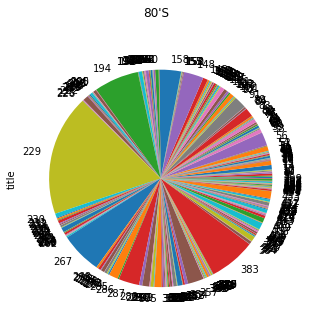

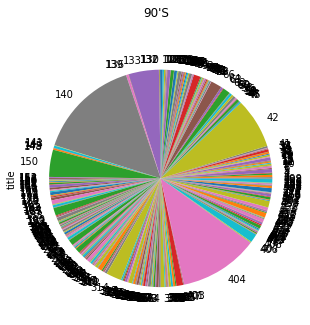

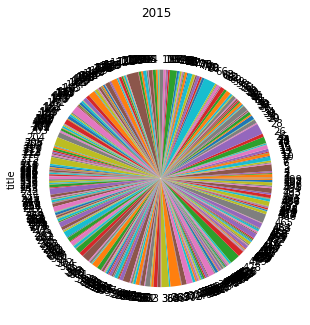

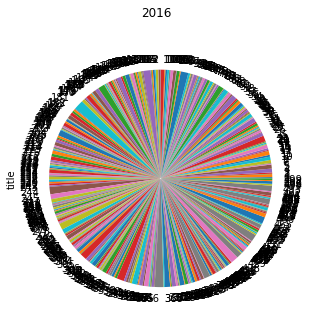

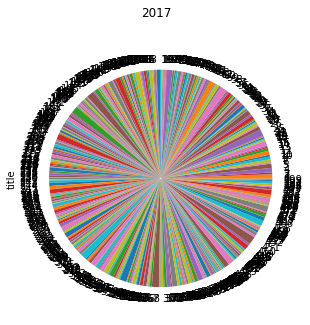

In [318]:
for i in ['80\'s', '90\'s', '2015', '2016', '2017']:
    sums = get_belonging(i)
    sums.plot(kind='pie', subplots=True, figsize=(5, 5), title=i.upper(), legend = False)

In [12]:
import re
import emot

punctuation_regex = r"[()]?[.,!?;~:]+"
specials = [r':-?[\)\(]+']

def process_word(word = ''):
    word = word.lower()
    
    others = []
    for o in specials:
        m = re.search(o, word)
        if m is not None:
            others.append(m.group(0))
            word = word.replace(m.group(0), '')
    
    emoji = emot.emoji(word)
    #  detect skin code
#     to_delete = []
#     for i, emo in enumerate(emoji):
#         if u"\U0001F3FB" <= emo['value'] <= u"\U0001F3FF":
#             emoji[i-1]['value'] += emo['value']
#             to_delete.append(i)
#     for i in reversed(to_delete):
#         del emoji[i] 

    
    if not re.search('[a-zA-Z]', word):
        #  just manage emoji        
        emos = list(map(lambda emo: emo['value'], emoji))
        for emo in emos:
            word = word.replace(emo, '')
        return ' '.join(emos) + ' ' + word

    emoticons = emot.emoticons(word)
    
    # skip all-words emoticons, normally wrong
    emoticons = list(filter(lambda emo: re.search('[^a-z]', emo['value']), emoticons))
    
    # merge single-char emoticons, normally wrong
    previous = -2
    to_delete = []
    for i, emo in enumerate(emoticons):
        if len(emo['value']) < 2 and emo['location'][0] == previous - 1:
            emoticons[i-1]['value'] += emo['value']
            to_delete.append(i)
        previous = emo['location'][1]
    for i in reversed(to_delete):
        del emoticons[i] 
    # remove remaining single-char emoticons
    emoticons = list(filter(lambda emo: len(emo['value']) >= 2, emoticons))
    
    emos = list(map(lambda emo: emo['value'], emoji + emoticons))
    for emo in emos:
        word = word.replace(emo, '')

# punctuation
#     punctuation = re.findall(punctuation_regex, word)
#     for p in punctuation:
#         word = word.replace(p, ' ')

#     # parentesis
#     word = re.sub(r'[\(\)]', '', word)
    
    # multiple spaces
    word = word.replace('  ', ' ').strip()

    # separated letters (i.e. 'w o r k o u t' or 'r & b')
    if re.match( r'^([\w&] )+[\w&]$', word):
        word = word.replace(' ', '')
    
    # hashtag
    word = re.sub(r'^#', '', word)
                          
#     if(len(punctuation)>=1):
#         print(punctuation)
    return ' '.join(emos + others) + ' ' + word

In [14]:
documents = [[process_word(word).strip()
             for word in clusterized.loc[clusterized['cluster']==i]['title'].tolist()]
             for i in tqdm(np.arange(num_clusters))]

In [378]:
# process_word('w o r k o u t')
process_word('workout 💪🏼')
# documents[1][0:1000]

'💪 🏼 workout'

In [390]:
 clusterized.loc[clusterized['title'].str.lower().str.contains('thursday')]

,title,cluster
633169,thursday,499
310989,thursday,495
32636,Throwback Thursday,494
937704,thursday,494
759552,Thursday,494
614182,#ThrowbackThursday,493
330089,thursday,492
295195,Thursdays,491
863055,Thursday,486
810832,Throwback Thursday,485


In [379]:
doc_file =_root + 'models/documents.txt'

In [380]:
np.savetxt(doc_file, [' '.join(d) for d in documents], fmt='%s')

In [15]:
from pyfasttext import FastText
ft_file = _root + 'models/model_ft.bin'

In [16]:
model = FastText(ft_file)

In [394]:
for i in ['country', 'work', 'workout', 'disney', 'dance', 'party', 'summer', 'throwback', 'thursday', '!', 'soccer', 'jesus']:
    display(Markdown('## %s' % i))
    for n in model.nearest_neighbors(i, k=5):
        print('%s (%f)' % (n[0], n[1]))

## country

countryy (0.759161)
yeehaw (0.726035)
countryyyy (0.713517)
countryyy (0.682718)
countryyyyy (0.670633)


## work

out (0.854691)
workout (0.848085)
gym (0.830540)
vibes (0.824301)
driving (0.805484)


## workout

gym (0.889234)
work (0.848085)
pregame (0.842407)
car (0.834560)
rap (0.831825)


## disney

disney!!!! (0.874077)
disney! (0.865172)
disney!!! (0.850705)
disney!!!!! (0.841337)
disney!! (0.806561)


## dance

wedding (0.826164)
songs (0.775800)
happy (0.756155)
jams (0.754434)
party (0.749168)


## party

car (0.849528)
pregame (0.830553)
workout (0.820472)
jams (0.800566)
running (0.798121)


## summer

vibes (0.886554)
feels (0.863146)
chill (0.855511)
2017 (0.841491)
good (0.836966)


## throwback

throwbacks (0.974560)
tbt (0.951334)
tb (0.918147)
throw (0.841460)
2000s (0.822092)


## thursday

throwback (0.642707)
tbt (0.626189)
throwbacks (0.601487)
tb (0.587562)
nostalgia (0.544841)


## !

music (0.446197)
s (0.443380)
t (0.423170)
ole (0.422107)
jams (0.413764)


## soccer

car (0.570406)
pump (0.569166)
pregame (0.565803)
party (0.562591)
workout (0.556886)


## jesus

worship (0.950322)
christian (0.913640)
praise (0.887544)
church (0.781708)
prayer (0.720138)


In [395]:
for i in ['💪', '🔥', '💕', '🎄', '<3', 'xD', '💃', '☔', '🎉', '💆', '⚽']:
    display(Markdown('## %s' % i))
    for n in model.nearest_neighbors(i, k=5):
        print('%s (%f)' % (n[0], n[1]))

## 💪

🏼 (0.665238)
🏻 (0.595311)
🏽 (0.550013)
🤘 (0.532170)
pregame (0.526812)


## 🔥

hype (0.913066)
lit (0.909861)
rap (0.879274)
litty (0.864506)
fire (0.827170)


## 💕

shadowhunters (0.419962)
covers! (0.403619)
studying... (0.394944)
recess (0.394695)
ultimate. (0.393544)


## 🎄

christmas (0.845391)
xmas (0.795169)
christmas! (0.753582)
holiday (0.704495)
🎁 (0.695813)


## <3

tunes (0.760191)
:) (0.759438)
my (0.743098)
songs (0.739933)
favorites (0.729136)


## xD

foxtrot (0.353638)
tennis (0.341577)
70-80 (0.300242)
thesis (0.271832)
37 (0.263100)


## 💃

🏻 (0.760220)
🏽 (0.738461)
🏼 (0.615985)
stelar (0.540335)
parov (0.526746)


## ☔

️ (0.477662)
☺ (0.445193)
kdot (0.417417)
cookout (0.416340)
newness (0.400967)


## 🎉

🎊 (0.566671)
party (0.442399)
partaaaay (0.430338)
bus (0.428716)
pool (0.415225)


## 💆

angels (0.476230)
lucid (0.423391)
rappin (0.419806)
holidays! (0.417159)
raw (0.416406)


## ⚽

punta (0.444384)
cana (0.439791)
coral (0.418108)
hihi (0.408720)
️ (0.407894)


In [396]:
for i in ['80\'s', '90\'s', '2015', '16', '2016', '2017']:
    display(Markdown('## %s' % i))
    for n in model.nearest_neighbors(i, k=10):
        print('%s (%f)' % (n[0], n[1]))

## 80's

80s (0.951989)
oldies (0.864146)
classics (0.827477)
but (0.782930)
goodies (0.780014)
classic (0.756470)
old (0.736099)
dad (0.724301)
70's (0.676502)
70s (0.649952)


## 90's

90s (0.965875)
alternative (0.805972)
nostalgia (0.788353)
alt (0.740457)
nineties (0.678347)
90s. (0.633855)
rock (0.628955)
middle (0.624151)
90 (0.608269)
1990's (0.605793)


## 2015

2016 (0.856770)
fall (0.849613)
2014 (0.837971)
2013 (0.837907)
winter (0.794006)
chill (0.788249)
september (0.784037)
spring (0.781168)
summer (0.777108)
2017 (0.774985)


## 16

17 (0.846913)
2017 (0.813592)
2016 (0.808505)
spring (0.796615)
'17 (0.790461)
summer (0.783733)
fall (0.776952)
vibes (0.771941)
2015 (0.761823)
november (0.757586)


## 2016

2017 (0.881634)
2013 (0.868874)
fall (0.859648)
2014 (0.858994)
2015 (0.856771)
winter (0.845530)
september (0.842558)
17 (0.822547)
new (0.821062)
chill (0.820432)


## 2017

2016 (0.881633)
new (0.860759)
17 (0.854613)
summer (0.841491)
'17 (0.831717)
chill (0.823372)
fall (0.819171)
16 (0.813592)
2014 (0.807788)
vibes (0.805690)


In [397]:
for i in ['sad', 'sad/love', '~ ', 'vibes', 'running', 'mamma mia']:
    display(Markdown('## %s' % i))
    for n in model.nearest_neighbors(i, k=10):
        print('%s (%f)' % (n[0], n[1]))

## sad

feels (0.783033)
good (0.733775)
slow (0.724049)
chill (0.709934)
mood (0.699894)
fall (0.694975)
love (0.693710)
vibes (0.691326)
random (0.690979)
songs (0.684166)


## sad/love

excercise (0.481941)
alternativo (0.440052)
54 (0.426180)
👵 (0.423756)
abc (0.410572)
boyz (0.393927)
breezeblocks (0.392593)
brother (0.392283)
sappy (0.392238)
springbreak (0.391376)


## ~ 

lollipop (0.923851)
frenchy (0.371005)
beta (0.355102)
💓 (0.331211)
start (0.326032)
friday! (0.317118)
louise (0.315434)
getting (0.315157)
highlights (0.312999)
romantic (0.312586)


## vibes

summer (0.886554)
good (0.878261)
chill (0.871820)
random (0.857761)
feels (0.850848)
work (0.824300)
workout (0.814650)
mood (0.807565)
2017 (0.805690)
gym (0.800031)


## running

workout (0.821889)
shower (0.814481)
driving (0.805198)
party (0.798121)
random (0.796056)
vibes (0.791408)
good (0.788727)
gym (0.786678)
summer (0.783035)
work (0.775243)


## mamma mia

mamma (0.947574)
mia (0.844162)
mia! (0.749229)
cast (0.581992)
movie (0.516403)
mama (0.509320)
saxophone (0.481761)
duele (0.478357)
villera (0.470339)
soundtrack (0.468253)


In [400]:
def print_similarity(a, b):
    print('%s VS %s: %f' %(a,b,model.similarity(a,b)))

print_similarity('☔', 'rain')
print_similarity('☔', 'rainy')
print_similarity('☔', 'sun')
print_similarity('☔', 'sunny')
print_similarity('☔', 'happy')
print_similarity('☔', 'sad')

print_similarity('🎉', 'rain')
print_similarity('🎉', 'party')
print_similarity('🎉', 'fiesta')
print_similarity('🎉', 'sun')
print_similarity('🎉', 'happy')
print_similarity('🎉', 'sad')

print_similarity('💤', 'sleep')
print_similarity('💤', 'relax')
print_similarity('💤', 'party')

print_similarity('💪', 'gym')
print_similarity('💪', 'relax')
print_similarity('💪', '💪🏼')
print_similarity('💤', '💪🏼')

☔ VS rain: 0.200109
☔ VS rainy: 0.102098
☔ VS sun: 0.005810
☔ VS sunny: 0.221870
☔ VS happy: 0.197748
☔ VS sad: 0.149346
🎉 VS rain: 0.120421
🎉 VS party: 0.442399
🎉 VS fiesta: 0.175452
🎉 VS sun: 0.090512
🎉 VS happy: 0.166065
🎉 VS sad: 0.233239
💤 VS sleep: 0.372603
💤 VS relax: 0.226241
💤 VS party: 0.154964
💪 VS gym: 0.472737
💪 VS relax: 0.269714
💪 VS 💪🏼: 0.110131
💤 VS 💪🏼: 0.192556


In [399]:
for day in 'monday tuesday wednesday thursday friday saturday sunday morning afternoon night'.split(' '):
    print(day)
    print(model.similarity(day, 'party'))
    print(model.similarity(day, 'relax'))


monday
0.1804380962521614
0.3089013248445258
tuesday
0.14959717579519077
0.32334981493890685
wednesday
0.15863295182111573
0.269322514862945
thursday
0.400406317598619
0.21211235708065693
friday
0.456662776255494
0.4896398661229786
saturday
0.25823256195766936
0.34357931791048535
sunday
0.1964782495253987
0.6093966012953447
morning
0.45960963912606284
0.6906341408162646
afternoon
0.14392521082725482
0.4100519462647953
night
0.39638468064726134
0.3795926798654921


In [17]:
def get_vec(title):
    return model.get_numpy_sentence_vector(process_word(title).strip())

df_playlist['title_vec'] = df_playlist['title'].apply(get_vec)

In [18]:
playlist_title_vecs = os.path.join(_root, 'models', 'pl_vec_ft.vec')

In [19]:
vecs = df_playlist['title_vec'].tolist()

with open(playlist_title_vecs, 'w') as file_handler:
    file_handler.write('%d %d\n' %(len(vecs), len(vecs[0])))
    for idx, vec in enumerate(tqdm(vecs)):
        file_handler.write('%d %s\n' % (idx, ' '.join(vec.astype(np.str))))

HBox(children=(IntProgress(value=0, max=1000000), HTML(value='')))

In [20]:
from gensim.models import KeyedVectors

model_pl = KeyedVectors.load_word2vec_format(playlist_title_vecs, binary=False)

In [246]:
def predict(title, k=10):
    return model_pl.most_similar_cosmul(positive=[get_vec(title)], topn=k)

es = predict('bob marley', k=200)[-1]
print(es)

clusterized.loc[[int(es[0])]]

('427753', 0.9661627411842346)


,title,cluster
427753,bob,473


In [178]:
pos = [int(p) for (p, s) in predict('2017', k=100)]
clusterized.loc[pos]

,title,cluster
591339,2017,216
183617,2017,330
592068,2017,382
43180,2017,21
863469,2017,499
659503,2017,245
354607,2017,139
486369,2017,232
118610,2017,141
118721,2017,305


In [148]:
df_playlist.loc[df_playlist['title'].str.lower().str.contains('italian')]

,title,collaborative,num_tracks,num_artists,num_albums,num_followers,num_edits,modified_at,duration_ms,title_vec,cluster
10295,Italian,False,28,15,20,1,4,1403136000,6450192,"[-0.12876216, 0.048824277, -0.0054178266, 0.12...",217
27099,Rap Italiano,False,158,34,65,2,67,1508889600,34230082,"[-0.05719058, 0.08441962, -0.000303071, 0.0308...",58
27177,italian,False,11,7,11,1,7,1500422400,2226713,"[-0.12876216, 0.048824277, -0.0054178266, 0.12...",197
39995,italiane,False,71,38,64,1,2,1427846400,18521358,"[-0.10339752, 0.05525133, 0.0139491055, -0.051...",63
40891,Italiano,False,6,3,5,1,4,1411776000,1256067,"[0.031318672, 0.11505955, 0.033908118, -0.0445...",235
46164,Musica Italiana,False,45,34,40,1,20,1508803200,9842260,"[-0.085128285, 0.030137772, -3.3304095e-05, -0...",58
52479,italiano,False,27,16,25,1,10,1498953600,4838439,"[0.031318672, 0.11505955, 0.033908118, -0.0445...",235
53336,italian,False,55,10,31,2,8,1509321600,10007306,"[-0.12876216, 0.048824277, -0.0054178266, 0.12...",235
62599,Italian Music,False,27,12,18,1,3,1375401600,5802515,"[-0.12679002, 0.024074906, 0.005982421, 0.0526...",9
65537,Italians,False,126,70,109,3,6,1401753600,31133885,"[0.011982203, 0.15949763, -0.011016208, 0.0501...",58


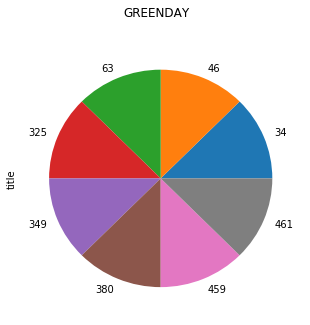

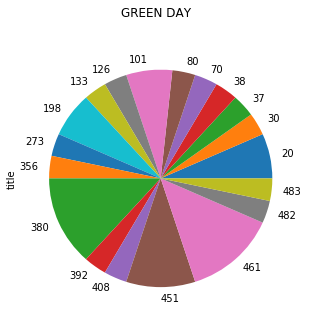

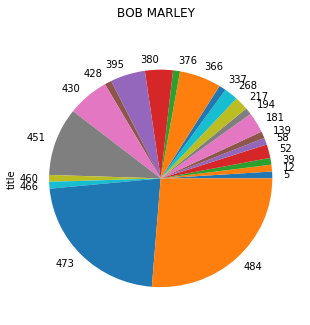

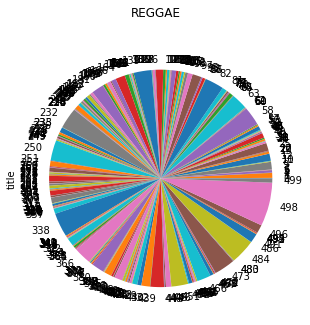

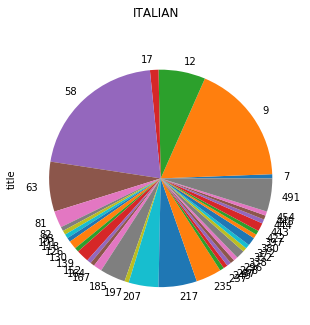

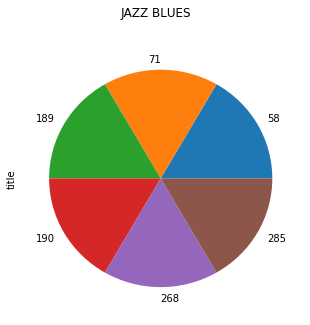

In [146]:
for i in ['greenday', 'green day', 'bob marley', 'reggae', 'italian', 'jazz blues']:
    sums = get_belonging(i)
    sums.plot(kind='pie', subplots=True, figsize=(5, 5), title=i.upper(), legend = False)
    

In [138]:
def intersect(a, b):
    return list(set(a) & set(b))

print(intersect(get_belonging('greenday').index.values, get_belonging('green day').index.values))

[380, 461]


In [247]:
most_similar_pl = predict('bob marley', k=300)
predictions_and_seeds = [df_tracks[df_tracks['pid']==int(pl[0])]['track_uri'].values.astype(np.str).tolist()
                         for pl in most_similar_pl]

In [248]:
pred = [item for sublist in predictions_and_seeds for item in sublist]

In [249]:
a = sorted(set(pred), key = pred.count, reverse=True)
a

['spotify:track:6M5cQCyieE1Q8YQydVLzxL',
 'spotify:track:61dXuN3VyqGOyOeMfJXIPh',
 'spotify:track:4efoEY8iDBzUqitjmNDhpN',
 'spotify:track:4OsZ1vrenrtSbqLJxOceKl',
 'spotify:track:1QQfbfMfyzNZhT5fg3RpuS',
 'spotify:track:21dOjdraFZffs2lnQObaiZ',
 'spotify:track:6gOirCUz62z0mFhCJ6P5KC',
 'spotify:track:2mKsPUojh602HvSeNt04CB',
 'spotify:track:2Mw8xQJpIDAgrktDXEqxCs',
 'spotify:track:1EPVhySScieqRoYWj8pIEN',
 'spotify:track:2jvoqPDIsm5rHRLgxstX15',
 'spotify:track:7CF8JrFFjWR8BN5ShfF4GQ',
 'spotify:track:1fQxtJ2yrBn6l20VVuGuJF',
 'spotify:track:0yHBJzqxd9nya8U6Nd5iAa',
 'spotify:track:4MGa3uO14yw16f8IPKnLZ6',
 'spotify:track:2CwwU1J70ToUfF9bINFDd8',
 'spotify:track:3YPTb9lRG4mHKb2yWL3eu4',
 'spotify:track:16fxjdi1YgeNmPU59iP2CI',
 'spotify:track:7sgMos5N61N0qmA6l53lKo',
 'spotify:track:0Ycp2z25eR79I1QCkUyZWd',
 'spotify:track:3eGmJrVhKVOkIRK7kG8xik',
 'spotify:track:6x0SCnJPEqbgX085BuJHGU',
 'spotify:track:54hFwvNODjQoel54KevHph',
 'spotify:track:0lzOFW7ELjXom0Jua03stq',
 'spotify:track:

In [252]:
for i in a[0:10]:
    print(pred.count(i))

174
163
152
140
137
131
128
112
111
101
